In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm

In [26]:
train_data=pd.read_csv('/content/drive/MyDrive/ACV/ACV - Project/Project 3-Retail-Datasets-train_data/train_data.csv')
test_data=pd.read_csv('/content/drive/MyDrive/ACV/ACV - Project/Project 3-Retail-Datasets-train_data/test_data.csv')

<ipython-input-26-df0e4e520ad4>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv('/content/drive/MyDrive/ACV/ACV - Project/Project 3-Retail-Datasets-train_data/train_data.csv')


In [27]:
train_data.columns
test_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [28]:
print (train_data.shape)

(982644, 9)


In [29]:
print (test_data.shape)
test_data.dtypes

(34565, 8)


Store             int64
DayOfWeek         int64
Date             object
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object

In [30]:
train_data.iloc[:,7] = train_data.iloc[:,7].astype(str)
train_data.iloc[:,7]

0         0
1         0
2         0
3         0
4         0
         ..
982639    a
982640    a
982641    a
982642    a
982643    a
Name: StateHoliday, Length: 982644, dtype: object

In [31]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [32]:
test_data.describe()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,34565.000000,34565.000000,34565.000000,34565.000000,34565.000000,34565.0,34565.000000
mean,558.000000,4.000000,643.827224,0.873369,0.419355,0.0,0.369651
std,321.877302,1.917688,435.207851,0.332564,0.493461,0.0,0.482717
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,279.000000,2.000000,445.000000,1.000000,0.000000,0.0,0.000000
50%,558.000000,4.000000,610.000000,1.000000,0.000000,0.0,0.000000
75%,837.000000,6.000000,812.000000,1.000000,1.000000,0.0,1.000000
max,1115.000000,7.000000,4783.000000,1.000000,1.000000,0.0,1.000000


In [33]:
train_data_cat=train_data.select_dtypes(exclude=['int64', 'float64'])
train_data_cat
# y=train_data['Sales']
# y.tail()

,Date,StateHoliday
0,2015-06-30,0
1,2015-06-30,0
2,2015-06-30,0
3,2015-06-30,0
4,2015-06-30,0
...,...,...
982639,2013-01-01,a
982640,2013-01-01,a
982641,2013-01-01,a
982642,2013-01-01,a


In [34]:
train_data_cat=train_data_cat.drop(columns=['Date'])

In [35]:
#One Hot encoding

ohe=OneHotEncoder(sparse=False,dtype=int)
ohe_data=ohe.fit_transform(train_data_cat)
ohe_data_df=pd.DataFrame(ohe_data)
ohe_data_df.columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RangeIndex(start=0, stop=4, step=1)

In [36]:
ohe_data_df.rename(columns={" 0 ":"State_Holiday"},inplace=True)
ohe_data_df

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
982639,0,1,0,0
982640,0,1,0,0
982641,0,1,0,0
982642,0,1,0,0


In [37]:
# #Label encoding
# enc=LabelEncoder()
# enc_data=enc.fit_transform(train_data_cat.iloc[:,1])
# enc_data_df=pd.DataFrame(enc_data)
# enc_data_df

In [38]:
#drop the sales column and Stateholidays column
train_data_1=train_data.drop(columns='StateHoliday')

In [39]:
train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [40]:
train_data_upd=pd.concat([train_data_1,ohe_data_df],axis=1)
train_data_upd.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,0,1,2,3
0,1,2,2015-06-30,5735,568,1,1,0,1,0,0,0
1,2,2,2015-06-30,9863,877,1,1,0,1,0,0,0
2,3,2,2015-06-30,13261,1072,1,1,1,1,0,0,0
3,4,2,2015-06-30,13106,1488,1,1,0,1,0,0,0
4,5,2,2015-06-30,6635,645,1,1,0,1,0,0,0


In [41]:
train_data_upd.columns = ['Store','DaysOfWeek','Date','Sales','Customers','Open','Promo','SchoolHoliday','No_state_holidays','a','b','c']
train_data_upd.tail()

,Store,DaysOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,No_state_holidays,a,b,c
982639,1111,2,2013-01-01,0,0,0,0,1,0,1,0,0
982640,1112,2,2013-01-01,0,0,0,0,1,0,1,0,0
982641,1113,2,2013-01-01,0,0,0,0,1,0,1,0,0
982642,1114,2,2013-01-01,0,0,0,0,1,0,1,0,0
982643,1115,2,2013-01-01,0,0,0,0,1,0,1,0,0


<ipython-input-42-d93e051656d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr=train_data_upd.corr()


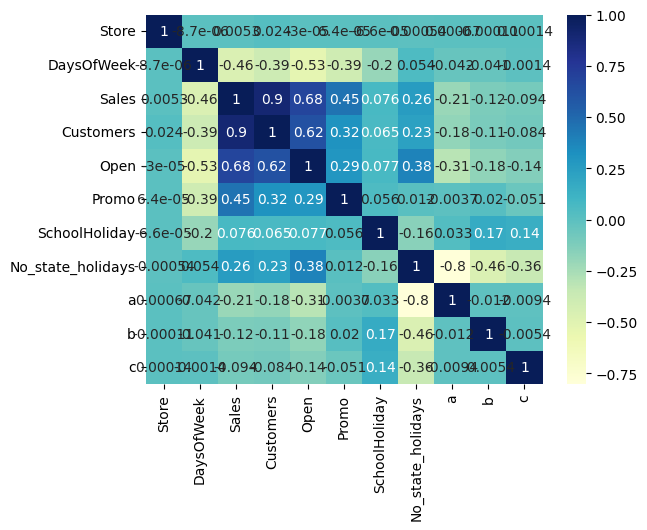

In [42]:
#EDA using heatmap by correlation values
data_corr=train_data_upd.corr()
sns.heatmap(data_corr,cmap='YlGnBu',annot=True)
plt.show()

In [43]:
features = train_data_upd.columns

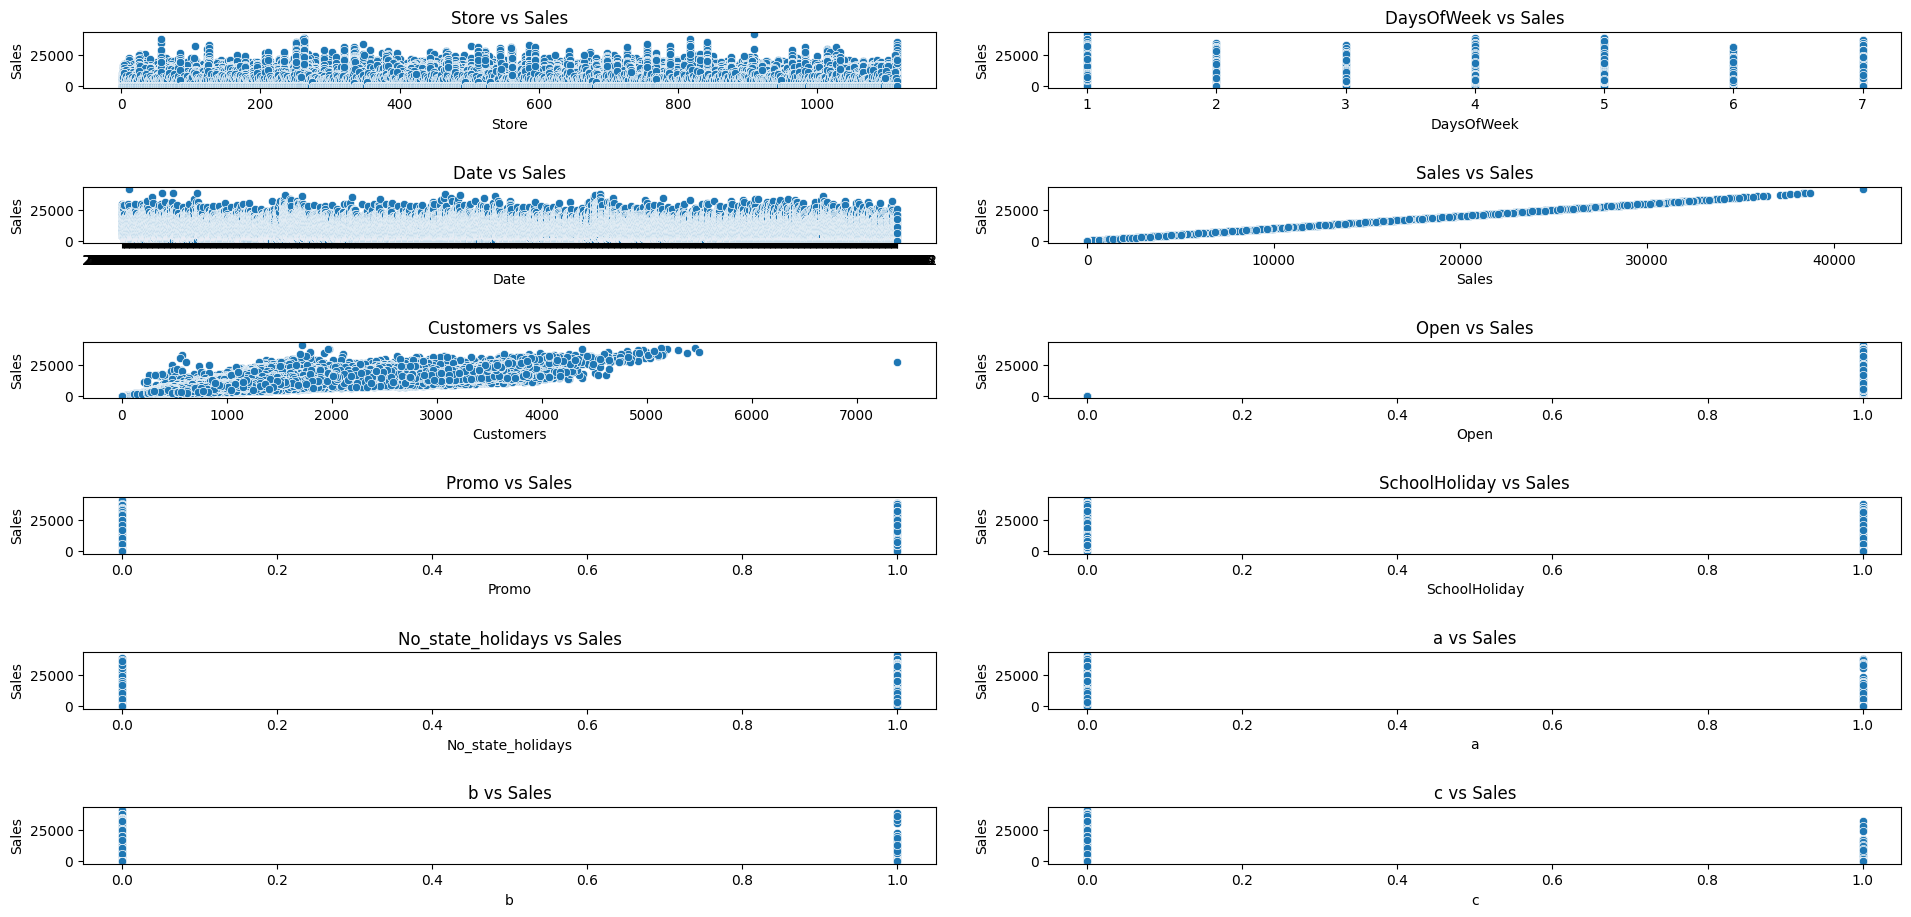

In [44]:
fig, axes = plt.subplots(nrows=len(features)//2, ncols=2, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adjust the padding between subplots

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Plotting each feature against 'Sales'
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='Sales', data=train_data_upd, ax=axes[i])
    axes[i].set_title(f'{feature} vs Sales')

# Show the plots
plt.show()

In [45]:
train_data['Date'].dtype
train_data['Date']=pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
test_data['Date']=pd.to_datetime(test_data['Date'],format='%d-%m-%Y')

In [46]:
test_data.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
dtype: object

In [47]:
y=train_data['Sales']
y.tail()

982639    0
982640    0
982641    0
982642    0
982643    0
Name: Sales, dtype: int64

In [48]:
y.isna().any()

False

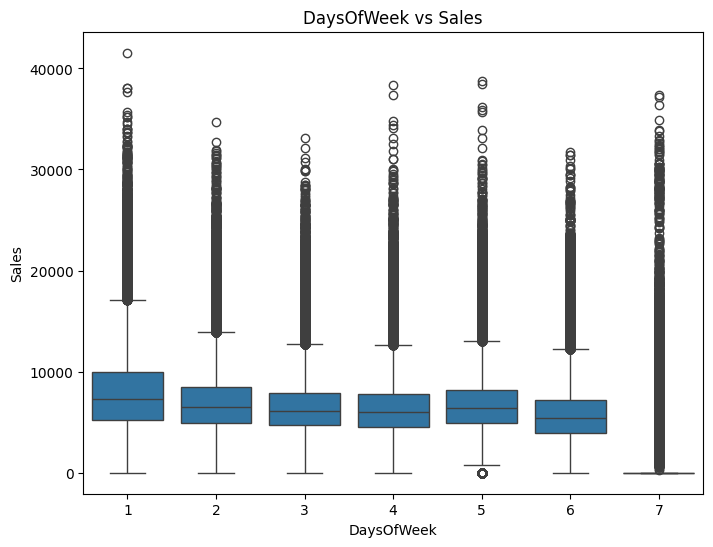

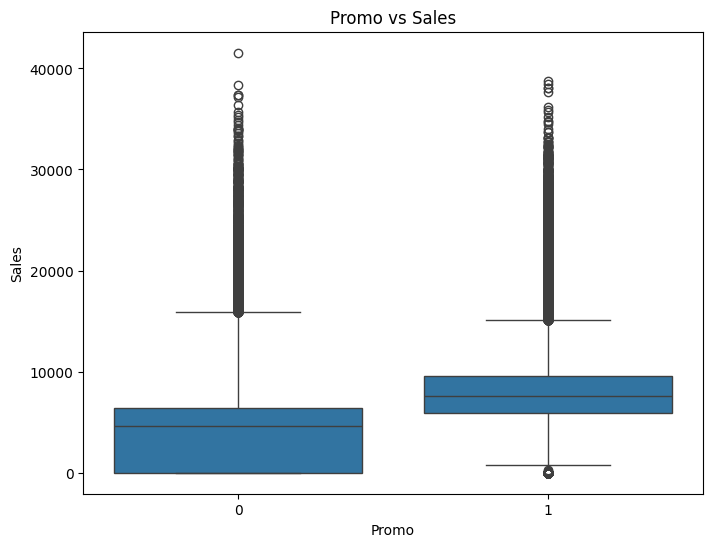

In [49]:
for categorical_feature in ['DaysOfWeek', 'Promo']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=categorical_feature, y='Sales', data=train_data_upd)
    plt.title(f'{categorical_feature} vs Sales')
    plt.show()

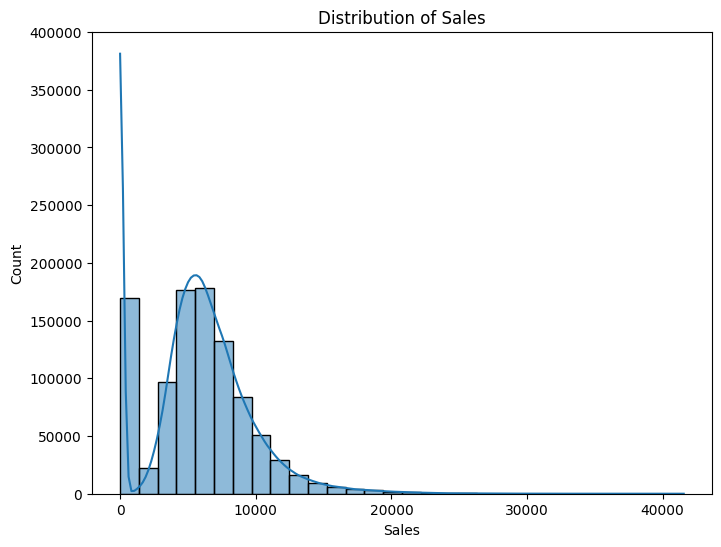

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data_upd['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.show()

In [51]:
# Sales for all the stores vs date
sales_by_date=train_data.groupby('Date')['Sales'].sum().reset_index()
sales_by_date.columns

Index(['Date', 'Sales'], dtype='object')

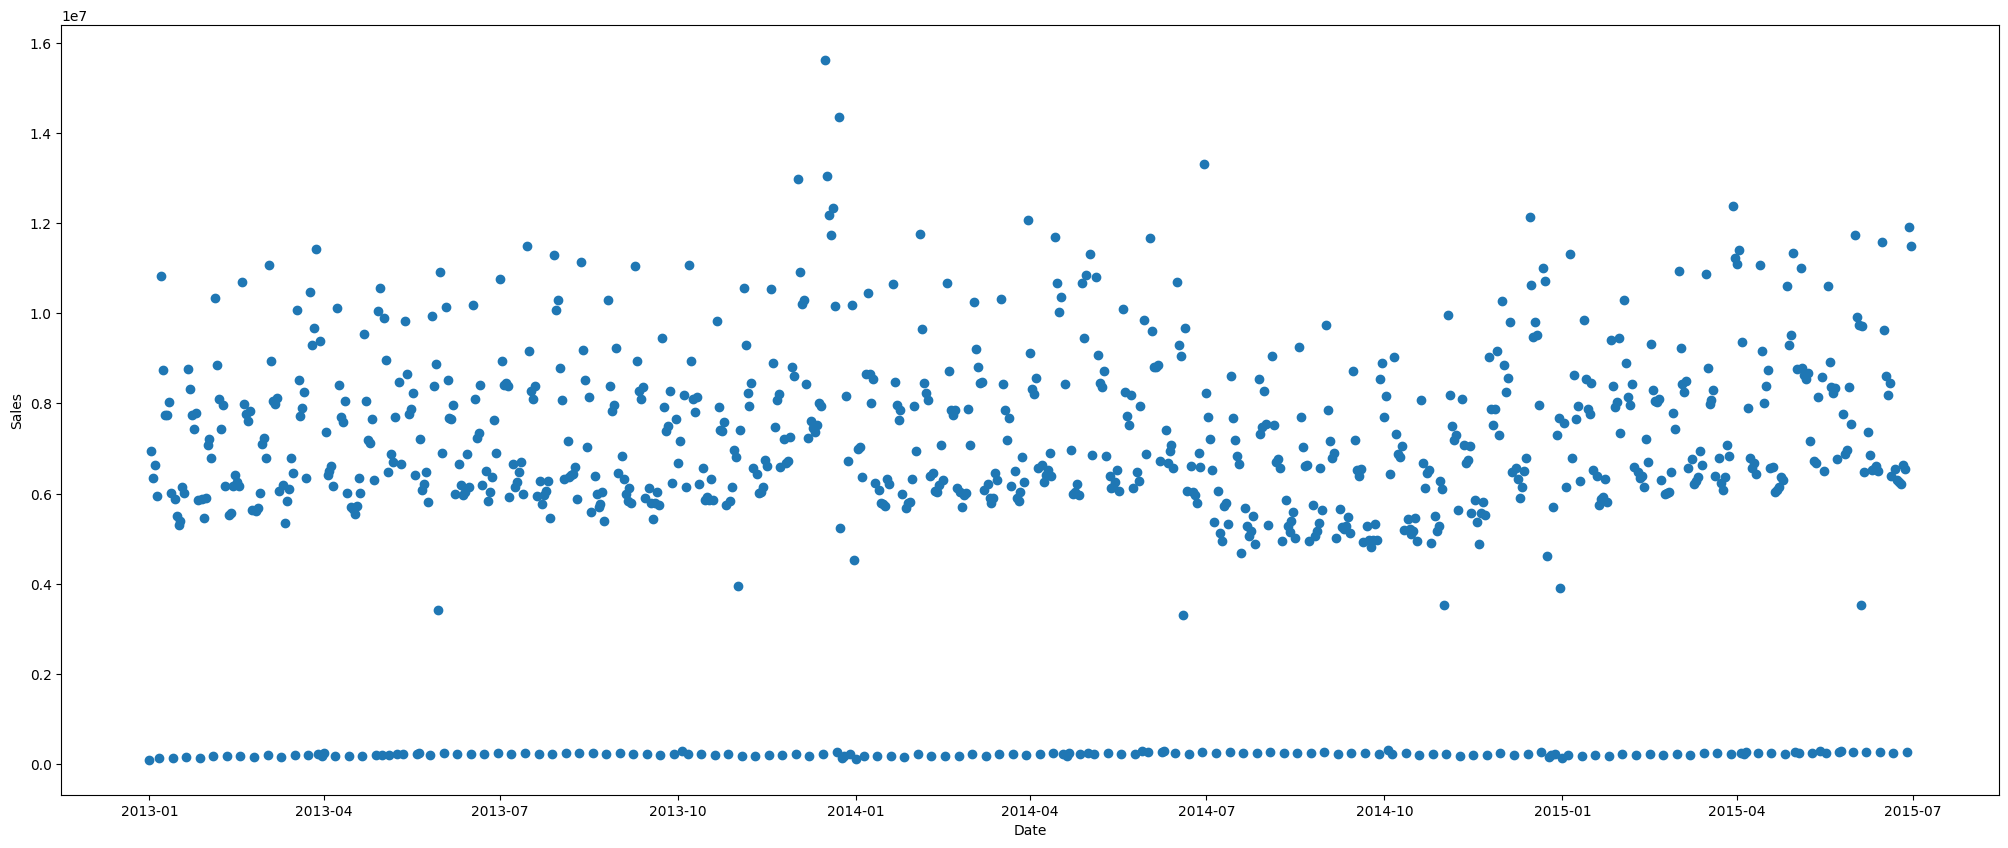

In [52]:
plt.figure(figsize=(25,10))
plt.scatter(sales_by_date['Date'],sales_by_date['Sales'],label='Total Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [53]:
#Average sales for all stores vs date

avg_sales_by_date=train_data.groupby('Date')['Sales'].mean().reset_index()
avg_sales_by_date.columns

Index(['Date', 'Sales'], dtype='object')

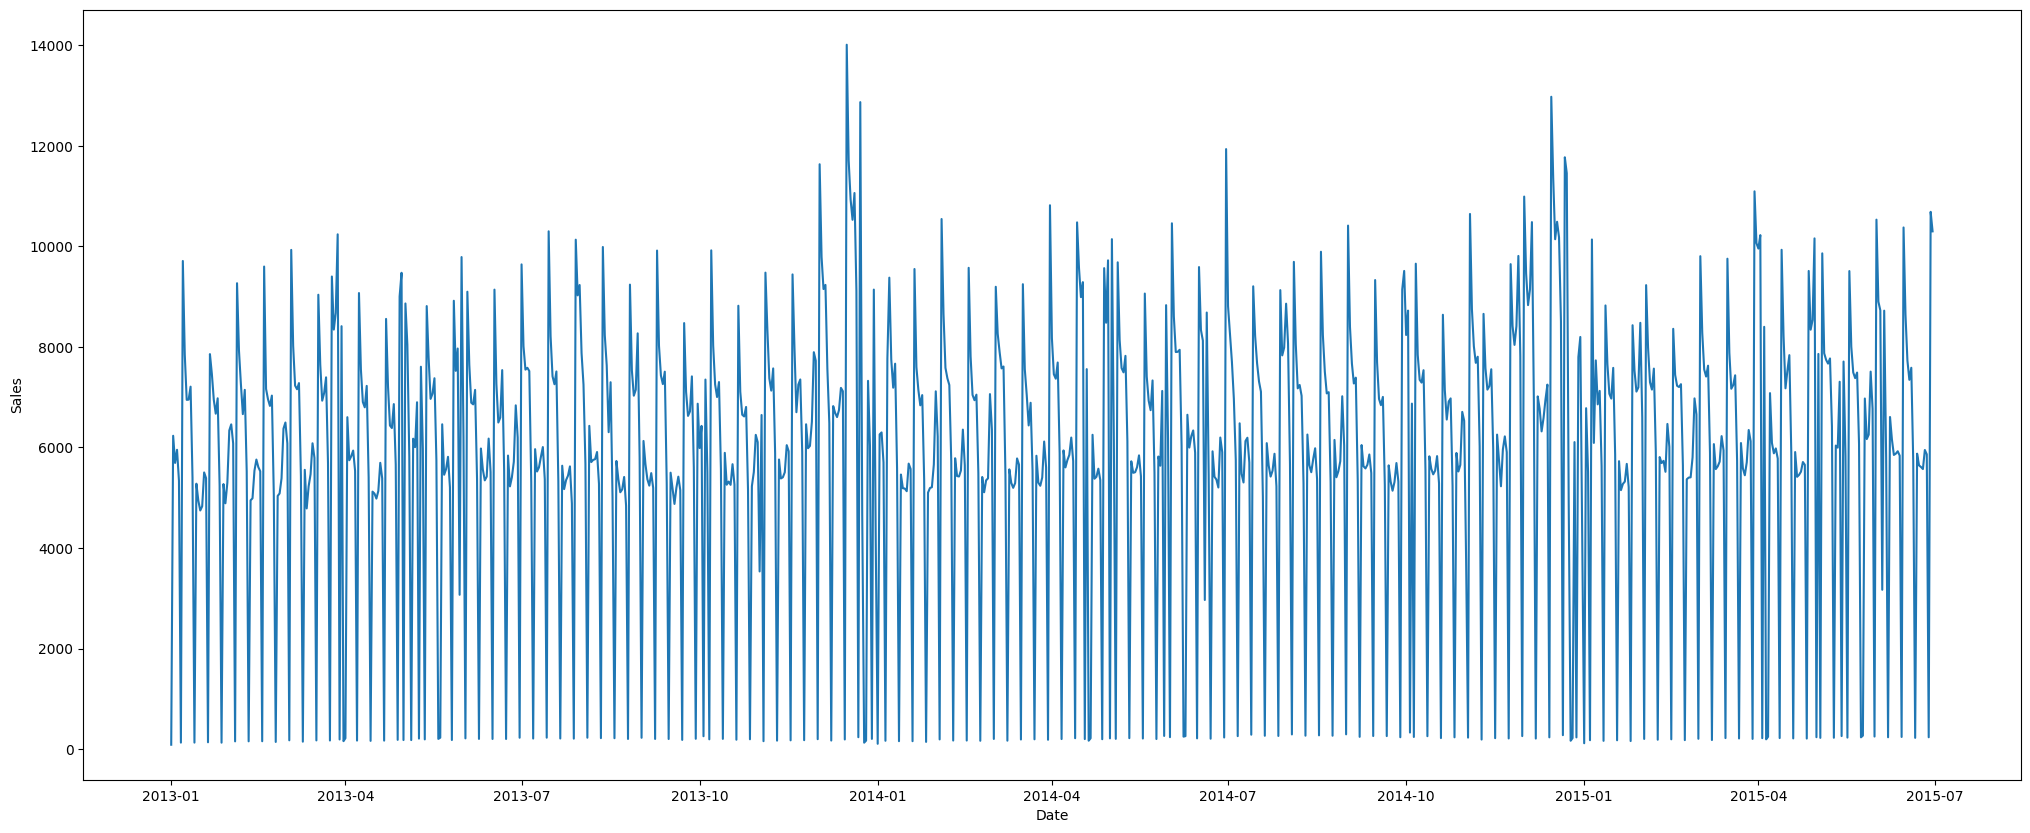

In [54]:
plt.figure(figsize=(25,10))
plt.plot(avg_sales_by_date['Date'],avg_sales_by_date['Sales'],label='Total Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [55]:
# sales by date vs store
sales_by_store=train_data.groupby('Store')['Sales'].sum().reset_index()
sales_by_store.columns

Index(['Store', 'Sales'], dtype='object')

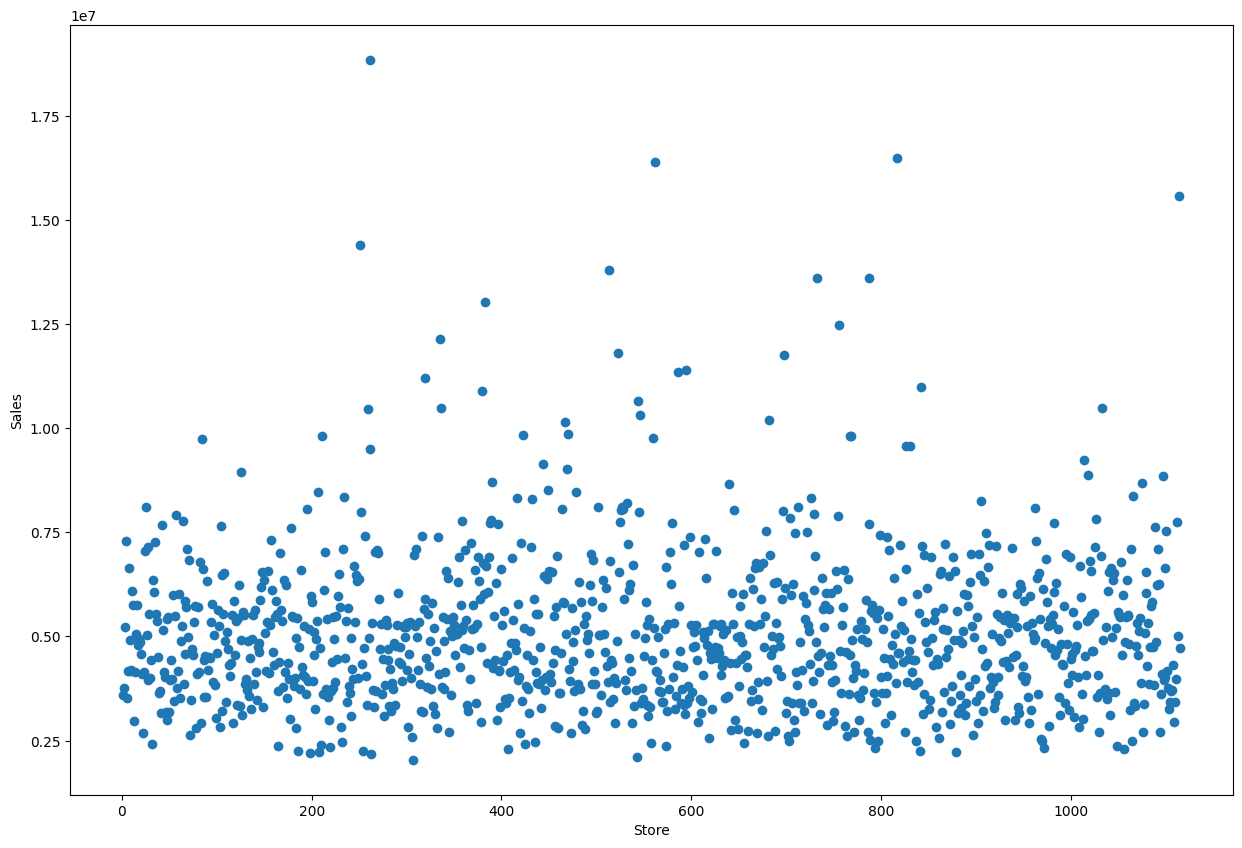

In [56]:
plt.figure(figsize=(15,10))
plt.scatter(sales_by_store['Store'],sales_by_store['Sales'],label='Total Sales')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

In [57]:
train_data_upd['Date']=pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data_upd['year']=train_data_upd['Date'].dt.year
train_data_upd['month']=train_data_upd['Date'].dt.month
train_data_upd['datee']=train_data_upd['Date'].dt.day

In [58]:
test_data['Date']=pd.to_datetime(test_data['Date'],format='%d-%m-%Y')
test_data['year']=test_data['Date'].dt.year
test_data['month']=test_data['Date'].dt.month
test_data['datee']=test_data['Date'].dt.day


In [59]:
train_data_upd=train_data_upd.drop(columns=['Date','Sales'])
test_data=test_data.drop(columns=['Date'])

In [60]:

columns_to_zero = ['0', '1', '2']
test_data[columns_to_zero] = 0
test_data.shape, train_data_upd.shape

((34565, 13), (982644, 13))

In [61]:
test_data.columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'year', 'month', 'datee', 'a', 'b', 'c']
test_data.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,datee,a,b,c
0,1,5,555,1,1,0,1,2015,7,31,0,0,0
1,2,5,625,1,1,0,1,2015,7,31,0,0,0
2,3,5,821,1,1,0,1,2015,7,31,0,0,0
3,4,5,1498,1,1,0,1,2015,7,31,0,0,0
4,5,5,559,1,1,0,1,2015,7,31,0,0,0


In [62]:
#MinMaxScaling
def Scaling(x):
  #x.columns=x.columns.astype(str)
  scaler=MinMaxScaler()
  model=scaler.fit(x)
  x=model.transform(x)
  return x

In [63]:
#ZScaling
def StdScaling(x):
  #x.columns=x.columns.astype(str)
  scaler=StandardScaler()
  model=scaler.fit(x)
  x=model.transform(x)
  return x

In [64]:
#Linear regression for every storewise data
def lin_reg_call(X_train,X_test,y_train,y_test):
  lin_reg=LinearRegression()
  lin_reg.fit(X_train,y_train)
  train_score =lin_reg.score(X_train,y_train)
  test_score=lin_reg.score(X_test,y_test)
  #print(train_score,test_score)
  y_pred=lin_reg.predict(X_test)
  print(y_pred.shape)
  return [y_pred,train_score,test_score]

In [65]:
train_data_upd.isna().any().any()

False

In [66]:
#train_test_split
train_data_scaled = StdScaling(train_data_upd)
y=y.values.reshape(-1,1)
y = StdScaling(y)
#y = np.log(y)
X_train_full,X_test_full,y_train_full,y_test_full=train_test_split(train_data_scaled,y,test_size=0.2,random_state=30)

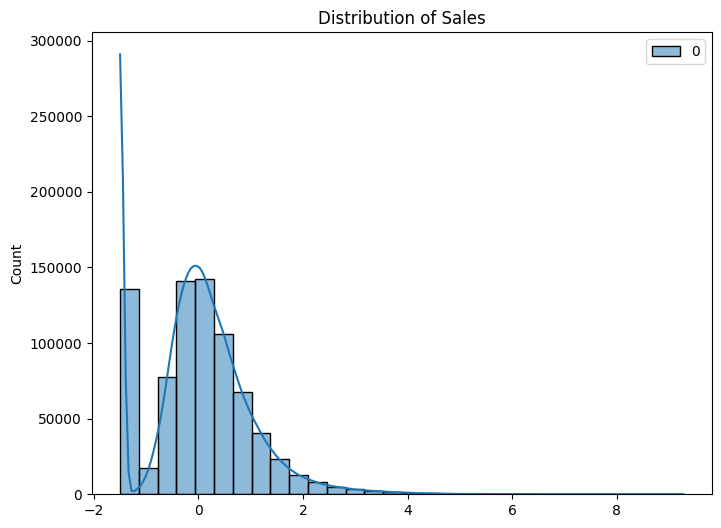

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(y_train_full, bins=30, kde=True)
plt.title('Distribution of Sales')
plt.show()

In [68]:
#Calculate MAE,MSE and RMSE
def metrics(y_test, y_pred):
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
    r_square = r2_score(y_true=y_test, y_pred=y_pred)
    print("MAE:{}".format(mae))
    print("MSE:{}".format(rmse))
    print("R_squared:{}".format(r_square))
    return [mae, rmse, r_square]

In [69]:
#Linear Regression for full data
import joblib
lin_reg=LinearRegression()
lin_reg.fit(X_train_full,y_train_full)

#Save model
joblib.dump(lin_reg, 'linear_regression_model.pkl')

#Use saved model
loaded_model = joblib.load('linear_regression_model.pkl')
y_pred_full=loaded_model.predict(X_test_full)

print(lin_reg.score(X_test_full,y_test_full))
print(lin_reg.score(X_train_full,y_train_full))


0.8565127924030109
0.8551438891336274


In [70]:
metrics(y_test_full,y_pred_full)

MAE:0.25379690641478025
MSE:0.3771363090217523
R_squared:0.8565127924030109


[0.25379690641478025, 0.3771363090217523, 0.8565127924030109]

In [71]:
y_target=train_data[['Store','Sales']]
y_target.shape

(982644, 2)

In [72]:
#Linear regression on test data :
test_data_scaled = Scaling(test_data)
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns)
y_pred_test_full = loaded_model.predict(test_data_scaled_df)
print("Test Data:")
print(test_data)
print("\nPredictions on Test Data:")
#y_pred_test_full=Scaling(y_pred_test_full)
print(y_pred_test_full)



Test Data:
       Store  DayOfWeek  Customers  Open  Promo  StateHoliday  SchoolHoliday  \
0          1          5        555     1      1             0              1   
1          2          5        625     1      1             0              1   
2          3          5        821     1      1             0              1   
3          4          5       1498     1      1             0              1   
4          5          5        559     1      1             0              1   
...      ...        ...        ...   ...    ...           ...            ...   
34560   1111          3        351     1      1             0              1   
34561   1112          3        716     1      1             0              1   
34562   1113          3        770     1      1             0              0   
34563   1114          3       3788     1      1             0              0   
34564   1115          3        447     1      1             0              0   

       year  month  datee  a

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [73]:
predictions_df = pd.DataFrame(y_pred_test_full, columns=['Predictions'])

# Save to CSV file
predictions_df.to_csv('predictions.csv', index=False)

In [74]:
#Separate models for each store
#extract data for each store
train_data_each =train_data_upd.loc[train_data_upd['Store']==1]
train_data_each.shape
y_each=y_target.loc[y_target['Store']==1]
y_each.shape


(911, 2)

In [75]:
#initialisation of lists
mae_list=[]
rmse_list=[]
r2_list=[]
train_score_list=[]
test_score_list=[]
ypred_list=[]
y_test_list=[]

In [76]:
#Separate models for each store
#extract data for each store
from statistics import mean
store_numbers = list(range(1, 1116))
for i in store_numbers:
  train_data_each =train_data_upd.loc[train_data_upd['Store']==i]
  print("train:",train_data_each.shape)
  y_each=y_target.loc[y_target['Store']==i]
  #y_each.reshape(-1,1)
  #Scaling of training data
  train_data_scaled=StdScaling(train_data_each)
  y_scaled=StdScaling(y_each)
  #train_test_split
  X_train_each,X_test_each,y_train_each,y_test_each = train_test_split(train_data_scaled,y_scaled[:,1],test_size=0.2,random_state=30)
  #Linear regression
  print("Model for Store : ", i)
  lin_reg=lin_reg_call(X_train_each,X_test_each,y_train_each,y_test_each)
  y_pred_each=lin_reg[0]
  #print(lin_reg[1])
  #print(lin_reg[2])
  print(len(y_pred_each))
  ypred_list.append(y_pred_each)
  y_test_list.append(y_test_each)
  #y_pred_each.shape
  metric=metrics(y_test_each,y_pred_each)
  mae_list.append(metric[0])
  rmse_list.append(metric[1])
  r2_list.append(metric[2])
  train_score_list.append(lin_reg[1])
  test_score_list.append(lin_reg[2])
print("predictions : ",len(ypred_list))
#print(len(y_test_list))
print(mean(mae_list),mean(rmse_list),mean(r2_list),mean(train_score_list),mean(test_score_list))
print("Mean MAE:", mean(mae_list))
print("Mean RMSE:", mean(rmse_list))
print("Mean R2:", mean(r2_list))


Streaming output truncated to the last 5000 lines.
183
MAE:0.08904665372521131
MSE:0.12102078495052532
R_squared:0.9850128507290159
train: (911, 13)
Model for Store :  403
(183,)
183
MAE:0.08166633197627135
MSE:0.10831850169351309
R_squared:0.9871751979459328
train: (911, 13)
Model for Store :  404
(183,)
183
MAE:0.13501096451910388
MSE:0.17713246451522457
R_squared:0.9647768522738897
train: (911, 13)
Model for Store :  405
(183,)
183
MAE:0.10389897841291472
MSE:0.1401632232669657
R_squared:0.9783648014862488
train: (911, 13)
Model for Store :  406
(183,)
183
MAE:0.08507194656744411
MSE:0.10913982068980309
R_squared:0.9870881427079455
train: (727, 13)
Model for Store :  407
(146,)
146
MAE:0.11185668797363052
MSE:0.15415469971286375
R_squared:0.976044461707991
train: (911, 13)
Model for Store :  408
(183,)
183
MAE:0.10236140158606437
MSE:0.13633102386342932
R_squared:0.9804629021024667
train: (911, 13)
Model for Store :  409
(183,)
183
MAE:0.12619161206783625
MSE:0.16777836281169306
R_s

In [77]:
len(test_score_list)

1115

Text(0, 0.5, 'Test score')

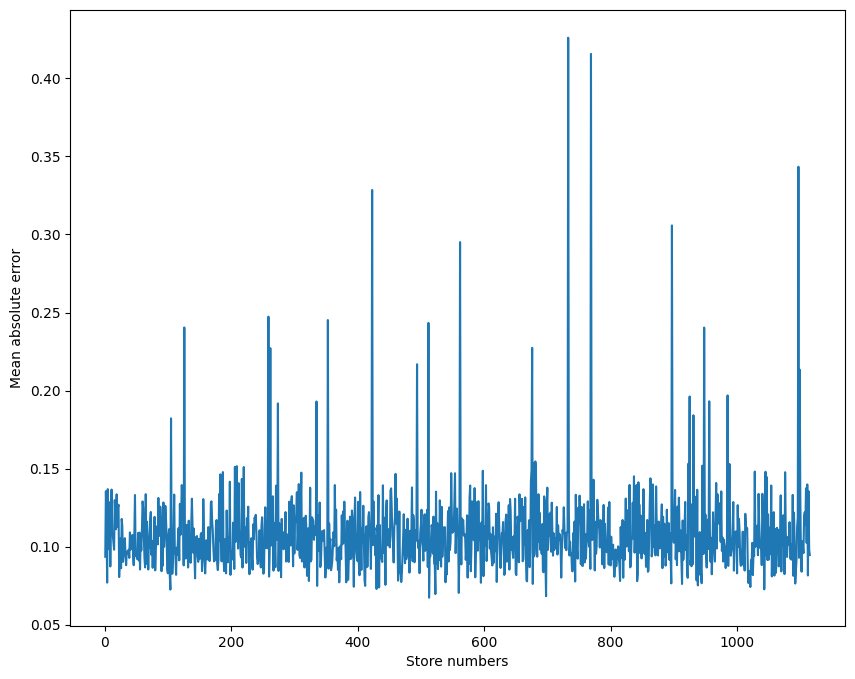

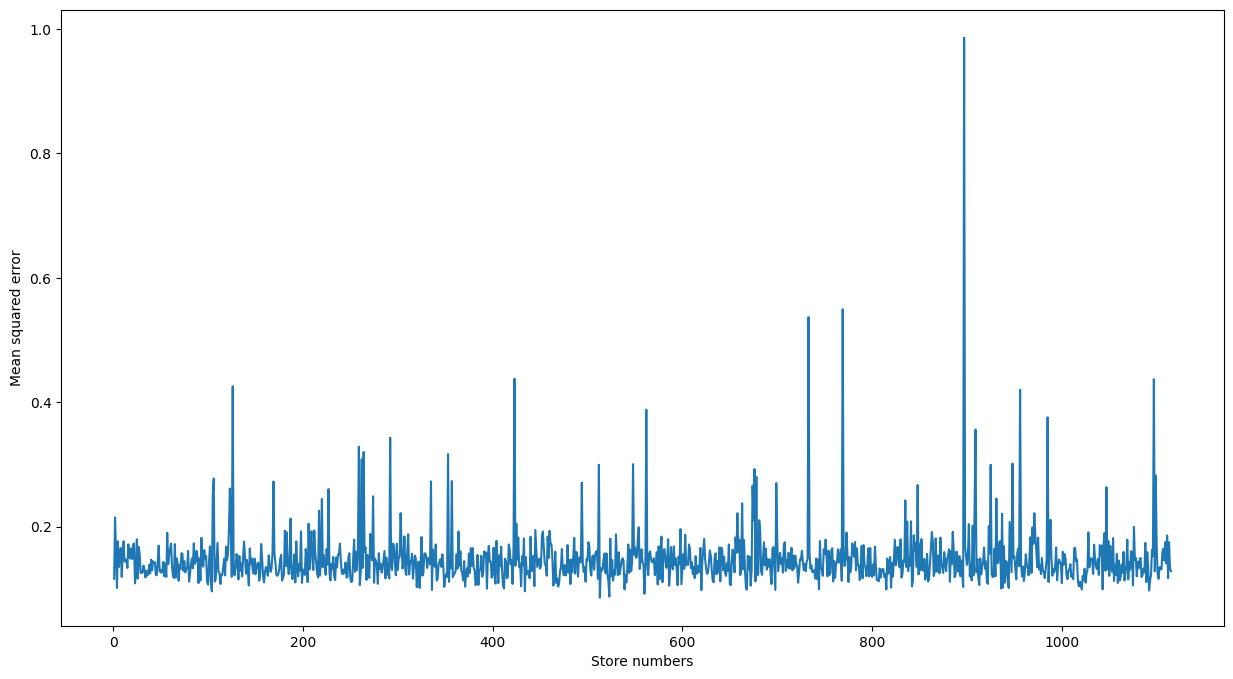

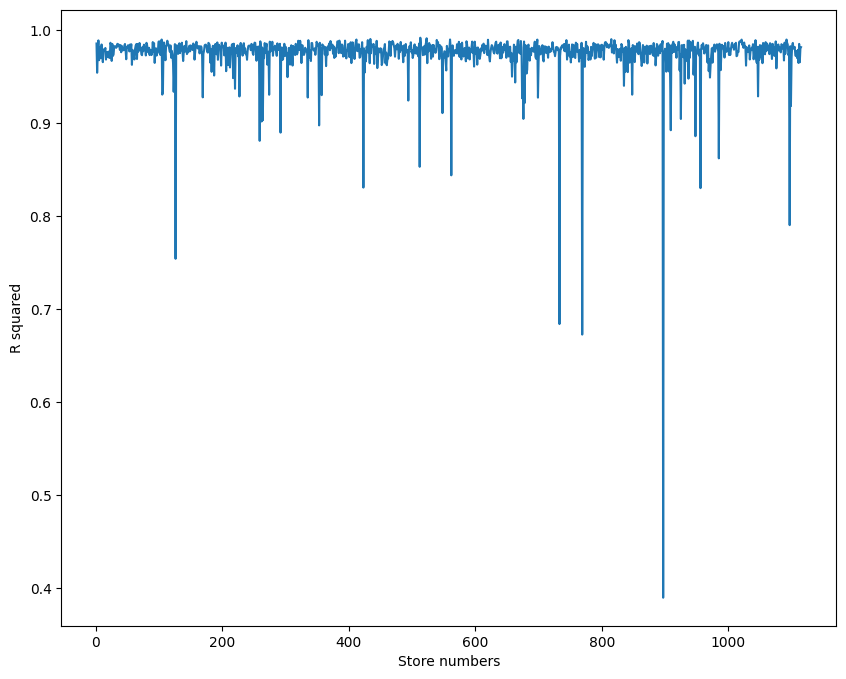

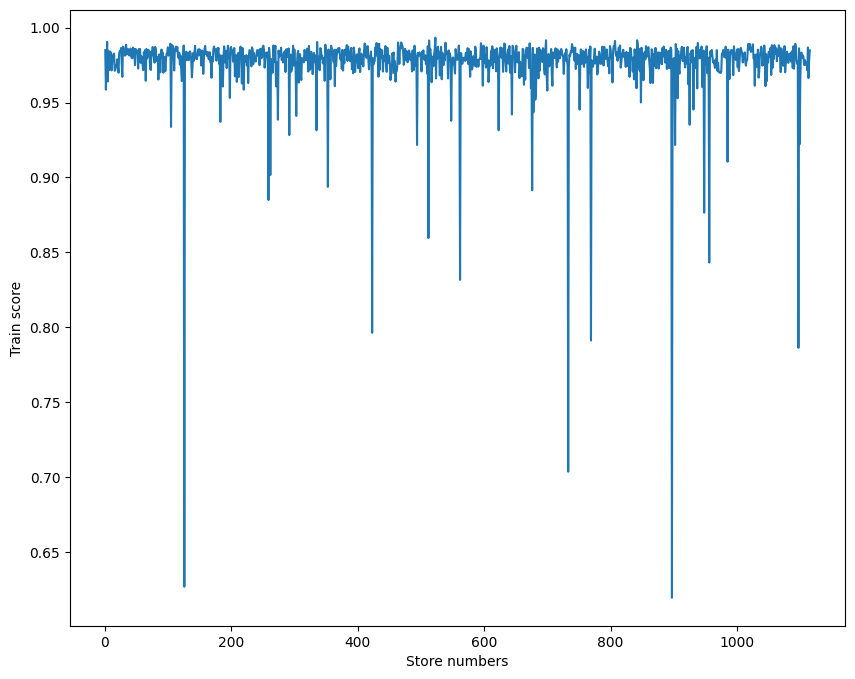

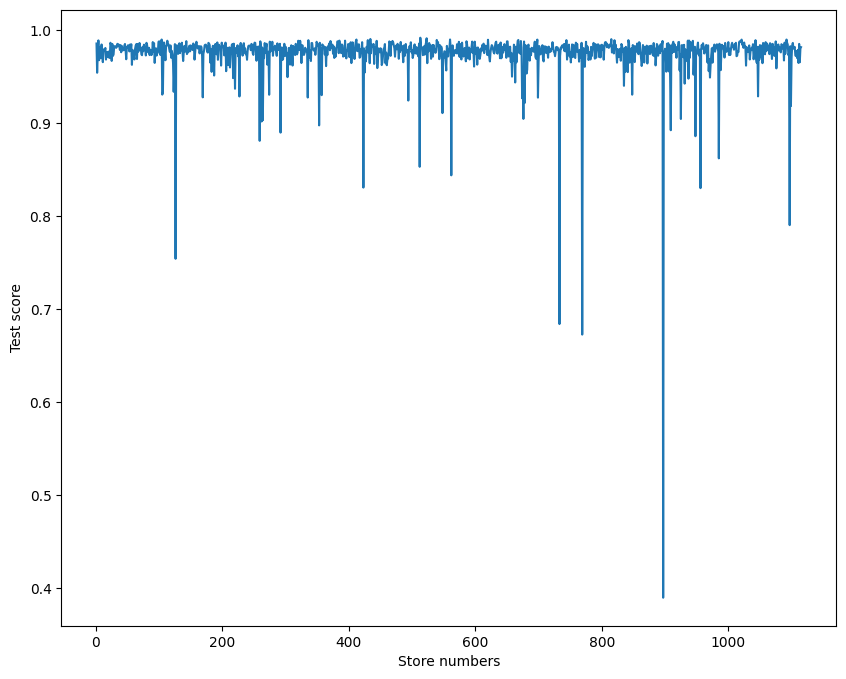

In [78]:
#Data Visualisation of separate models:
plt.figure(figsize=(10,8))
plt.plot(store_numbers,mae_list)
plt.xlabel('Store numbers')
plt.ylabel('Mean absolute error')
plt.figure(figsize=(15,8))
plt.plot(store_numbers,rmse_list)
plt.xlabel('Store numbers')
plt.ylabel('Mean squared error')
plt.figure(figsize=(10,8))
plt.plot(store_numbers,r2_list)
plt.xlabel('Store numbers')
plt.ylabel('R squared')
plt.figure(figsize=(10,8))
plt.plot(store_numbers,train_score_list)
plt.xlabel('Store numbers')
plt.ylabel('Train score')
plt.figure(figsize=(10,8))
plt.plot(store_numbers,test_score_list)
plt.xlabel('Store numbers')
plt.ylabel('Test score')

In [79]:
#Ensemble by Model stacking
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
# # @title
# len(y_pred_each)

In [81]:
# # for i in range(len(ypred_list)):
# #   print(len(ypred_list[i]))
# len(ypred_list)

In [82]:
# #Ensemble by Model stacking
# max_length = 183
# def model_stack(y):
#   for i in range(len(y)):
#     if len(y[i])<=max_length:
#       padding=max_length-len(y[i])
#       padded_pred=list(y[i])
#       padded_pred+=[np.nan]*padding #adding padding to match the length of every store size to 183 values
#       y[i] = np.array(padded_pred,dtype=object)
#       #print(len(ypred_list[i].shape))
#   y = [np.array(padded_pred) if np.array(padded_pred).ndim > 0 else np.array([padded_pred]) for padded_pred in y]
#   #ypred_list = [np.concatenate(store_predictions) for store_predictions in ypred_list]
#   print(len(y))
#   stacked = np.column_stack(y)
#   return stacked

In [83]:
# # stacked_predictions = model_stack(ypred_list)
# stacked_predictions = np.nan_to_num(stacked_predictions)
# #stacked_predictions = stacked_predictions.astype(float)
# stacked_predictions.shape

In [84]:
# stacked_predictions[0].shape

In [85]:
# stacked_actuals = model_stack(y_test_list)
# stacked_actuals.shape
# stacked_actuals  = np.nan_to_num(stacked_actuals)
# #stacked_actuals = stacked_actuals.astype(float32)

In [86]:
# stacked_actuals.shape

In [87]:
# max_length = 183
# for i, pred_array in enumerate(ypred_list):
#     if len(pred_array) < max_length:
#         padding = max_length - len(pred_array)
#         padded_pred = list(pred_array)
#         padded_pred += [np.nan] * padding
#         ypred_list[i] = np.array(padded_pred)
#         print(f"Store {i + 1}: Original Length = {len(pred_array)}, Padded Length = {len(ypred_list[i])}")

# # Check the lengths to identify any discrepancies
# lengths = [len(pred_array) for pred_array in ypred_list]

# # If there are any discrepancies, you'll need to investigate further and address them before stacking.
# print(len(lengths))

In [88]:
# stacked_actuals.shape

In [89]:
# meta_model = LinearRegression()
# mmodel=meta_model.fit(stacked_predictions, stacked_actuals)
# meta_predictions = mmodel.predict(stacked_predictions)

In [90]:
# # Calculate metrics for the meta-model
# meta_mae = mean_absolute_error(stacked_actuals, meta_predictions)
# meta_mse = mean_squared_error(stacked_actuals, meta_predictions)
# meta_rmse = np.sqrt(meta_mse)


# print("Meta-Model Metrics:")
# print("Mean Absolute Error (MAE):", meta_mae)
# print("Mean Squared Error (MSE):", meta_mse)
# print("Root Mean Squared Error (RMSE):", meta_rmse)


In [91]:
#lasso regression
from sklearn.linear_model import Lasso
LR=Lasso(alpha=0.1)
LR.fit(X_train_full,y_train_full)
train_l1score =LR.score(X_train_full,y_train_full)
test_l1score=LR.score(X_test_full,y_test_full)
y_pred_LR=LR.predict(X_test_full)
metrics(y_test_full,y_pred_LR)
print(train_l1score,test_l1score)

MAE:0.29161601671199194
MSE:0.40209982347155804
R_squared:0.836888622281623
0.8354956435952063 0.836888622281623


In [92]:
#initialisation of lists
LR_mae_list=[]
LR_mse_list=[]
LR_rmse_list=[]
LR_train_score_list=[]
LR_test_score_list=[]

In [93]:
def LR_call(X_train,X_test,y_train,y_test):
  LR=Lasso(alpha=0.1)
  LR.fit(X_train,y_train)
  train_score =LR.score(X_train,y_train)
  test_score=LR.score(X_test,y_test)
  #print(train_score,test_score)
  y_pred_LR=LR.predict(X_test)
  #print(y_pred_LR.shape)
  return [y_pred_LR,train_score,test_score]

In [94]:
#Separate models for each store
#extract data for each store
store_numbers = list(range(1, 1116))
for i in store_numbers:
  train_data_each =train_data_upd.loc[train_data_upd['Store']==i]
  train_data_each.shape
  y_each=y_target.loc[y_target['Store']==i]
  y_each.shape
  #Scaling of training data
  train_data_scaled_LR=StdScaling(train_data_each)
  y_scaled=StdScaling(y_each)
  #print(train_data_scaled_LR.shape)
  #train_test_split
  X_train_each,X_test_each,y_train_each,y_test_each = train_test_split(train_data_scaled_LR,y_scaled[:,1],test_size=0.2,random_state=30)
  #Lasso regression
  print("Model for Store : ", i)
  LR_1=LR_call(X_train_each,X_test_each,y_train_each,y_test_each)
  y_pred_each_LR=LR_1[0]
  print(LR_1[1])
  print(LR_1[2])
  print(y_pred_each_LR.shape)
  metric=metrics(y_test_each,y_pred_each_LR)
  LR_mae_list.append(metric[0])
  LR_mse_list.append(metric[1])
  LR_rmse_list.append(metric[2])
  LR_train_score_list.append(LR_1[1])
  LR_test_score_list.append(LR_1[2])
print("Mean MAE: ", mean(LR_mae_list),"Mean MSE: ",mean(LR_mse_list),"Mean R squared: ",mean(LR_rmse_list),mean(LR_train_score_list),mean(LR_test_score_list) )
print(len(LR_mae_list),len(LR_mse_list),len(LR_rmse_list),len(LR_train_score_list),len(LR_test_score_list) )

Streaming output truncated to the last 5000 lines.
Model for Store :  402
0.957020014222534
0.9553508226110996
(183,)
MAE:0.1480959158647344
MSE:0.20888496417332839
R_squared:0.9553508226110996
Model for Store :  403
0.9717770645238697
0.9760860019265063
(183,)
MAE:0.11751381459879968
MSE:0.14791199803376337
R_squared:0.9760860019265063
Model for Store :  404
0.9513243305955335
0.9489610572647509
(183,)
MAE:0.16206562067563907
MSE:0.21322342631707708
R_squared:0.9489610572647509
Model for Store :  405
0.9526699419648019
0.9546533556664891
(183,)
MAE:0.1435599449093471
MSE:0.20292063436043487
R_squared:0.9546533556664891
Model for Store :  406
0.9605935191354761
0.9691363542601875
(183,)
MAE:0.1346128850046403
MSE:0.16873784174830644
R_squared:0.9691363542601875
Model for Store :  407
0.9583194431018961
0.9565697962612937
(146,)
MAE:0.15947536831755604
MSE:0.20756290287761017
R_squared:0.9565697962612937
Model for Store :  408
0.9587643782537746
0.9556192745072214
(183,)
MAE:0.157422660

In [95]:
len(LR_train_score_list)

1115

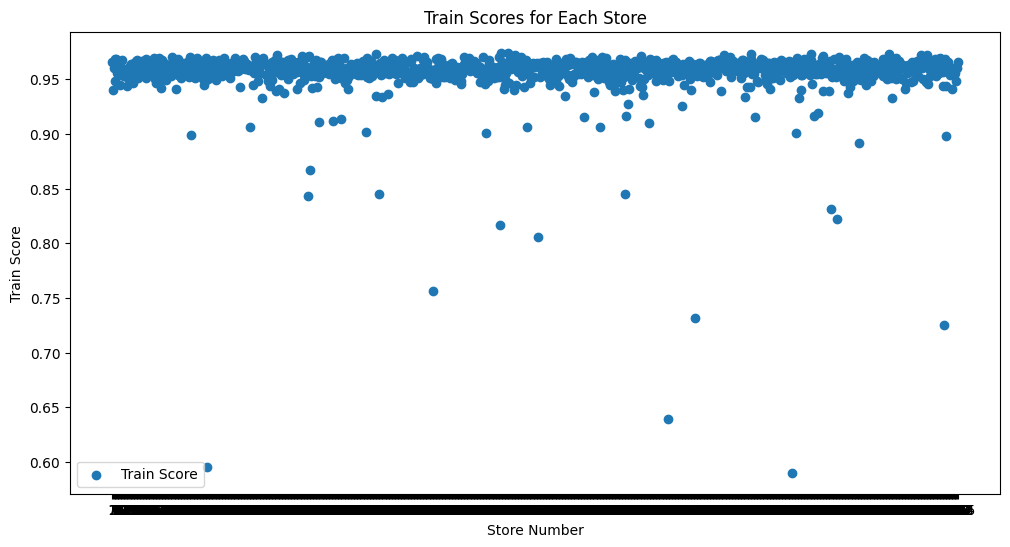

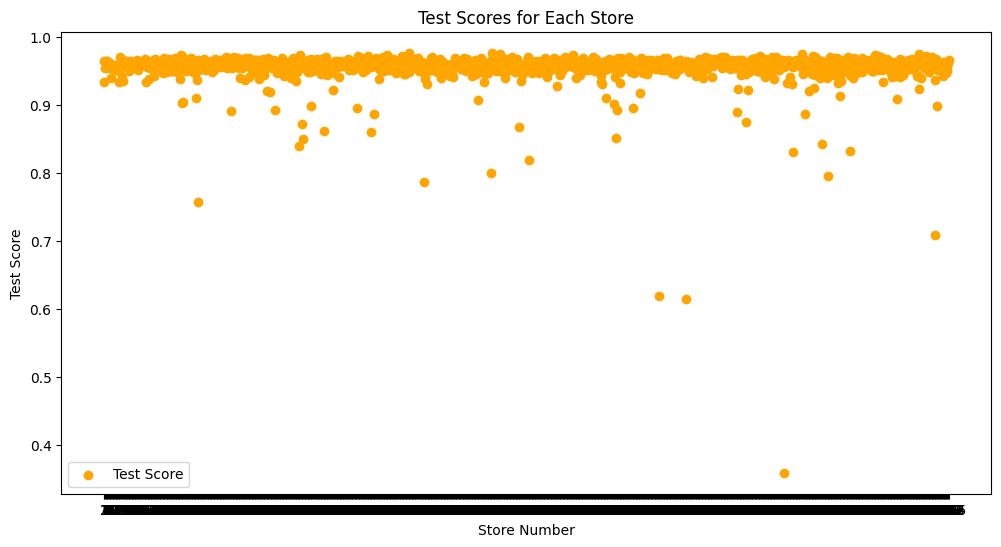

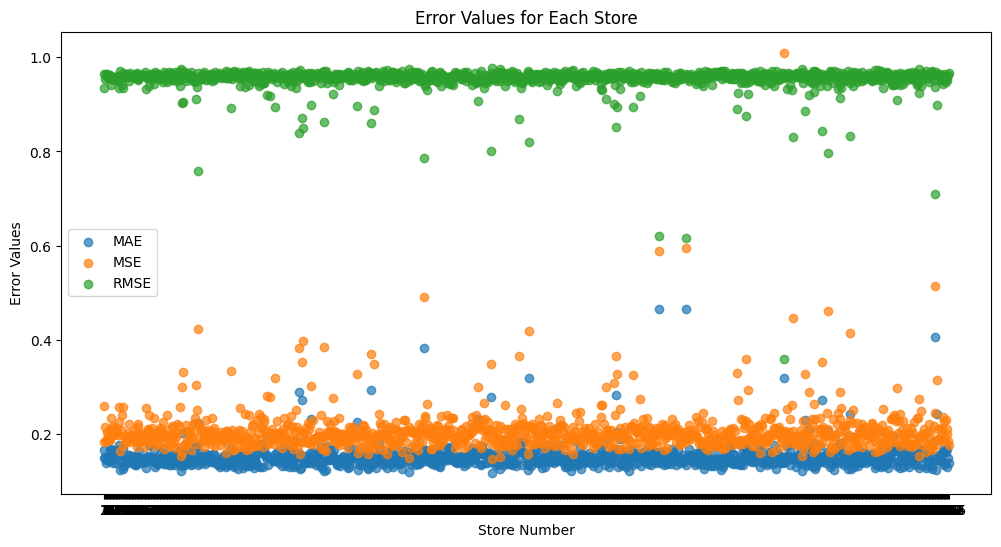

In [96]:
# Plot train scores
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, LR_train_score_list, label='Train Score')
plt.xlabel('Store Number')
plt.ylabel('Train Score')
plt.title('Train Scores for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

# Plot test scores
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, LR_test_score_list, label='Test Score', color='orange')
plt.xlabel('Store Number')
plt.ylabel('Test Score')
plt.title('Test Scores for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

# Plot MAE, MSE, RMSE
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, LR_mae_list, label='MAE', alpha=0.7)
plt.scatter(store_numbers, LR_mse_list, label='MSE', alpha=0.7)
plt.scatter(store_numbers, LR_rmse_list, label='RMSE', alpha=0.7)
plt.xlabel('Store Number')
plt.ylabel('Error Values')
plt.title('Error Values for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

In [97]:
#When Sales =0

train_data_upd1 = pd.concat([train_data_upd,train_data['Sales']],axis=1)

In [98]:
#When sales =0

train_data_upd1.drop(train_data_upd1[train_data_upd1['Sales']== 0].index,inplace=True)
train_data_upd1.shape

(814150, 14)

In [99]:
y=train_data_upd1[['Sales','Store']]
train_data_upd1=train_data_upd1.drop(columns='Sales')

In [100]:
train_data_upd1_scaled = StdScaling(train_data_upd1)
y_1 = y['Sales']
y_1=y_1.values.reshape(-1,1)
y_scaled = StdScaling(y_1)
X_train_full,X_test_full,y_train_full,y_test_full=train_test_split(train_data_upd1_scaled,y_scaled,test_size=0.2,random_state=30)

In [101]:
#Linear Regression for full data
lin_reg_upd=LinearRegression()
lin_reg_upd.fit(X_train_full,y_train_full)
y_pred_upd=lin_reg_upd.predict(X_test_full)
print(lin_reg_upd.score(X_test_full,y_test_full))
print(lin_reg_upd.score(X_train_full,y_train_full))

0.7320004320958351
0.7339966114367751


In [102]:
metrics(y_pred_upd,y_test_full)

MAE:0.36984285626751656
MSE:0.5175526657834212
R_squared:0.6361014973148202


[0.36984285626751656, 0.5175526657834212, 0.6361014973148202]

In [117]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [104]:
train_data_upd.shape
train_data_scaled_xg = StdScaling(train_data_upd)
y_xg = train_data['Sales']
y_xg = y_xg.values.reshape(-1,1)
y_xg_scaled = StdScaling(y_xg)

In [107]:
y_xg.shape

(982644, 1)

In [108]:
X_train_full,X_test_full,y_train_full,y_test_full=train_test_split(train_data_scaled_xg,y_xg_scaled,test_size=0.2,random_state=30)

In [109]:
from xgboost.core import Objective
import xgboost as xgb
#Train the full model
xgb_reg=xgb.XGBRegressor(learning_rate=0.02,objective='reg:linear',n_estimators=50,seed='123')
xgb_reg.fit(X_train_full,y_train_full)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:17:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [110]:
y_pred_xgb=xgb_reg.predict(X_test_full)
xgb=metrics(y_test_full,y_pred_xgb)
print(xgb)
print(xgb_reg.score(X_train_full,y_train_full))
print(xgb_reg.score(X_test_full,y_test_full))

MAE:0.3684883612267635
MSE:0.4865590455423147
R_squared:0.761170707085425
[0.3684883612267635, 0.4865590455423147, 0.761170707085425]
0.7597886267085352
0.761170707085425


In [129]:
#initialisation of lists
XGB_mae_list=[]
XGB_mse_list=[]
XGB_r2_list=[]
XGB_train_score_list=[]
XGB_test_score_list=[]

In [130]:
def XGB_reg_call(X_train,X_test,y_train,y_test):
  XGB_reg=xgb.XGBRegressor(objective='reg:linear',n_estimators=50,seed='123')
  XGB_reg.fit(X_train,y_train)
  train_score_xgb =XGB_reg.score(X_train,y_train)
  test_score_xgb=XGB_reg.score(X_test,y_test)
  #print(train_score,test_score)
  y_pred_xgbr=XGB_reg.predict(X_test)
  return [y_pred_xgbr,train_score_xgb,test_score_xgb]

In [133]:
y_xg_full = train_data[['Store','Sales']]
y_xg_full.head()

,Store,Sales
0,1,5735
1,2,9863
2,3,13261
3,4,13106
4,5,6635


In [135]:
import xgboost as xgb
#Train separate models:
store_numbers = list(range(1, 1116))
for i in store_numbers:
  train_data_each =train_data_upd.loc[train_data_upd['Store']==i]
  train_data_each.shape
  y_each = y_xg_full.loc[y_xg_full['Store'] == i, 'Sales']
  y_each.shape
  #Scaling of training data
  train_data_scaled=StdScaling(train_data_each)
  y_each=y_each.values.reshape(-1,1)
  y_scaled=StdScaling(y_each)
  #train_test_split
  X_train_each,X_test_each,y_train_each,y_test_each = train_test_split(train_data_scaled,y_scaled,test_size=0.2,random_state=30)
  #XGB regression
  print("Model for Store : ", i)
  XGB_R=XGB_reg_call(X_train_each,X_test_each,y_train_each,y_test_each)
  y_pred_each_XGB=XGB_R[0]
  print(XGB_R[1])
  print(XGB_R[2])
  #y_pred_each.shape
  metric=metrics(y_test_each,y_pred_each_XGB)
  XGB_mae_list.append(metric[0])
  XGB_mse_list.append(metric[1])
  XGB_r2_list.append(metric[2])
  XGB_train_score_list.append(XGB_R[1])
  XGB_test_score_list.append(XGB_R[2])
print("Mean MAE :",mean(XGB_mae_list),"Mean MSE :",mean(XGB_mse_list),"Mean R2 :",mean(XGB_r2_list),mean(XGB_train_score_list),mean(XGB_test_score_list))

Model for Store :  1
0.9991514643090519
0.9808203429602204
MAE:0.09447036366894986
MSE:0.13519809287592058
R_squared:0.9808203429602204
Model for Store :  2
0.9995561215936234
0.9858844360509361
MAE:0.08778976203712566
MSE:0.11956149592682044
R_squared:0.9858844360509361
Model for Store :  3
0.9996136879391866
0.9858280481181584
MAE:0.0815622995989822
MSE:0.11950634150529894
R_squared:0.9858280481181584


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  4
0.9995516817966663
0.9900510023185487
MAE:0.07139274587010434
MSE:0.09721979672779235
R_squared:0.9900510023185487
Model for Store :  5
0.999502283282681
0.9842965555874699
MAE:0.07789684822030796
MSE:0.12335585897974916
R_squared:0.9842965555874699
Model for Store :  6
0.9995640114342019
0.9889379884654279
MAE:0.07174513940884196
MSE:0.10606533522313102
R_squared:0.9889379884654279
Model for Store :  7


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996509042453059
0.9861201012311192
MAE:0.0794299422546016
MSE:0.11454434494890514
R_squared:0.9861201012311192
Model for Store :  8
0.9996175467866468
0.9841949581425568
MAE:0.08325753831737993
MSE:0.12021156319228243
R_squared:0.9841949581425568
Model for Store :  9
0.999571487617421
0.981179491451433
MAE:0.0972515308319016
MSE:0.1325799538973781
R_squared:0.981179491451433
Model for Store :  10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993135207609131
0.9797836266920043
MAE:0.10004062383038255
MSE:0.14003131863950435
R_squared:0.9797836266920043
Model for Store :  11
0.9993127597263913
0.9793224017778092
MAE:0.09109837358302142
MSE:0.13722624177723247
R_squared:0.9793224017778092
Model for Store :  12
0.9993433013206411
0.9862615685753588
MAE:0.08249654766859806
MSE:0.11449149308482194
R_squared:0.9862615685753588
Model for Store :  13
0.99925931582145
0.9756956048079719
MAE:0.11063017724889473
MSE:0.15764020344937654
R_squared:0.9756956048079719
Model for Store :  14


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995542997510304
0.9842638653386739
MAE:0.08343286560064327
MSE:0.12431956652762778
R_squared:0.9842638653386739
Model for Store :  15
0.9993999727030055
0.9816480389488836
MAE:0.0876370525479309
MSE:0.13137266874821948
R_squared:0.9816480389488836
Model for Store :  16
0.9995119273902139
0.9841718937326833
MAE:0.08850588100240117
MSE:0.12166158832571601
R_squared:0.9841718937326833
Model for Store :  17


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996505029189673
0.9891303477100108
MAE:0.06827719151588672
MSE:0.10375096575545636
R_squared:0.9891303477100108
Model for Store :  18
0.9996681271144038
0.9847792693016594
MAE:0.08554197949971352
MSE:0.11996867865041762
R_squared:0.9847792693016594
Model for Store :  19


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995594600736125
0.9828592755582004
MAE:0.0916213065784023
MSE:0.12722110906110193
R_squared:0.9828592755582004
Model for Store :  20
0.9997389187200802
0.9845844284395269
MAE:0.08670193314765239
MSE:0.12145657852723632
R_squared:0.9845844284395269
Model for Store :  21


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9989469378549402
0.9735473935730277
MAE:0.11974453536900274
MSE:0.16215405509592995
R_squared:0.9735473935730277
Model for Store :  22


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993893449825739
0.9799073925946042
MAE:0.1029777446602978
MSE:0.142312717276569
R_squared:0.9799073925946042
Model for Store :  23
0.9994610966354459
0.986059247995715
MAE:0.08056620075647489
MSE:0.11118028132509683
R_squared:0.986059247995715
Model for Store :  24


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996633198160388
0.9867527984103044
MAE:0.077400506160099
MSE:0.11366227191698251
R_squared:0.9867527984103044
Model for Store :  25


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997241893485409
0.9809458826559144
MAE:0.08037944682006554
MSE:0.13678964797389748
R_squared:0.9809458826559144
Model for Store :  26


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995742364719478
0.985326289413604
MAE:0.08472059170154848
MSE:0.1167853871114939
R_squared:0.985326289413604
Model for Store :  27
0.999521894383604
0.9839393139374348
MAE:0.083200671044158
MSE:0.1277946468123983
R_squared:0.9839393139374348
Model for Store :  28


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996126607221926
0.9844386785177336
MAE:0.07395786795460584
MSE:0.11983128272246737
R_squared:0.9844386785177336
Model for Store :  29
0.9996245624678226
0.98448122987446
MAE:0.0830521824249847
MSE:0.12006595088804069
R_squared:0.98448122987446
Model for Store :  30


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995635677715454
0.9902978609956753
MAE:0.06974116033587793
MSE:0.0940668692358493
R_squared:0.9902978609956753
Model for Store :  31


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992556890574789
0.9832464552198443
MAE:0.08838650886806154
MSE:0.12530040552613478
R_squared:0.9832464552198443
Model for Store :  32
0.999639303424517
0.983917446696319
MAE:0.09345758308223118
MSE:0.12696928198804355
R_squared:0.983917446696319
Model for Store :  33


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996286053816171
0.987381930514202
MAE:0.07547713341100293
MSE:0.10928815328032454
R_squared:0.987381930514202
Model for Store :  34
0.9995563779816979
0.9883977855731652
MAE:0.07788596989462977
MSE:0.10584688311560697
R_squared:0.9883977855731652
Model for Store :  35
0.999503117362913
0.9874109684667236
MAE:0.0838943174695999
MSE:0.1109675829418854
R_squared:0.9874109684667236
Model for Store :  36
0.9996187498983695
0.9812857469343423
MAE:0.09452925476714619
MSE:0.13488642988858612
R_squared:0.9812857469343423
Model for Store :  37


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995472182797599
0.9843573511789345
MAE:0.08318134223708601
MSE:0.11999499448471833
R_squared:0.9843573511789345
Model for Store :  38
0.9991874176455583
0.983224467416967
MAE:0.08843311404219877
MSE:0.12379795819297064
R_squared:0.983224467416967
Model for Store :  39
0.9995519351485609
0.9856855798840836
MAE:0.07748943514590954
MSE:0.11844153896073158
R_squared:0.9856855798840836
Model for Store :  40


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995015271065563
0.9755315646013382
MAE:0.10251234311858165
MSE:0.14971134007767917
R_squared:0.9755315646013382
Model for Store :  41
0.9996152059703924
0.978846093606178
MAE:0.10721796160162086
MSE:0.14566996033254215
R_squared:0.978846093606178
Model for Store :  42
0.9996009946781181
0.9869755741290995
MAE:0.08111201323160291
MSE:0.1123562891891578
R_squared:0.9869755741290995
Model for Store :  43
0.9994984842470945
0.9871894093357443
MAE:0.07727593424217642
MSE:0.1110389035676109
R_squared:0.9871894093357443


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  44
0.9994340882408407
0.9881928520117521
MAE:0.0759473839926019
MSE:0.10580994968692978
R_squared:0.9881928520117521
Model for Store :  45
0.9991750363332922
0.9837220657489997
MAE:0.08910420227703464
MSE:0.12097320815578808
R_squared:0.9837220657489997
Model for Store :  46
0.9995598252980784
0.9842408143077516
MAE:0.08820580004385689
MSE:0.126705930488015
R_squared:0.9842408143077516
Model for Store :  47


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995382448799891
0.9858394199311014
MAE:0.08272018169147743
MSE:0.11792810454047485
R_squared:0.9858394199311014
Model for Store :  48
0.9991864357335477
0.9794892162582629
MAE:0.10183696307183225
MSE:0.13765688621977284
R_squared:0.9794892162582629
Model for Store :  49
0.9993636337500356
0.9787747706596277
MAE:0.09337066647680842
MSE:0.14007371870285948
R_squared:0.9787747706596277
Model for Store :  50
0.999240725713802
0.9801193724626347
MAE:0.09225673259079507
MSE:0.13533019807172203
R_squared:0.9801193724626347


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  51
0.9995001154210301
0.979113521382367
MAE:0.09958415659118061
MSE:0.14370801356769633
R_squared:0.979113521382367
Model for Store :  52
0.9995248336921242
0.9837658812418238
MAE:0.08380503090546741
MSE:0.12792218051292883
R_squared:0.9837658812418238
Model for Store :  53
0.9994136677099753
0.9845868916926978
MAE:0.08343792261946167
MSE:0.11814864166542445
R_squared:0.9845868916926978
Model for Store :  54


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995059968682521
0.9825777666931018
MAE:0.09165183372338795
MSE:0.12823786960462338
R_squared:0.9825777666931018
Model for Store :  55
0.9995351091250055
0.9889366841425368
MAE:0.07390407822937305
MSE:0.10220549560260941
R_squared:0.9889366841425368
Model for Store :  56
0.9994697548370564
0.9860788885037672
MAE:0.08268150572412201
MSE:0.11492041083751975
R_squared:0.9860788885037672
Model for Store :  57
0.9994485068928116
0.9896718025019212
MAE:0.06579625365762014
MSE:0.10023079242545577
R_squared:0.9896718025019212
Model for Store :  58
0.9995613858258114
0.9815578214023272
MAE:0.09457795267367698
MSE:0.1308604166203166
R_squared:0.9815578214023272
Model for Store :  59
0.9994643604393569
0.9835109292696176
MAE:0.07951036181144938
MSE:0.1287284535300406
R_squared:0.9835109292696176
Model for Store :  60
0.9995829520060499
0.9865308326439032
MAE:0.08010102594875398
MSE:0.11431902346674308
R_squared:0.9865308326439032


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  61
0.9988840270192976
0.9664248287634003
MAE:0.12055529511645673
MSE:0.17880051405700087
R_squared:0.9664248287634003
Model for Store :  62
0.9996862822704999
0.9881956614294474
MAE:0.07485066033561454
MSE:0.10504673400308844
R_squared:0.9881956614294474
Model for Store :  63
0.9994823940330695
0.9843496557382375
MAE:0.0845549197012752
MSE:0.11919966565357026
R_squared:0.9843496557382375
Model for Store :  64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997076883027991
0.9878108857212646
MAE:0.07111755438267921
MSE:0.10660793004001588
R_squared:0.9878108857212646
Model for Store :  65
0.9995157913743007
0.9811795219322377
MAE:0.09321763597131472
MSE:0.1343531552107181
R_squared:0.9811795219322377
Model for Store :  66
0.9992865950113934
0.9727361271951533
MAE:0.09318559227516114
MSE:0.16090302626771993
R_squared:0.9727361271951533
Model for Store :  67
0.9995692320949445
0.9872836890674092
MAE:0.08077700724483616
MSE:0.1106651957901287
R_squared:0.9872836890674092
Model for Store : 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


 68
0.9993617276046626
0.978193654079743
MAE:0.0944124816488254
MSE:0.14331619961364747
R_squared:0.978193654079743
Model for Store :  69
0.999554646113373
0.9889453766212878
MAE:0.06794014848158134
MSE:0.10180085889335949
R_squared:0.9889453766212878
Model for Store :  70
0.9992619590441059
0.9858113073409961
MAE:0.07979009159618033
MSE:0.11391164860179698
R_squared:0.9858113073409961
Model for Store :  71


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995482104869657
0.9864461775366039
MAE:0.07521447533037444
MSE:0.11220536880818752
R_squared:0.9864461775366039
Model for Store :  72
0.9995898812663742
0.9804380907785581
MAE:0.09737921148377505
MSE:0.13666669726619005
R_squared:0.9804380907785581
Model for Store :  73
0.9992614264314034
0.9793884166809537
MAE:0.0998336540047579
MSE:0.13725788190642413
R_squared:0.9793884166809537
Model for Store :  74
0.999545872266174

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



0.9870984412721355
MAE:0.07639337546626804
MSE:0.11014478159335217
R_squared:0.9870984412721355
Model for Store :  75
0.9992394918496016
0.9800281960110209
MAE:0.08999320800612946
MSE:0.13628034374242243
R_squared:0.9800281960110209
Model for Store :  76
0.9996435959345135
0.9815032970911609
MAE:0.08885310037724234
MSE:0.13840283367401965
R_squared:0.9815032970911609
Model for Store :  77
0.9995494520550654
0.9865582963730658
MAE:0.08167982593912874
MSE:0.11186501505568687
R_squared:0.9865582963730658
Model for Store :  78


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999431258308956
0.9842139344033797
MAE:0.08887342515488421
MSE:0.12320961060900135
R_squared:0.9842139344033797
Model for Store :  79
0.999365340584957
0.9807247109498534
MAE:0.09311820684018265
MSE:0.1359547348387314
R_squared:0.9807247109498534
Model for Store :  80
0.9995236632832133
0.987192993077738
MAE:0.07946483229744328
MSE:0.10890781344860727
R_squared:0.987192993077738
Model for Store :  81
0.9995822240240914
0.9840068734833828
MAE:0.08905398147924672
MSE:0.12491618433023877
R_squared:0.9840068734833828
Model for Store :  82


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996019657286392
0.9899459285796958
MAE:0.06958297922330603
MSE:0.09603150713722076
R_squared:0.9899459285796958
Model for Store :  83
0.9993125510277057
0.9766545546481872
MAE:0.10316956081492604
MSE:0.14751597346116363
R_squared:0.9766545546481872
Model for Store :  84
0.9996512618561094
0.9906576489660449
MAE:0.06721599844208165
MSE:0.09382685513898194
R_squared:0.9906576489660449
Model for Store :  85
0.9986131634436343
0.9777720725577221
MAE:0.11945317466705914
MSE:0.15821685381951495
R_squared:0.9777720725577221


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  86
0.9994450733729543
0.9827707787134892
MAE:0.08975062234771036
MSE:0.12769938427783784
R_squared:0.9827707787134892
Model for Store :  87
0.9993130587543672
0.9844217634127778
MAE:0.08470540069622758
MSE:0.12140728582966241
R_squared:0.9844217634127778
Model for Store :  88


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994422031584098
0.9908853429883755
MAE:0.06741982482935277
MSE:0.09422634747963231
R_squared:0.9908853429883755
Model for Store :  89
0.9995180525782558
0.98167978977897
MAE:0.0941846026549223
MSE:0.13255909185194745
R_squared:0.98167978977897
Model for Store :  90
0.99954953778128
0.9899955138221642
MAE:0.06989614006672785
MSE:0.09723898858608833
R_squared:0.9899955138221642
Model for Store :  91
0.9994806071984611
0.9796588085234438
MAE:0.08882239371257816
MSE:0.13926952263543918
R_squared:0.9796588085234438
Model for Store :  92
0.999465400224204
0.9829604712870617
MAE:0.08705747816560688
MSE:0.1260829485879834
R_squared:0.9829604712870617
Model for Store :  93
0.9995504966447399
0.9742716948215087
MAE:0.09265923483453721
MSE:0.1560842038396918
R_squared:0.9742716948215087
Model for Store :  94
0.999579996333686
0.9829037816163628
MAE:0.09059722538246325
MSE:0.1250336793832906
R_squared:0.9829037816163628
Model for Store :  95


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999578674751167
0.9892465155998191
MAE:0.07295946799224477
MSE:0.10124950869247408
R_squared:0.9892465155998191
Model for Store :  96
0.999467594986223
0.9886567118543487
MAE:0.07137013526093834
MSE:0.10484558679086159
R_squared:0.9886567118543487
Model for Store :  97
0.9995427295851123
0.9862093276126698
MAE:0.08243477417464858
MSE:0.11314506263424774
R_squared:0.9862093276126698
Model for Store :  98
0.999269566203929
0.9779125831468769
MAE:0.0969088151396184
MSE:0.14645961454304388
R_squared:0.9779125831468769
Model for Store :  99


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995871929358191
0.9818879633099767
MAE:0.09566411044637045
MSE:0.1345369025656393
R_squared:0.9818879633099767
Model for Store :  100
0.9994806723177875
0.9865943514667651
MAE:0.08399074277890935
MSE:0.11387712335179123
R_squared:0.9865943514667651
Model for Store :  101
0.9992496389645786
0.9857502132394531
MAE:0.08203412688680929
MSE:0.11684743339272867
R_squared:0.9857502132394531
Model for Store :  102
0.9996365194537943
0.9751256313051844
MAE:0.08828085493128356
MSE:0.16299276496848006
R_squared:0.9751256313051844
Model for Store :  103


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

0.9995332342081237
0.9896288629591753
MAE:0.06770871176462866
MSE:0.09728870920362366
R_squared:0.9896288629591753
Model for Store :  104
0.9996774972792203
0.991237655659162
MAE:0.06620580799876284
MSE:0.09030673114618205
R_squared:0.991237655659162
Model for Store :  105
0.9991136580063874
0.95258938821651
MAE:0.10957903217889156
MSE:0.20866845862458128
R_squared:0.95258938821651
Model for Store :  106
0.9993923568835309
0.9512469138267556
MAE:0.08073657478235705
MSE:0.2370352683728927
R_squared:0.9512469138267556
Model for Store :  107


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995781532731121
0.9894138197014912
MAE:0.06931140508254008
MSE:0.09983450169226897
R_squared:0.9894138197014912
Model for Store :  108
0.9997517324513431
0.9868318643311512
MAE:0.07824463234768224
MSE:0.1141924129695512
R_squared:0.9868318643311512
Model for Store :  109
0.9993174248670614
0.9841629313297703
MAE:0.08042683183361021
MSE:0.12194246450743489
R_squared:0.9841629313297703
Model for Store :  110
0.9993811509436128
0.9809119327043757
MAE:0.09517074096780492
MSE:0.13415417178989017
R_squared:0.9809119327043757
Model for Store :  111


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992342229008545
0.9835869326115895
MAE:0.08346934260072772
MSE:0.12434759537165063
R_squared:0.9835869326115895
Model for Store :  112
0.9993110390067123
0.9876153355707544
MAE:0.07903734709138127
MSE:0.10812738173281197
R_squared:0.9876153355707544
Model for Store :  113
0.9995317706198787
0.9821960345545367
MAE:0.09187597510165876
MSE:0.13606179663248125
R_squared:0.9821960345545367
Model for Store :  114
0.9993106534259565
0.9827189775623912
MAE:0.09384781866138446
MSE:0.12780212151690235
R_squared:0.9827189775623912
Model for Store :  115


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997748795821685
0.9837090325180835
MAE:0.09053434982848962
MSE:0.12733022261169216
R_squared:0.9837090325180835
Model for Store :  116
0.9994720322152417
0.9901608514001495
MAE:0.06828786660446974
MSE:0.09428897090006678
R_squared:0.9901608514001495
Model for Store :  117
0.9993932621028513
0.9830168204234022
MAE:0.09326356110091513
MSE:0.1271947878241046
R_squared:0.9830168204234022
Model for Store :  118
0.9995751175314537
0.9874717028289139
MAE:0.07742590577160269
MSE:0.10690673852787654
R_squared:0.9874717028289139
Model for Store :  119


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995021398020799
0.9836314871318989
MAE:0.08521240996178571
MSE:0.12499373269462155
R_squared:0.9836314871318989
Model for Store :  120
0.9994457899637487
0.9849768011724381
MAE:0.09073720137253818
MSE:0.1205770718479592
R_squared:0.9849768011724381
Model for Store :  121
0.9995187864576647
0.9847967060918318
MAE:0.08398104309939079
MSE:0.1200545352522744
R_squared:0.9847967060918318
Model for Store :  122
0.9991040278549648
0.9823709134153783
MAE:0.09935934674748546
MSE:0.13703750288352604
R_squared:0.9823709134153783
Model for Store :  123


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996938086882371
0.9609867003157592
MAE:0.08270192713145856
MSE:0.20074500203569434
R_squared:0.9609867003157592
Model for Store :  124
0.9995008400767144
0.9626024646407955
MAE:0.11847923338280202
MSE:0.19305093638361492
R_squared:0.9626024646407955
Model for Store :  125
0.9996890529063239
0.9927153657230049
MAE:0.059811776808505385
MSE:0.08361586438456385
R_squared:0.9927153657230049
Model for Store :  126
0.9970892177140996
0.47444697312889517
MAE:0.2585417310542008
MSE:0.622284890847593
R_squared:0.47444697312889517
Model for Store :  127
0.9995437116528216
0.9756636197028814
MAE:0.11046314785188885
MSE:0.15662235930445095
R_squared:0.9756636197028814
Model for Store :  128
0.9994697622933849
0.9868992738292434
MAE:0.0786271766076328
MSE:0.11010809611347525
R_squared:0.9868992738292434
Model for Store :  129
0.9996708956544589
0.9845197027609333
MAE:0.08819207675824418
MSE:0.12451627437955301
R_squared:0.9845197027609333
Model for Store :  130


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993469659435125
0.984538064598073
MAE:0.08821254706827625
MSE:0.1217714209915862
R_squared:0.984538064598073
Model for Store :  131
0.999019792972429
0.980014381758397
MAE:0.09077736564709421
MSE:0.13634205903378238
R_squared:0.980014381758397
Model for Store :  132
0.9996623746495482
0.9839093203653757
MAE:0.0911458910355555
MSE:0.12371208486834155
R_squared:0.9839093203653757
Model for Store :  133
0.9996717057180282
0.9858894101355271
MAE:0.07729210422950764
MSE:0.11594619895395271
R_squared:0.9858894101355271
Model for Store :  134


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999334266194533
0.9849048428835359
MAE:0.08619426732672901
MSE:0.11885407912624953
R_squared:0.9849048428835359
Model for Store :  135
0.9993422765734667
0.9807785902740416
MAE:0.09753468226992547
MSE:0.1337033307132265
R_squared:0.9807785902740416
Model for Store :  136
0.9996999705088677
0.9794237227445699
MAE:0.09482273505984985
MSE:0.14916203190784477
R_squared:0.9794237227445699
Model for Store :  137
0.9996590083079723
0.9870869242498487
MAE:0.07864213709484921
MSE:0.11217008765401865
R_squared:0.9870869242498487
Model for Store :  138


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995596775059945
0.9829560103218858
MAE:0.0826992244806299
MSE:0.12634023213173595
R_squared:0.9829560103218858
Model for Store :  139
0.9997211902382109
0.9806981334225013
MAE:0.09902610632740809
MSE:0.13706594449883722
R_squared:0.9806981334225013
Model for Store :  140
0.9993804099424762
0.9900486589861064
MAE:0.06929472303745329
MSE:0.0955892930306521
R_squared:0.9900486589861064
Model for Store :  141
0.9991185022898117
0.9779479100254949
MAE:0.09933435158524939
MSE:0.14342233426121648
R_squared:0.9779479100254949
Model for Store :  142


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994553471122409
0.9869582984495281
MAE:0.07938165256243235
MSE:0.10939864079411285
R_squared:0.9869582984495281
Model for Store :  143
0.9994153609666773
0.9890359385897114
MAE:0.07384731569821082
MSE:0.10230796616537718
R_squared:0.9890359385897114
Model for Store :  144
0.9994264058193932
0.9805753514125679
MAE:0.09538251013555908
MSE:0.14381142527316484
R_squared:0.9805753514125679
Model for Store :  145
0.9998037816023647
0.9854872328003637
MAE:0.0824405719422443
MSE:0.11908994668702161
R_squared:0.9854872328003637
Model for Store :  146


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999480519297268
0.9788774670557259
MAE:0.09526567917765445
MSE:0.1404643177959825
R_squared:0.9788774670557259
Model for Store :  147
0.9993810386245959
0.985798042292201
MAE:0.07621504028685873
MSE:0.11479719399200054
R_squared:0.985798042292201
Model for Store :  148
0.999538553325079
0.98800192533013
MAE:0.0773729106379026
MSE:0.10629227634749328
R_squared:0.98800192533013
Model for Store :  149
0.9996284435223468
0.9807615092921353
MAE:0.09122218696649592
MSE:0.13745013521885716
R_squared:0.9807615092921353
Model for Store :  150


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999625317909793
0.9871451699140797
MAE:0.07914888755719791
MSE:0.11008700766981215
R_squared:0.9871451699140797
Model for Store :  151
0.999660942267059
0.9797441557700062
MAE:0.09280604434415375
MSE:0.13938968714388802
R_squared:0.9797441557700062
Model for Store :  152
0.9996306938444413
0.9868962644195682
MAE:0.07761885640277369
MSE:0.11276201422049743
R_squared:0.9868962644195682
Model for Store :  153


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995872133540444
0.988349054047992
MAE:0.07090170778409949
MSE:0.10541482315362782
R_squared:0.988349054047992
Model for Store :  154
0.9995354813735193
0.9842332840292979
MAE:0.08733280440142754
MSE:0.11949247049730509
R_squared:0.9842332840292979
Model for Store :  155
0.9994582098919198
0.986017309789632
MAE:0.08352722993313436
MSE:0.11736241676084268
R_squared:0.986017309789632
Model for Store :  156
0.9995412471028909
0.990506794371369
MAE:0.06613244081444736
MSE:0.09445681278665531
R_squared:0.990506794371369
Model for Store :  157


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994963564641458
0.9864377664574847
MAE:0.07296856059642298
MSE:0.11370151298654385
R_squared:0.9864377664574847
Model for Store :  158
0.9995493535718395
0.9826151957880306
MAE:0.09548938526965393
MSE:0.12776949576355442
R_squared:0.9826151957880306
Model for Store :  159
0.9997909092988856
0.9809669386012665
MAE:0.08586917353022534
MSE:0.1373662792341145
R_squared:0.9809669386012665
Model for Store :  160
0.9992685296326075
0.9865251847462905
MAE:0.07871792856092588
MSE:0.1120786230438806
R_squared:0.9865251847462905
Model for Store :  161


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994090085548253
0.9860714593990946
MAE:0.07811375184969745
MSE:0.11427880768294599
R_squared:0.9860714593990946
Model for Store :  162
0.9996278087368197
0.9860435171034203
MAE:0.08531800044879397
MSE:0.11603964142180954
R_squared:0.9860435171034203
Model for Store :  163
0.999369296568078
0.9897062487302047
MAE:0.06937052698561043
MSE:0.09454237385990313
R_squared:0.9897062487302047
Model for Store :  164
0.9996239799118323
0.9842099358019005
MAE:0.08560572415306383
MSE:0.12282173379359938
R_squared:0.9842099358019005
Model for Store :  165


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993512003013152
0.9836733366296592
MAE:0.09514137886870201
MSE:0.12654503497300207
R_squared:0.9836733366296592
Model for Store :  166
0.9993719213088329
0.9832218957958115
MAE:0.08715712640869254
MSE:0.12612106100325296
R_squared:0.9832218957958115
Model for Store :  167
0.9996737420092413
0.9924486976704826
MAE:0.05941392352778284
MSE:0.08648035921886107
R_squared:0.9924486976704826
Model for Store :  168


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995972612468106
0.9857904900526667
MAE:0.07834762821757352
MSE:0.11362504221797562
R_squared:0.9857904900526667
Model for Store :  169
0.999402583276017
0.9687276889367453
MAE:0.1041018076545199
MSE:0.1795119689148032
R_squared:0.9687276889367453
Model for Store :  170
0.9993915596256556
0.9817406909953365
MAE:0.09272297803174935
MSE:0.13248748334261748
R_squared:0.9817406909953365
Model for Store :  171


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999574772941645
0.9883852282169203
MAE:0.07236810932600919
MSE:0.10373822927731077
R_squared:0.9883852282169203
Model for Store :  172
0.999739230149414
0.9881576197490853
MAE:0.0724765692848342
MSE:0.10544006256877214
R_squared:0.9881576197490853
Model for Store :  173
0.9997334635488111
0.9901635665922275
MAE:0.06941378545260568
MSE:0.09648898259740964
R_squared:0.9901635665922275
Model for Store :  174
0.9994721649785632
0.9778445853887475
MAE:0.10609775889997126
MSE:0.1479582461654597
R_squared:0.9778445853887475
Model for Store :  175


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995331103021629
0.9845583693997026
MAE:0.0857066233977312
MSE:0.12085162849123735
R_squared:0.9845583693997026
Model for Store :  176
0.9996024424850578
0.9874870777466944
MAE:0.07255731727305391
MSE:0.10896483469608013
R_squared:0.9874870777466944
Model for Store :  177
0.999578743129619
0.986170747198375
MAE:0.08139951667048685
MSE:0.11749497003432272
R_squared:0.986170747198375
Model for Store :  178
0.999539219180924
0.989315745150279
MAE:0.06491300591142597
MSE:0.1008161646913104
R_squared:0.989315745150279
Model for Store :  179


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999511138272321
0.9893805878464784
MAE:0.06886068596117628
MSE:0.10170522426787837
R_squared:0.9893805878464784
Model for Store :  180
0.9995322954076036
0.988269016642575
MAE:0.07406202017452791
MSE:0.10528337113606862
R_squared:0.988269016642575
Model for Store :  181
0.9997952419889271
0.9626063336695462
MAE:0.09477484069633621
MSE:0.200484010949272
R_squared:0.9626063336695462
Model for Store :  182
0.9992645690046826
0.9777533391938461
MAE:0.10485570072563814
MSE:0.14428919899615072
R_squared:0.9777533391938461


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  183
0.9995697701228351
0.9754740674625854
MAE:0.09314638503191043
MSE:0.14157470100840408
R_squared:0.9754740674625854
Model for Store :  184
0.9994825844969654
0.9822499311112044
MAE:0.08732428965223835
MSE:0.12839545700853056
R_squared:0.9822499311112044
Model for Store :  185


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995738834623039
0.9846639982798673
MAE:0.08516956454299987
MSE:0.11875199767994776
R_squared:0.9846639982798673
Model for Store :  186
0.9993768490352237
0.9734883599529749
MAE:0.11213726625372247
MSE:0.1594000196847898
R_squared:0.9734883599529749
Model for Store :  187
0.9994083353835809
0.9830606831655421
MAE:0.09267523031310562
MSE:0.12573740493734736
R_squared:0.9830606831655421
Model for Store :  188


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.99937808158562
0.9794694378315001
MAE:0.09280456243434493
MSE:0.13756911486568768
R_squared:0.9794694378315001
Model for Store :  189
0.9995439536522744
0.9877498790598775
MAE:0.07131294930768309
MSE:0.10590184260498352
R_squared:0.9877498790598775
Model for Store :  190


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999669798853439
0.9804685647028222
MAE:0.09694671622980014
MSE:0.13568400541807246
R_squared:0.9804685647028222
Model for Store :  191
0.9996040567830838
0.9812600652160933
MAE:0.09128097366359517
MSE:0.13232107605374807
R_squared:0.9812600652160933
Model for Store :  192


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9998242046843874
0.9872844961879514
MAE:0.07376307627843966
MSE:0.10902996768517532
R_squared:0.9872844961879514
Model for Store :  193
0.9995213608556142
0.9778475061165774
MAE:0.0944591165338619
MSE:0.14735286518186483
R_squared:0.9778475061165774
Model for Store :  194


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9988410846810094
0.9827787714681893
MAE:0.08999917440826756
MSE:0.12769576911270614
R_squared:0.9827787714681893
Model for Store :  195
0.9996501578187637
0.9903081918961015
MAE:0.06591990400041549
MSE:0.09469126672861032
R_squared:0.9903081918961015
Model for Store :  196
0.9994379356830918
0.985802062715607
MAE:0.08232465374747018
MSE:0.11773928842285318
R_squared:0.985802062715607
Model for Store :  197


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995531503241681
0.9871462509502621
MAE:0.07700228060302146
MSE:0.10871662668500744
R_squared:0.9871462509502621
Model for Store :  198


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995059212025957
0.9730679092897373
MAE:0.09591774129632266
MSE:0.16221973770593312
R_squared:0.9730679092897373
Model for Store :  199
0.9995270021761327
0.9866872987551318
MAE:0.07752724137184769
MSE:0.1096963515919769
R_squared:0.9866872987551318
Model for Store :  200


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996151783620141
0.9845684239335961
MAE:0.08406228563275725
MSE:0.12109176607329716
R_squared:0.9845684239335961
Model for Store :  201
0.999217215570524
0.9845609865954406
MAE:0.08858955337298764
MSE:0.11842120929337457
R_squared:0.9845609865954406
Model for Store :  202


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994401124837937
0.984904350500024
MAE:0.08439310003043282
MSE:0.11705033649184153
R_squared:0.984904350500024
Model for Store :  203
0.9996707233912115
0.9795117455916091
MAE:0.08733466833294456
MSE:0.1430986680001962
R_squared:0.9795117455916091
Model for Store :  204


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992799321486623
0.9833420113449126
MAE:0.0947381337351444
MSE:0.1283522434136164
R_squared:0.9833420113449126
Model for Store :  205
0.999298453760231
0.9886847369920716
MAE:0.07388435869256287
MSE:0.10252790203764167
R_squared:0.9886847369920716
Model for Store :  206
0.9994983522237777
0.9803639603022215
MAE:0.09464261377342893
MSE:0.13678004558880982
R_squared:0.9803639603022215
Model for Store :  207
0.999618458615448
0.9927200533674252
MAE:0.05861191974093759
MSE:0.08217349752973423
R_squared:0.9927200533674252
Model for Store :  208


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9987762313885239
0.9680749023776564
MAE:0.12473206627850171
MSE:0.1740140510146658
R_squared:0.9680749023776564
Model for Store :  209
0.9991635581520596
0.9789880778225993
MAE:0.11181719113594482
MSE:0.1444338018202487
R_squared:0.9789880778225993
Model for Store :  210
0.9990934114496739
0.9678264653384603
MAE:0.12520805891462367
MSE:0.17410808638344344
R_squared:0.9678264653384603
Model for Store :  211
0.9996993597966347
0.9902979458358476
MAE:0.06675002098863815
MSE:0.09486939518753983
R_squared:0.9902979458358476
Model for Store :  212


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9991593605829285
0.9690142966630095
MAE:0.10853338755909056
MSE:0.1706522126342612
R_squared:0.9690142966630095
Model for Store :  213
0.9992842379040063
0.9840113102026565
MAE:0.08249846924605125
MSE:0.12497615868266959
R_squared:0.9840113102026565
Model for Store :  214
0.9994280768985472
0.9766724352902088
MAE:0.10220623294301129
MSE:0.1472917711312998
R_squared:0.9766724352902088
Model for Store :  215
0.9998536419461022
0.9855710427624919
MAE:0.08470140313850479
MSE:0.12098892210110343
R_squared:0.9855710427624919
Model for Store :  216


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992995283581143
0.9851558995438879
MAE:0.08866255651609829
MSE:0.11851684780642521
R_squared:0.9851558995438879
Model for Store :  217
0.9981433421796015
0.9460163479341
MAE:0.15307410042020755
MSE:0.23133852813691147
R_squared:0.9460163479341
Model for Store :  218
0.9996158982384663
0.9850625322743274
MAE:0.07569596030601572
MSE:0.12362625868628539
R_squared:0.9850625322743274
Model for Store :  219
0.9992939545922854
0.9791379016254868
MAE:0.10130915688267114
MSE:0.13892183950829787
R_squared:0.9791379016254868


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  220
0.9984873634740954
0.9450351704409664
MAE:0.1338358465827405
MSE:0.22858881947099516
R_squared:0.9450351704409664
Model for Store :  221
0.9993136316211982
0.9808890728267033
MAE:0.09479255145714652
MSE:0.13487965354814832
R_squared:0.9808890728267033
Model for Store :  222
0.9994809704756302
0.9852299598553538
MAE:0.08794910869012736
MSE:0.11991489426447115
R_squared:0.9852299598553538
Model for Store :  223


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994167046086212
0.9815515201814095
MAE:0.08678741329444478
MSE:0.13398672397127476
R_squared:0.9815515201814095
Model for Store :  224
0.9993752145524954
0.9805572599104737
MAE:0.08849787849313873
MSE:0.13468566259252862
R_squared:0.9805572599104737
Model for Store :  225
0.9992783543218389
0.9833709910840606
MAE:0.08833869475877171
MSE:0.12636240872578156
R_squared:0.9833709910840606
Model for Store :  226
0.9994978375497348
0.9874711219539098
MAE:0.07809179458601148
MSE:0.10763379939772061
R_squared:0.9874711219539098


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  227
0.9992940825031803
0.9650596672180476
MAE:0.09890806444433368
MSE:0.18254935439195377
R_squared:0.9650596672180476
Model for Store :  228
0.9993442497202976
0.9834094644971351
MAE:0.09030620178291819
MSE:0.12455330198484926
R_squared:0.9834094644971351
Model for Store :  229
0.9995692174940141
0.9895439063845077
MAE:0.07124069005951338
MSE:0.09972485651249008
R_squared:0.9895439063845077
Model for Store :  230


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996134669543429
0.9858920273033969
MAE:0.07833431214149857
MSE:0.11662161979300724
R_squared:0.9858920273033969
Model for Store :  231
0.9996377351624671
0.9789804649527204
MAE:0.10240420643549732
MSE:0.14548305606802758
R_squared:0.9789804649527204
Model for Store :  232
0.9987682068493982
0.9765063708444492
MAE:0.10093498490585386
MSE:0.14062406832646582
R_squared:0.9765063708444492
Model for Store :  233
0.999655053550188
0.9886721515344807
MAE:0.07466030923624442
MSE:0.10205306372906507
R_squared:0.9886721515344807
Model for Store :  234


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.99959452465175
0.9902149346654404
MAE:0.06666954286737888
MSE:0.09606542465930987
R_squared:0.9902149346654404
Model for Store :  235
0.9993644932459698
0.9861906952677264
MAE:0.080705324371679
MSE:0.11438214620019432
R_squared:0.9861906952677264
Model for Store :  236
0.9996686979519215
0.989014410428506
MAE:0.07164854744737276
MSE:0.10124438751139507
R_squared:0.989014410428506
Model for Store :  237
0.999475732531044
0.9838868542944067
MAE:0.08669337375188839
MSE:0.12250131882552642
R_squared:0.9838868542944067
Model for Store :  238


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994630326993311
0.9800401213411608
MAE:0.09089434187224509
MSE:0.1430821655055398
R_squared:0.9800401213411608
Model for Store :  239
0.9992562108360602
0.9695661858381722
MAE:0.11666376677708766
MSE:0.16941262040875568
R_squared:0.9695661858381722
Model for Store :  240
0.9990083861783485
0.9698615597991456
MAE:0.10934577636178042
MSE:0.17009730689272873
R_squared:0.9698615597991456
Model for Store :  241


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992526572441931
0.9865010555095988
MAE:0.08034518654321095
MSE:0.11153713090866073
R_squared:0.9865010555095988
Model for Store :  242
0.9993461083826197
0.983791834527142
MAE:0.08082599138813208
MSE:0.12284843052504459
R_squared:0.983791834527142
Model for Store :  243
0.9996467338896672
0.9783837733206461
MAE:0.07997200674762615
MSE:0.15044559093959198
R_squared:0.9783837733206461
Model for Store :  244
0.9994175492876031
0.9850092251045343
MAE:0.08475542926002086
MSE:0.11803740780222231
R_squared:0.9850092251045343
Model for Store : 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


 245
0.9995390121583376
0.9825259911940559
MAE:0.0938309817361147
MSE:0.1289133028378862
R_squared:0.9825259911940559
Model for Store :  246
0.9995001193616441
0.9862946085555052
MAE:0.07714730015787709
MSE:0.1145978598227792
R_squared:0.9862946085555052
Model for Store :  247
0.9994536206106682
0.9872721833146654
MAE:0.07798396230761476
MSE:0.10703414972014642
R_squared:0.9872721833146654
Model for Store :  248


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994652586948775
0.9841393705661767
MAE:0.08261948677028084
MSE:0.12166509471518698
R_squared:0.9841393705661767
Model for Store :  249
0.9993523248714151
0.9795058239547682
MAE:0.0995995739100215
MSE:0.13845794577544418
R_squared:0.9795058239547682
Model for Store :  250
0.9996316493897461
0.9873739322874552
MAE:0.07795106129599914
MSE:0.10653169603577287
R_squared:0.9873739322874552
Model for Store :  251
0.9996124205095216
0.9908352944278026
MAE:0.06374955841577794
MSE:0.09224660987933583
R_squared:0.9908352944278026
Model for Store :  252
0.9995234367163046
0.9886712483863836
MAE:0.07532838491381633
MSE:0.10302841660176648
R_squared:0.9886712483863836
Model for Store :  253
0.9994703749306749
0.9849232495502339
MAE:0.08044289693196294
MSE:0.11849230993228761
R_squared:0.9849232495502339
Model for Store :  254
0.998870441865029
0.9655298082387685
MAE:0.12838624105338006
MSE:0.18381439496653856
R_squared:0.9655298082387685
Model for Store :  255


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993925018673165
0.9781481716690851
MAE:0.10068878445463444
MSE:0.1415199936892881
R_squared:0.9781481716690851
Model for Store :  256
0.9993879870709861
0.9794156712146881
MAE:0.09039918491524493
MSE:0.13648708015890576
R_squared:0.9794156712146881
Model for Store :  257
0.9995492968604128
0.9866521778515686
MAE:0.08668647168648774
MSE:0.11402492854375632
R_squared:0.9866521778515686
Model for Store :  258
0.9993669687298499
0.9735214922980023
MAE:0.11531952160927682
MSE:0.1590054554055626
R_squared:0.9735214922980023


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  259
0.9971733495413837
0.9273501901591591
MAE:0.20004929099881436
MSE:0.25682787264814305
R_squared:0.9273501901591591
Model for Store :  260
0.9994550584852351
0.9905359015067953
MAE:0.07057443937763631
MSE:0.09467762283536114
R_squared:0.9905359015067953
Model for Store :  261
0.9996857357406382
0.9849583924338167
MAE:0.07138401048908997
MSE:0.11829384430696874
R_squared:0.9849583924338167
Model for Store :  262


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9981749642401258
0.9497072072523606
MAE:0.16436005221367442
MSE:0.22086003555586406
R_squared:0.9497072072523606
Model for Store :  263
0.9996325781227784
0.9780942762214785
MAE:0.1073503426923938
MSE:0.14557633784682514
R_squared:0.9780942762214785
Model for Store :  264
0.9994854565813209
0.9153168702751054
MAE:0.09542181949185259
MSE:0.29936407669713105
R_squared:0.9153168702751054
Model for Store :  265
0.9996567235315044
0.9869358256495211
MAE:0.07802715987345542
MSE:0.10901234807668242
R_squared:0.9869358256495211


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  266
0.9993547424526587
0.9776430919397996
MAE:0.10646080680615295
MSE:0.14411991462064067
R_squared:0.9776430919397996
Model for Store :  267
0.9996864947492566
0.9875129219450121
MAE:0.07530055040536161
MSE:0.1093202935345079
R_squared:0.9875129219450121
Model for Store :  268
0.9994200232225794
0.9841176102727542
MAE:0.08402870429178713
MSE:0.12449481237066373
R_squared:0.9841176102727542
Model for Store :  269


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999564565857782
0.9901264983235949
MAE:0.0649483083360905
MSE:0.09704888614977654
R_squared:0.9901264983235949
Model for Store :  270
0.9996449238645702
0.9898104583975558
MAE:0.0699112328223747
MSE:0.09870874436658199
R_squared:0.9898104583975558
Model for Store :  271
0.999675463743218
0.991670480305604
MAE:0.061293662906272514
MSE:0.089464339056119
R_squared:0.991670480305604
Model for Store :  272


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995842932845422
0.9818714477065388
MAE:0.08106893038115266
MSE:0.13203139024945054
R_squared:0.9818714477065388
Model for Store :  273
0.9994752262027662
0.9814857864844594
MAE:0.08989408765606702
MSE:0.13113326343047763
R_squared:0.9814857864844594
Model for Store :  274
0.9982707728418528
0.9688112978563039
MAE:0.12600885797595032
MSE:0.16686208266345762
R_squared:0.9688112978563039
Model for Store :  275
0.9997436480357176
0.982369758326086
MAE:0.08770371775562745
MSE:0.13185326559236354
R_squared:0.982369758326086
Model for Store :  276


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994691194111806
0.9847195908484905
MAE:0.08735516260527112
MSE:0.12169610022466043
R_squared:0.9847195908484905
Model for Store :  277
0.9995257559000267
0.9816332524111541
MAE:0.09379598131878172
MSE:0.13900968002088737
R_squared:0.9816332524111541
Model for Store :  278
0.9995143487786613
0.988544212970009
MAE:0.07527111938987732
MSE:0.10267244555321033
R_squared:0.988544212970009
Model for Store :  279
0.9997021177740026
0.9884621644632339
MAE:0.07770809144718292
MSE:0.10477238760866193
R_squared:0.9884621644632339
Model for Store :  280
0.9989895273428725
0.97422929308561
MAE:0.104528219258863
MSE:0.15273710933193912
R_squared:0.97422929308561
Model for Store :  281
0.9993717447611714
0.985830492780399
MAE:0.08138927622529087
MSE:0.11540067008411321
R_squared:0.985830492780399
Model for Store :  282
0.9993057124731477
0.9857290890941526
MAE:0.08120502296936663
MSE:0.11671444728605779
R_squared:0.9857290890941526
Model for Store :  283


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999615598204835
0.9849053245977605
MAE:0.08676933419990741
MSE:0.12064891043873752
R_squared:0.9849053245977605
Model for Store :  284
0.9996296223426976
0.9764151735065909
MAE:0.10476094144394091
MSE:0.15170273945780627
R_squared:0.9764151735065909
Model for Store :  285
0.9993910529579376
0.9754787908341389
MAE:0.10864066393291592
MSE:0.1531465451909983
R_squared:0.9754787908341389
Model for Store :  286
0.9997250462165128
0.9887073017358342
MAE:0.07523264945920836
MSE:0.10325765539283654
R_squared:0.9887073017358342
Model for Store :  287


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995514536007922
0.9865177423247486
MAE:0.0861732062772847
MSE:0.11459964716746361
R_squared:0.9865177423247486
Model for Store :  288
0.9996212666056234
0.9768409709570618
MAE:0.11144583865911625
MSE:0.157494845374833
R_squared:0.9768409709570618
Model for Store :  289
0.9993187766903244
0.9815018928303411
MAE:0.09019138303386777
MSE:0.1280666364164625
R_squared:0.9815018928303411
Model for Store :  290
0.9995838227243917
0.9864223353038734
MAE:0.08226752543690301
MSE:0.11373437814815814
R_squared:0.9864223353038734
Model for Store :  291


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999647841461643
0.9905387387647399
MAE:0.0648662884087517
MSE:0.09440889339190031
R_squared:0.9905387387647399
Model for Store :  292
0.9991935141310061
0.8681342496869763
MAE:0.09332379388140982
MSE:0.37535191713251836
R_squared:0.8681342496869763
Model for Store :  293
0.9995001227789924
0.9860974791843043
MAE:0.08591026521413592
MSE:0.11569172946425887
R_squared:0.9860974791843043
Model for Store :  294
0.9995486556154711
0.9887387131827907
MAE:0.07416914363664823
MSE:0.10194117411079558
R_squared:0.9887387131827907
Model for Store :  295


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993819849206051
0.9849450720757443
MAE:0.0862089663280817
MSE:0.11883187338597583
R_squared:0.9849450720757443
Model for Store :  296
0.9995200704465553
0.9879688678400335
MAE:0.07412873148240204
MSE:0.10484807948816645
R_squared:0.9879688678400335
Model for Store :  297
0.9995586497238576
0.9841128999641603
MAE:0.0803020073227672
MSE:0.12028134053281872
R_squared:0.9841128999641603
Model for Store :  298
0.9995964692070176
0.984415425289171
MAE:0.09082096585382066
MSE:0.12633586482998327
R_squared:0.984415425289171
Model for Store :  299


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9991807516609174
0.9819074538725201
MAE:0.1006878237744674
MSE:0.1396403943498578
R_squared:0.9819074538725201
Model for Store :  300
0.9995315468655672
0.9872848265211189
MAE:0.07815104644525896
MSE:0.11048477014220036
R_squared:0.9872848265211189
Model for Store :  301
0.999266873324574
0.9852648084439231
MAE:0.08588756674959844
MSE:0.11667255342565128
R_squared:0.9852648084439231
Model for Store :  302
0.9992250170648678
0.9718253670260284
MAE:0.11205052670626449
MSE:0.16187752337794065
R_squared:0.9718253670260284
Model for Store :  303


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993840499631154
0.9386970696249837
MAE:0.10717066786796474
MSE:0.24466129789451857
R_squared:0.9386970696249837
Model for Store :  304
0.9995502083272942
0.9856099345662773
MAE:0.08212371312738029
MSE:0.11797200811678879
R_squared:0.9856099345662773
Model for Store :  305
0.9993004643610441
0.9855283481273356
MAE:0.08298265785490504
MSE:0.11608998176728506
R_squared:0.9855283481273356
Model for Store :  306
0.9996949141068273
0.980060643472255
MAE:0.09891455745766034
MSE:0.13812905378249746
R_squared:0.980060643472255
Model for Store :  307


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999307403003001
0.9773532435529567
MAE:0.1060536291421638
MSE:0.14439945560893483
R_squared:0.9773532435529567
Model for Store :  308
0.9994105577068545
0.9869835639778863
MAE:0.07772464048200686
MSE:0.1080936066411131
R_squared:0.9869835639778863
Model for Store :  309
0.9994450415764944
0.9838987065734908
MAE:0.08816009020479991
MSE:0.1223365391852944
R_squared:0.9838987065734908
Model for Store :  310
0.9994478558575587
0.9861005198185978
MAE:0.08900511206030823
MSE:0.11417302063749853
R_squared:0.9861005198185978


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  311
0.999303782083779
0.9796962779738129
MAE:0.09985935224659705
MSE:0.1374727674574825
R_squared:0.9796962779738129
Model for Store :  312
0.999582889011266
0.9843711718461994
MAE:0.08013617144552897
MSE:0.11878186257361202
R_squared:0.9843711718461994
Model for Store :  313
0.9995393576324038
0.9874208535675841
MAE:0.08053671655755777
MSE:0.10841426931057811
R_squared:0.9874208535675841
Model for Store :  314


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994582772149783
0.9845602685912637
MAE:0.08425670645039592
MSE:0.12018384596947404
R_squared:0.9845602685912637
Model for Store :  315
0.9990490949195204
0.9806205544111557
MAE:0.09779418856453886
MSE:0.13362030803501435
R_squared:0.9806205544111557
Model for Store :  316
0.9995939725106993
0.9889257879999219
MAE:0.0680710675193778
MSE:0.10164261741400792
R_squared:0.9889257879999219
Model for Store :  317


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994848004901546
0.9772368295526559
MAE:0.10263817874459892
MSE:0.14911218691970635
R_squared:0.9772368295526559
Model for Store :  318
0.9995098945440605
0.9819521878330796
MAE:0.08775207863874843
MSE:0.12808677813180072
R_squared:0.9819521878330796
Model for Store :  319
0.9995176481497604
0.9818392747580547
MAE:0.08811998593715155
MSE:0.12971148595044338
R_squared:0.9818392747580547
Model for Store :  320


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996380620123869
0.9899002995878806
MAE:0.0655185765421708
MSE:0.09759035308813982
R_squared:0.9899002995878806
Model for Store :  321
0.9994040596137208
0.9826653706839411
MAE:0.09359923705949025
MSE:0.12969536463876316
R_squared:0.9826653706839411
Model for Store :  322
0.9997087904262716
0.9864828478948651
MAE:0.0759543966777489
MSE:0.11471443063603323
R_squared:0.9864828478948651
Model for Store :  323
0.9992154375267577
0.9884379588955898
MAE:0.07270200500995247
MSE:0.10272546149593073
R_squared:0.9884379588955898
Model for Store :  324


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997100780523545
0.9942235727229366
MAE:0.053272531524678084
MSE:0.07642322794129094
R_squared:0.9942235727229366
Model for Store :  325
0.9993917345580633
0.9787323789005608
MAE:0.10775175737768153
MSE:0.14251281931411772
R_squared:0.9787323789005608
Model for Store :  326
0.9993983979699187
0.983505019943688
MAE:0.08745662068948223
MSE:0.1234321005448463
R_squared:0.983505019943688
Model for Store :  327
0.9995547658185439
0.9866011130108249
MAE:0.07757927256227387
MSE:0.11361100275876036
R_squared:0.9866011130108249


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  328
0.999485423162314
0.9838410678445408
MAE:0.0884400798796132
MSE:0.12395925050504322
R_squared:0.9838410678445408
Model for Store :  329
0.9994561794213379
0.971800566071588
MAE:0.09867040842862948
MSE:0.16206877553662524
R_squared:0.971800566071588
Model for Store :  330
0.9988230778794542
0.9750185374064249
MAE:0.11138174018204251
MSE:0.1541886375318915
R_squared:0.9750185374064249
Model for Store :  331


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994818333345045
0.9885948461362372
MAE:0.07256835045937372
MSE:0.1042111878916119
R_squared:0.9885948461362372
Model for Store :  332
0.9993770341882926
0.9893060173896747
MAE:0.07525995961954417
MSE:0.102911998123256
R_squared:0.9893060173896747
Model for Store :  333
0.9995028570541985
0.9859344791995
MAE:0.08326701799366917
MSE:0.1161036928040402
R_squared:0.9859344791995
Model for Store :  334
0.9991418836128432
0.9812889528575781
MAE:0.09890259208575027
MSE:0.13287710620388885
R_squared:0.9812889528575781
Model for Store :  335


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999154431524839
0.9796100776933263
MAE:0.10733337956529032
MSE:0.1448396282701616
R_squared:0.9796100776933263
Model for Store :  336
0.9996179406931924
0.9931617798329023
MAE:0.056894060247042195
MSE:0.07891857803044271
R_squared:0.9931617798329023
Model for Store :  337
0.9989225391345663
0.9682985056826451
MAE:0.11423520818584694
MSE:0.16837624555553027
R_squared:0.9682985056826451
Model for Store :  338
0.9992724224511819
0.9785095562868065
MAE:0.10388392283744366
MSE:0.1422578496001664
R_squared:0.9785095562868065


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  339
0.9993134807344923
0.9857369066576022
MAE:0.07687132455109877
MSE:0.10972886016246491
R_squared:0.9857369066576022
Model for Store :  340
0.999500310315929
0.977391810679054
MAE:0.08978028433361428
MSE:0.14175739315685787
R_squared:0.977391810679054
Model for Store :  341
0.9995426338751855
0.9868185646165496
MAE:0.08332020917399495
MSE:0.11144658871932359
R_squared:0.9868185646165496
Model for Store :  342


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997137115925157
0.9855692194955008
MAE:0.08641202640734649
MSE:0.11894690346798348
R_squared:0.9855692194955008
Model for Store :  343
0.9996381273123257
0.9852247450058346
MAE:0.08689630970291726
MSE:0.11801386551599279
R_squared:0.9852247450058346
Model for Store :  344
0.9996266512646611
0.9896274576136221
MAE:0.07498499112313912
MSE:0.10116907235229093
R_squared:0.9896274576136221
Model for Store :  345
0.9994795357146543
0.979771405728258
MAE:0.09346724819720674
MSE:0.1418206888133608
R_squared:0.979771405728258


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  346
0.999501906333772
0.9856278557807245
MAE:0.08250990666304579
MSE:0.11677025825509275
R_squared:0.9856278557807245
Model for Store :  347
0.9988598234944516
0.9713689721578317
MAE:0.11445207622659417
MSE:0.16202831189802777
R_squared:0.9713689721578317
Model for Store :  348
0.9995502362010797
0.9625189818683393
MAE:0.10012652833112948
MSE:0.18563474070017164
R_squared:0.9625189818683393
Model for Store :  349


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995592412651907
0.9914027490634262
MAE:0.06304853244223509
MSE:0.08624656958636316
R_squared:0.9914027490634262
Model for Store :  350
0.9994863457272962
0.986004613126284
MAE:0.08231098793616362
MSE:0.1142670537566429
R_squared:0.986004613126284
Model for Store :  351
0.9993107335685102
0.9852406906269294
MAE:0.08690276579659185
MSE:0.11633467389665421
R_squared:0.9852406906269294
Model for Store :  352


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994220232456423
0.9892477500983777
MAE:0.07354722658549016
MSE:0.09934426893200007
R_squared:0.9892477500983777
Model for Store :  353
0.998047791037403
0.9366653136185333
MAE:0.18105280662616893
MSE:0.2491124805346758
R_squared:0.9366653136185333
Model for Store :  354
0.9996894334277224
0.9862378910012254
MAE:0.07892376420137523
MSE:0.11288242061876437
R_squared:0.9862378910012254
Model for Store :  355
0.9994872623210737
0.986396382041114
MAE:0.08373505950497984
MSE:0.11256491885042644

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



R_squared:0.986396382041114
Model for Store :  356
0.9992006396865859
0.9822412253179572
MAE:0.09574851352467936
MSE:0.1286993811868401
R_squared:0.9822412253179572
Model for Store :  357
0.9993153091686308
0.9721123187476173
MAE:0.08283063111289578
MSE:0.1728528026721062
R_squared:0.9721123187476173
Model for Store :  358
0.9995867516548473
0.9875327250870808
MAE:0.07127680885478511
MSE:0.10767933726255784
R_squared:0.9875327250870808
Model for Store :  359


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994654983981591
0.9857962832426205
MAE:0.07936787907308726
MSE:0.11336390267585765
R_squared:0.9857962832426205
Model for Store :  360


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995674269879071
0.9873954831585193
MAE:0.07579372811621601
MSE:0.1082256754781034
R_squared:0.9873954831585193
Model for Store :  361
0.9995204584481762
0.9851224060928645
MAE:0.08540038919354931
MSE:0.11718604180274635
R_squared:0.9851224060928645
Model for Store :  362


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994025798678285
0.9805049764333161
MAE:0.09579725983617514
MSE:0.1345683259816633
R_squared:0.9805049764333161
Model for Store :  363


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995820652240122
0.986854951134378
MAE:0.08471079090880922
MSE:0.11305584825899218
R_squared:0.986854951134378
Model for Store :  364
0.9991560745916307
0.969020049712913
MAE:0.11468496455114445
MSE:0.17248217187177664
R_squared:0.969020049712913
Model for Store :  365


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997221724899277
0.980790875923422
MAE:0.1007031602132458
MSE:0.13928730310925164
R_squared:0.980790875923422
Model for Store :  366
0.999569269476819
0.9885532378244587
MAE:0.07681820251951675
MSE:0.10517644494996355
R_squared:0.9885532378244587
Model for Store :  367


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994574799418783
0.9859987938639115
MAE:0.08240695651744424
MSE:0.11635386331152256
R_squared:0.9859987938639115
Model for Store :  368
0.9995894812014317
0.9810720991043064
MAE:0.09182949867141328
MSE:0.13348137556467382
R_squared:0.9810720991043064
Model for Store :  369


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992622969534182
0.9841060478644529
MAE:0.07974526609632766
MSE:0.12060586603511948
R_squared:0.9841060478644529
Model for Store :  370


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995508429964371
0.9846333130472358
MAE:0.08097747290591384
MSE:0.1225282328270414
R_squared:0.9846333130472358
Model for Store :  371
0.9995580393642576
0.9875785575122533
MAE:0.07947034579428529
MSE:0.10735860129789651
R_squared:0.9875785575122533
Model for Store :  372


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995929440883483
0.9870613769589569
MAE:0.07213205011533418
MSE:0.11015172104346568
R_squared:0.9870613769589569
Model for Store :  373
0.9991122051462122
0.976564268340702
MAE:0.10612537099402437
MSE:0.14703509355565206
R_squared:0.976564268340702
Model for Store :  374
0.9995257410332801
0.9901281681665105
MAE:0.07053321020554625
MSE:0.09599921754297551
R_squared:0.9901281681665105
Model for Store :  375
0.9995020266401605
0.9834985229199933
MAE:0.08713954953882559
MSE:0.12685669018413012
R_squared:0.9834985229199933
Model for Store :  376


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995665210879515
0.9878799051298247
MAE:0.07235349686940674
MSE:0.10543714203007712
R_squared:0.9878799051298247
Model for Store :  377
0.9993176815578756
0.9728352061333817
MAE:0.11073341753117065
MSE:0.15831011730766825
R_squared:0.9728352061333817
Model for Store :  378
0.9994685623598634
0.9873193837930272
MAE:0.07659711675223828
MSE:0.1099835713373084
R_squared:0.9873193837930272
Model for Store :  379
0.9993377315329086
0.9820691397654167
MAE:0.09910474781558826
MSE:0.13150687170032135
R_squared:0.9820691397654167
Model for Store :  380


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996327412700263
0.9890046964496726
MAE:0.07519804426550863
MSE:0.10176188565424708
R_squared:0.9890046964496726
Model for Store :  381
0.9996989850253052
0.9912895025810969
MAE:0.06693615454147334
MSE:0.09186714972563104
R_squared:0.9912895025810969
Model for Store :  382
0.99966399570996
0.9831370365097392
MAE:0.07946629473981934
MSE:0.12656674521541808
R_squared:0.9831370365097392
Model for Store :  383
0.9996854821199372
0.9901761767197049
MAE:0.06729387848053116
MSE:0.09536019258165163
R_squared:0.9901761767197049
Model for Store :  384


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996729357830851
0.987489384930887
MAE:0.07811138613952837
MSE:0.11021333441859046
R_squared:0.987489384930887
Model for Store :  385
0.9996897672827314
0.9872925859009606
MAE:0.07948933195100696
MSE:0.11401739903718448
R_squared:0.9872925859009606
Model for Store :  386
0.9994018505325432
0.9890186518212812
MAE:0.07428767797828105
MSE:0.10285159764568062
R_squared:0.9890186518212812
Model for Store :  387
0.9995316486120246
0.9877695209822239
MAE:0.0685403595518602
MSE:0.10868251681802936
R_squared:0.9877695209822239
Model for Store :  388


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995996599029399
0.989803479089758
MAE:0.06923661716558252
MSE:0.09865983743419528
R_squared:0.989803479089758
Model for Store :  389
0.9995937678828624
0.9921035164645238
MAE:0.06298147323538422
MSE:0.08617377236517387
R_squared:0.9921035164645238
Model for Store :  390
0.9996733242063915
0.9912832798604894
MAE:0.06557793056400787
MSE:0.09167908796060974
R_squared:0.9912832798604894
Model for Store :  391
0.9993445713105888
0.9846683936532958
MAE:0.07714688163435299
MSE:0.11797814769578421
R_squared:0.9846683936532958
Model for Store :  392


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997015152602307
0.9888698500350503
MAE:0.07381928304503697
MSE:0.1018594233070328
R_squared:0.9888698500350503
Model for Store :  393
0.9989078066758553
0.9641930153810521
MAE:0.11414154079950659
MSE:0.17996224257958277
R_squared:0.9641930153810521
Model for Store :  394
0.9995927145996932
0.9871112666494763
MAE:0.07778135427566764
MSE:0.10811947232749194
R_squared:0.9871112666494763
Model for Store :  395


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994217684154657
0.9792647620107259
MAE:0.0936301908774519
MSE:0.14111023780656684
R_squared:0.9792647620107259
Model for Store :  396
0.9997028056709092
0.9884287795211079
MAE:0.07050103615982736
MSE:0.10471909624276375
R_squared:0.9884287795211079
Model for Store :  397
0.9995785636550265
0.9846208867567458
MAE:0.08626607912537383
MSE:0.12101007853480522
R_squared:0.9846208867567458
Model for Store :  398
0.9993062906759408
0.9841357836306729
MAE:0.08904366161734278
MSE:0.1236238232196219
R_squared:0.9841357836306729
Model for Store :  399


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996203087853144
0.980878166208058
MAE:0.09733120900078822
MSE:0.13473582282800725
R_squared:0.980878166208058
Model for Store :  400
0.9997185412828451
0.9863675158626933
MAE:0.07422355033120576
MSE:0.11484076939778487
R_squared:0.9863675158626933
Model for Store :  401
0.9995641459860176
0.9862803157086084
MAE:0.08196647147594834
MSE:0.11454477348558773
R_squared:0.9862803157086084
Model for Store :  402
0.9994284681285212
0.9831823652334369
MAE:0.08177638807347642
MSE:0.12819848925721702
R_squared:0.9831823652334369
Model for Store :  403


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999508246979674
0.9904495090095582
MAE:0.06617404633038329
MSE:0.09347385592854053
R_squared:0.9904495090095582
Model for Store :  404
0.9992131764992557
0.9823353904243443
MAE:0.08998022566202062
MSE:0.1254400171214315
R_squared:0.9823353904243443
Model for Store :  405
0.999461343675795
0.9868381678448614
MAE:0.07913585942020007
MSE:0.10932306725270642
R_squared:0.9868381678448614
Model for Store :  406
0.9995501816492207
0.982052847921488
MAE:0.08888754504567989
MSE:0.12867276951621667
R_squared:0.982052847921488


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  407
0.9991405243062238
0.9755686934302689
MAE:0.11581760225261749
MSE:0.15567796618427499
R_squared:0.9755686934302689
Model for Store :  408
0.9991954611083294
0.9817377410026447
MAE:0.0965758204095246
MSE:0.1318080450868898
R_squared:0.9817377410026447
Model for Store :  409
0.9986373913382566
0.9674644839537689
MAE:0.1214563892460146
MSE:0.17246962741884606
R_squared:0.9674644839537689
Model for Store :  410


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995268430078917
0.9871567558111085
MAE:0.07963651795290647
MSE:0.11033584392846604
R_squared:0.9871567558111085
Model for Store :  411
0.9996907439429544
0.9883416281368856
MAE:0.07574158680124171
MSE:0.10290171516490107
R_squared:0.9883416281368856
Model for Store :  412
0.9997018925439616
0.9884495665846327
MAE:0.08132329564547752
MSE:0.10858434374278117
R_squared:0.9884495665846327
Model for Store :  413
0.9996806277154904
0.9795839167574601
MAE:0.10078159327217258
MSE:0.14245330649123536
R_squared:0.9795839167574601
Model for Store :  414


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9990751005356504
0.9743424179380614
MAE:0.10842405363599147
MSE:0.15509204790455272
R_squared:0.9743424179380614
Model for Store :  415
0.9993490964027213
0.9835743437159538
MAE:0.09032734904133875
MSE:0.12161411640753708
R_squared:0.9835743437159538
Model for Store :  416
0.9996837573733293
0.9904123160093589
MAE:0.06603701283258012
MSE:0.09492437533070631
R_squared:0.9904123160093589
Model for Store :  417
0.9993302763008854
0.9844672265610109
MAE:0.0916128586630662
MSE:0.1243422382247331
R_squared:0.9844672265610109
Model for Store :  418


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995682463815948
0.9830325083064269
MAE:0.08604378446606446
MSE:0.12559903428037925
R_squared:0.9830325083064269
Model for Store :  419
0.9995664545120246
0.984821437063849
MAE:0.08640825823759443
MSE:0.12145817563842705
R_squared:0.984821437063849
Model for Store :  420
0.9989455681064339
0.9773600805378132
MAE:0.10345302033889396
MSE:0.14710909812545378
R_squared:0.9773600805378132
Model for Store :  421
0.9996061021793284
0.9830173516355333
MAE:0.08159870588521646

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



MSE:0.1246756144073327
R_squared:0.9830173516355333
Model for Store :  422
0.9987157617132356
0.9778702267547779
MAE:0.09978911978058506
MSE:0.141876644309038
R_squared:0.9778702267547779
Model for Store :  423
0.99726407175962
0.9333760190571009
MAE:0.21148915512757308
MSE:0.2747293863379778
R_squared:0.9333760190571009
Model for Store :  424


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9991924910951852
0.9826616962958675
MAE:0.09289477051590979
MSE:0.12939337242004814
R_squared:0.9826616962958675
Model for Store :  425
0.9994174680091243
0.9548669896593298
MAE:0.11671737581931066
MSE:0.20405321260047682
R_squared:0.9548669896593298
Model for Store :  426
0.9994617853417086
0.9818682120328672
MAE:0.09206154293559576
MSE:0.13033752760362785
R_squared:0.9818682120328672
Model for Store :  427
0.9993612446426866
0.9654337145465511
MAE:0.11083258829779684
MSE:0.18583984715588697
R_squared:0.9654337145465511


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  428
0.9995393561962643
0.978991032359253
MAE:0.10168145672741696
MSE:0.14667400928305036
R_squared:0.978991032359253
Model for Store :  429
0.9993303646561308
0.980847076990532
MAE:0.09175569604793264
MSE:0.14006159988479952
R_squared:0.980847076990532
Model for Store :  430
0.99962843762596
0.9911038212979487
MAE:0.06533168448036777
MSE:0.09576299502193619
R_squared:0.9911038212979487
Model for Store :  431


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995236855367523
0.9856396097584672
MAE:0.08101980133961861
MSE:0.11703301759032746
R_squared:0.9856396097584672
Model for Store :  432
0.9995994359386432
0.9878332488096526
MAE:0.07479555212453505
MSE:0.1059202295027085
R_squared:0.9878332488096526
Model for Store :  433
0.9990643904534171
0.9790174673605492
MAE:0.10581382772630042
MSE:0.13938115497231388
R_squared:0.9790174673605492
Model for Store :  434
0.9997532898891277
0.9851417566234149
MAE:0.0845594459821417
MSE:0.12149925518357214
R_squared:0.9851417566234149
Model for Store :  435


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9990908840139746
0.9826850183278801
MAE:0.0902470467513537
MSE:0.12642814995419047
R_squared:0.9826850183278801
Model for Store :  436
0.9992412489454442
0.9879501131016799
MAE:0.07486297392671402
MSE:0.10929267834685498
R_squared:0.9879501131016799
Model for Store :  437
0.9994224634111235
0.9848910319155334
MAE:0.08049618443093573
MSE:0.12188638330784808
R_squared:0.9848910319155334
Model for Store :  438
0.9994461417093292
0.984250300032592
MAE:0.08668419913270925
MSE:0.12352822922904207
R_squared:0.984250300032592
Model for Store :  439


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996033625046381
0.9887992246462134
MAE:0.07184611371045466
MSE:0.10229840703268286
R_squared:0.9887992246462134
Model for Store :  440
0.999352251048368
0.9781313931670557
MAE:0.09803913645171451
MSE:0.14298960818459766
R_squared:0.9781313931670557
Model for Store :  441
0.999244643642086
0.9804638493015506
MAE:0.09223978735647285
MSE:0.1346425045562569
R_squared:0.9804638493015506
Model for Store :  442
0.999490109262882
0.9673062550684486
MAE:0.11405589987458555
MSE:0.17533095101134813
R_squared:0.9673062550684486
Model for Store :  443


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995051530476637
0.9819949915281236
MAE:0.09364902016190955
MSE:0.1278808035811998
R_squared:0.9819949915281236
Model for Store :  444
0.9997876795896417
0.9889228692157701
MAE:0.06471835122823844
MSE:0.10352928568781682
R_squared:0.9889228692157701
Model for Store :  445
0.9993737506965336
0.9783685741304365
MAE:0.09544398900312397
MSE:0.142017772687664
R_squared:0.9783685741304365
Model for Store :  446
0.999596875310514
0.9870354263685999
MAE:0.07716609597292493
MSE:0.10945412097418444
R_squared:0.9870354263685999
Model for Store :  447


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995007579649929
0.9847214307784564
MAE:0.0865867159873938
MSE:0.12003717495303265
R_squared:0.9847214307784564
Model for Store :  448
0.999598736686074
0.9872898833282365
MAE:0.07888012310344628
MSE:0.10860248735273881
R_squared:0.9872898833282365
Model for Store :  449
0.9995888959946194
0.9853540153657528
MAE:0.08166913145471486
MSE:0.11696782072568525
R_squared:0.9853540153657528
Model for Store :  450
0.9995675233136928
0.980359182901531
MAE:0.09337098579329259
MSE:0.1334255541232871
R_squared:0.980359182901531
Model for Store :  451


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992080599539619
0.9803644861287101
MAE:0.10232289542986206
MSE:0.13630619768758612
R_squared:0.9803644861287101
Model for Store :  452
0.9993020312124776
0.9763284902661795
MAE:0.10683005094498794
MSE:0.14796582473461822
R_squared:0.9763284902661795
Model for Store :  453
0.9991336033865335
0.9797277438364088
MAE:0.10306301314622805
MSE:0.1468042174921447
R_squared:0.9797277438364088
Model for Store :  454
0.9996303136029197
0.9899164272677058
MAE:0.06768269924558014
MSE:0.0989426974456205
R_squared:0.9899164272677058
Model for Store :  455


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992873609880409
0.9842990398648339
MAE:0.08828004347411003
MSE:0.12409969824734295
R_squared:0.9842990398648339
Model for Store :  456
0.9996435307007617
0.9852485737033966
MAE:0.0839585164808573
MSE:0.11847245024596233
R_squared:0.9852485737033966
Model for Store :  457
0.9995672066861836
0.9826454448358202
MAE:0.09029465587370193
MSE:0.1313285529025585
R_squared:0.9826454448358202
Model for Store :  458
0.9991481332065144
0.9629556027227161
MAE:0.11218883039960732
MSE:0.18811221717417037
R_squared:0.9629556027227161


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  459
0.9996494782950796
0.9900819813234335
MAE:0.06892345608848095
MSE:0.09641281420562184
R_squared:0.9900819813234335
Model for Store :  460
0.9991687883398479
0.9791694941144429
MAE:0.09467246138651851
MSE:0.14403634072426877
R_squared:0.9791694941144429
Model for Store :  461
0.9989180482418659
0.960084467897186
MAE:0.1280398016243828
MSE:0.19452460166368188
R_squared:0.960084467897186
Model for Store :  462


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999544794917429
0.9838266983073103
MAE:0.08716743990121337
MSE:0.12479164859365707
R_squared:0.9838266983073103
Model for Store :  463
0.9994195868110122
0.9866600464836044
MAE:0.08039178464285485
MSE:0.11415820929638634
R_squared:0.9866600464836044
Model for Store :  464
0.9995646402985181
0.987942466762044
MAE:0.07616025769784987
MSE:0.10603722933560736
R_squared:0.987942466762044
Model for Store :  465
0.9995731578696341
0.9885678278238874
MAE:0.07169034235226002
MSE:0.10256097026221626
R_squared:0.9885678278238874
Model for Store :  466


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996288472826405
0.9862599806669498
MAE:0.07793691517921722
MSE:0.11290974990329816
R_squared:0.9862599806669498
Model for Store :  467
0.999652452006513
0.9883715568993713
MAE:0.07156803336451016
MSE:0.10506066591068383
R_squared:0.9883715568993713
Model for Store :  468
0.9995196800394822
0.9869854655656436
MAE:0.07421502993719709
MSE:0.10873356131908181
R_squared:0.9869854655656436
Model for Store :  469
0.9997227843798093
0.9926760416486775
MAE:0.05768200799836455
MSE:0.0831046453112277
R_squared:0.9926760416486775
Model for Store :  470


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.99972887822809
0.9905978504841391
MAE:0.06699341957323685
MSE:0.09280347629376394
R_squared:0.9905978504841391
Model for Store :  471
0.9995857320296474
0.9823502255294957
MAE:0.09821594468939988
MSE:0.133786001753483
R_squared:0.9823502255294957
Model for Store :  472
0.9993548876440397
0.9796551203198947
MAE:0.09551735621495669
MSE:0.13828616846211406
R_squared:0.9796551203198947
Model for Store :  473
0.9994805205841508
0.9818254636371041
MAE:0.09485125062134053
MSE:0.13139356209276917
R_squared:0.9818254636371041


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  474
0.9995118802971227
0.9888894852238419
MAE:0.07332894964762479
MSE:0.10248297720338923
R_squared:0.9888894852238419
Model for Store :  475
0.9993230096054077
0.985429499117614
MAE:0.08362151278911738
MSE:0.11557387482889546
R_squared:0.985429499117614
Model for Store :  476
0.9995271703351278
0.988655846267728
MAE:0.07507874643050186
MSE:0.10307120618504353
R_squared:0.988655846267728
Model for Store :  477


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999745413271773
0.9750696730010121
MAE:0.10302345885412072
MSE:0.159318699993448
R_squared:0.9750696730010121
Model for Store :  478
0.9994083189057829
0.9892144365266977
MAE:0.07109891884147904
MSE:0.10248729045429478
R_squared:0.9892144365266977
Model for Store :  479
0.9996761582942142
0.9838886535515854
MAE:0.07877303552484592
MSE:0.12364332916738728
R_squared:0.9838886535515854
Model for Store :  480
0.9994325864508972
0.9887451588638589
MAE:0.0749400174151774
MSE:0.1038579178266653
R_squared:0.9887451588638589
Model for Store :  481


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996069124214815
0.9829930808580839
MAE:0.09293488838723309
MSE:0.1252397782444374
R_squared:0.9829930808580839
Model for Store :  482
0.9995210149719875
0.9886598855328296
MAE:0.07017342903434166
MSE:0.10254783756054489
R_squared:0.9886598855328296
Model for Store :  483
0.9996950516629975
0.9878774243495448
MAE:0.07439259107816842
MSE:0.11197049354899213
R_squared:0.9878774243495448
Model for Store :  484
0.9991304787331718
0.9790966035589536
MAE:0.09730005655845929
MSE:0.14001288387439415
R_squared:0.9790966035589536
Model for Store :  485


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993656484848541
0.9783640592706749
MAE:0.10519720842547774
MSE:0.14650215403871683
R_squared:0.9783640592706749
Model for Store :  486
0.9993928854574434
0.9797813120861825
MAE:0.09265207571749215
MSE:0.13958978732026983
R_squared:0.9797813120861825
Model for Store :  487
0.999461947938623
0.9820913025484455
MAE:0.0876286785805048
MSE:0.13076987305899013
R_squared:0.9820913025484455
Model for Store :  488
0.9989501630346898
0.9739399709242291
MAE:0.1081174307033874
MSE:0.15442826946683452
R_squared:0.9739399709242291
Model for Store :  489


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996178163644953
0.9871065673481979
MAE:0.07676246474268865
MSE:0.1155059280800294
R_squared:0.9871065673481979
Model for Store :  490
0.9997781648734176
0.9825831977621163
MAE:0.0829361902806375
MSE:0.13028487241742437
R_squared:0.9825831977621163
Model for Store :  491
0.9993518738830378
0.9750999208149655
MAE:0.10677659423950504
MSE:0.15209692254731422
R_squared:0.9750999208149655
Model for Store :  492
0.9994528959244141
0.9774953440843808
MAE:0.09222427983216436
MSE:0.15434471783721848
R_squared:0.9774953440843808
Model for Store :  493
0.9994135493613798
0.986503452390304
MAE:0.08047699046458866
MSE:0.11415870275561076
R_squared:0.986503452390304
Model for Store :  494
0.9978650119433634
0.9467532906858626
MAE:0.16195143830292574
MSE:0.22714347006039448
R_squared:0.9467532906858626
Model for Store :  495
0.999359917540812
0.9780483617575634
MAE:0.09247014036260441
MSE:0.1448261513009568
R_squared:0.9780483617575634
Model for Store :  496
0.999629693457067


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9869211033888209
MAE:0.0799676117566971
MSE:0.11206376655729668
R_squared:0.9869211033888209
Model for Store :  497
0.9995224391386892
0.9862642967479013
MAE:0.07322435028979492
MSE:0.11168082315448997
R_squared:0.9862642967479013
Model for Store :  498
0.9996839915715755
0.985282207392227
MAE:0.07735957426114301
MSE:0.11917410206805645
R_squared:0.985282207392227
Model for Store :  499
0.9993537959093285
0.9761584002450765
MAE:0.09988762141203986
MSE:0.14883488867019118
R_squared:0.9761584002450765
Model for Store :  500


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993510254705866
0.9748816452201139
MAE:0.1166882802710925
MSE:0.1576978679547055
R_squared:0.9748816452201139
Model for Store :  501
0.9995440599529695
0.9835194313831125
MAE:0.09557702244393095
MSE:0.13022974707453935
R_squared:0.9835194313831125
Model for Store :  502
0.9996219188912224
0.9594777835621292
MAE:0.08598866842742789
MSE:0.20811650824331984
R_squared:0.9594777835621292
Model for Store :  503
0.9994735750642731
0.9812855709416389
MAE:0.09312471064753326
MSE:0.1322739912308885
R_squared:0.9812855709416389
Model for Store :  504


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996355414849392
0.9913780003162532
MAE:0.06724994670935486
MSE:0.09175855335244579
R_squared:0.9913780003162532
Model for Store :  505
0.9993935239466702
0.9800641226732236
MAE:0.09629210687309497
MSE:0.13642478091142043
R_squared:0.9800641226732236
Model for Store :  506
0.9995514020575468
0.9877550704231487
MAE:0.07593567836596554
MSE:0.10802180896816864
R_squared:0.9877550704231487
Model for Store :  507


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995321584267655
0.9852179404398
MAE:0.08130556248021091
MSE:0.11859728023772222
R_squared:0.9852179404398
Model for Store :  508
0.9992826506445451
0.9849263075410907
MAE:0.08706187788817416
MSE:0.12016431341317664
R_squared:0.9849263075410907
Model for Store :  509
0.9995631759871261
0.9817932755051095
MAE:0.09437968486086146
MSE:0.1334771003188551
R_squared:0.9817932755051095
Model for Store :  510
0.9995178272682705
0.9795070826224923
MAE:0.09048418563730241
MSE:0.13779596999004612
R_squared:0.9795070826224923
Model for Store :  511


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994525580170083
0.9838544482779553
MAE:0.08885152854087103
MSE:0.12385654200260374
R_squared:0.9838544482779553
Model for Store :  512
0.9983153647918026
0.8849776921176883
MAE:0.19650610285874726
MSE:0.2649232541835983
R_squared:0.8849776921176883
Model for Store :  513
0.9997907482198801
0.9934206867055146
MAE:0.05723053841018743
MSE:0.07804548509425095
R_squared:0.9934206867055146
Model for Store :  514
0.9995738784476176
0.985867815166927
MAE:0.0837797025166372
MSE:0.11655627831789273
R_squared:0.985867815166927
Model for Store :  515


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994976627882615
0.9810466653617095
MAE:0.09101399132825438
MSE:0.13209917019840775
R_squared:0.9810466653617095
Model for Store :  516
0.999374412346705
0.9838691709920458
MAE:0.08811169839143801
MSE:0.12355306691362615
R_squared:0.9838691709920458
Model for Store :  517
0.9993270992155837
0.9861487730064665
MAE:0.07522418221113536
MSE:0.10716959935441402
R_squared:0.9861487730064665
Model for Store :  518
0.9994749888666186
0.978952442607443
MAE:0.09393066797833294
MSE:0.1412983806468259
R_squared:0.978952442607443
Model for Store :  519


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993632190878361
0.9797952571982422
MAE:0.08920256366642516
MSE:0.1360198890613226
R_squared:0.9797952571982422
Model for Store :  520
0.9990709081501573
0.9778086092676943
MAE:0.10879040221207954
MSE:0.14467705308832593
R_squared:0.9778086092676943
Model for Store :  521
0.9992888075133046
0.9830933529059512
MAE:0.09168092988988263
MSE:0.12440364672286404
R_squared:0.9830933529059512
Model for Store :  522


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994756404202747
0.9882909370445376
MAE:0.08025199150513242
MSE:0.10664843272541234
R_squared:0.9882909370445376
Model for Store :  523
0.9997544917784844
0.9938737636374435
MAE:0.05085900454786491
MSE:0.07407779990735865
R_squared:0.9938737636374435
Model for Store :  524
0.9992278663044929
0.9822574722330748
MAE:0.09618764813747209
MSE:0.12799943011135617
R_squared:0.9822574722330748
Model for Store :  525
0.9996206305248563
0.986146019304692
MAE:0.08183882104163255
MSE:0.11352325536545405
R_squared:0.986146019304692
Model for Store :  526


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995561253622584
0.9890002191679526
MAE:0.06835141355559672
MSE:0.10227062399214906
R_squared:0.9890002191679526
Model for Store :  527
0.9995364174545943
0.988500879151874
MAE:0.07712383885315978
MSE:0.10403405830980245
R_squared:0.988500879151874
Model for Store :  528
0.999521124630102
0.9855266342178997
MAE:0.07870328283041403
MSE:0.11880704326337395
R_squared:0.9855266342178997
Model for Store :  529
0.9994948001080314
0.9866810676540848
MAE:0.07640702418849347
MSE:0.11072888805781626
R_squared:0.9866810676540848
Model for Store :  530


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.998908823225552
0.9727087077888042
MAE:0.12382403986688272
MSE:0.17702870458389505
R_squared:0.9727087077888042
Model for Store :  531
0.9992129275783267
0.9763670290651076
MAE:0.10389582850330858
MSE:0.14755028017923777
R_squared:0.9763670290651076
Model for Store :  532
0.999480241074716
0.9832145367235875
MAE:0.08322617465196319
MSE:0.1252120008066268
R_squared:0.9832145367235875
Model for Store :  533
0.9993127987127223
0.9826335487484428
MAE:0.0840230388896968
MSE:0.12430369890636066
R_squared:0.9826335487484428
Model for Store :  534


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994446008841136
0.9835523840429883
MAE:0.0863768181290918
MSE:0.12613805068343306
R_squared:0.9835523840429883
Model for Store :  535
0.9995485335024736
0.9892444715629806
MAE:0.06847474727225994
MSE:0.09913141639567613
R_squared:0.9892444715629806
Model for Store :  536


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996227104700982
0.9867784168325414
MAE:0.07909870100477963
MSE:0.11192408408236879
R_squared:0.9867784168325414
Model for Store :  537
0.9993344208770222
0.981717289731447
MAE:0.09641673119957245
MSE:0.12964273353846226
R_squared:0.981717289731447
Model for Store :  538


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993003711283321
0.9863345475834695
MAE:0.08371482674069664
MSE:0.11357180324509177
R_squared:0.9863345475834695
Model for Store :  539
0.9997131134246202
0.9894336180829922
MAE:0.07376747312803399
MSE:0.1001390626626812
R_squared:0.9894336180829922
Model for Store :  540


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994819014496067
0.9827450664155946
MAE:0.09607294826800057
MSE:0.12834585939517873
R_squared:0.9827450664155946
Model for Store :  541
0.9993881619561803
0.9880970268244486
MAE:0.07587931953649948
MSE:0.10697168175499357
R_squared:0.9880970268244486
Model for Store :  542


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999571538511591
0.9748431538525556
MAE:0.11199064503522345
MSE:0.15682988063168377
R_squared:0.9748431538525556
Model for Store :  543


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992747605519882
0.9771944665804991
MAE:0.09908011025015176
MSE:0.14686074355470274
R_squared:0.9771944665804991
Model for Store :  544
0.9997157595247431
0.9916473634359819
MAE:0.06125911902357276
MSE:0.09092459103504098
R_squared:0.9916473634359819
Model for Store :  545


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996887148001834
0.9859341119662518
MAE:0.0772111072797671
MSE:0.1159500004087989
R_squared:0.9859341119662518
Model for Store :  546
0.9995875393948189
0.9881027749678825
MAE:0.07554615539510096
MSE:0.10607230463434712
R_squared:0.9881027749678825
Model for Store :  547


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994567413839467
0.9708216693900602
MAE:0.1177666423863583
MSE:0.1711108365975177
R_squared:0.9708216693900602
Model for Store :  548


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9987030729643561
0.9010146136676694
MAE:0.1443249937097562
MSE:0.31673369270171303
R_squared:0.9010146136676694
Model for Store :  549


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993397611239655
0.9761410697349839
MAE:0.10129151614834078
MSE:0.14754924352867302
R_squared:0.9761410697349839
Model for Store :  550
0.9992972591715051
0.966317369003311
MAE:0.11243676290757966
MSE:0.178135729046971
R_squared:0.966317369003311
Model for Store :  551
0.9994657961821883
0.9837880634203243
MAE:0.08754962864063882
MSE:0.12708748021908645
R_squared:0.9837880634203243
Model for Store :  552
0.9996794441928547
0.9880227514169718
MAE:0.06849708090563446
MSE:0.10915485156731307
R_squared:0.9880227514169718
Model for Store :  553


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9986900051384618
0.9621408529038267
MAE:0.12914600124254805
MSE:0.19399384449887136
R_squared:0.9621408529038267
Model for Store :  554
0.9988633657512364
0.9684524912676357
MAE:0.11972625965078137
MSE:0.17014670817948438
R_squared:0.9684524912676357
Model for Store :  555
0.9995315773450041
0.9720922338661343
MAE:0.10388509533214635
MSE:0.170384682767513
R_squared:0.9720922338661343
Model for Store :  556
0.9995337162162492
0.9887937913223639
MAE:0.07424697507946723
MSE:0.10480963230385183
R_squared:0.9887937913223639
Model for Store :  557


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994913870090834
0.9783822930685038
MAE:0.09568894743433967
MSE:0.1435862986385841
R_squared:0.9783822930685038
Model for Store :  558
0.9992334590027457
0.9802035873035728
MAE:0.09860272607288308
MSE:0.1366132172492957
R_squared:0.9802035873035728
Model for Store :  559
0.999767447979226
0.9873975399630445
MAE:0.07499304369773221
MSE:0.1117188908414687
R_squared:0.9873975399630445
Model for Store :  560
0.9997683113292749
0.990236214472395
MAE:0.059736793611397075
MSE:0.09158239433057416
R_squared:0.990236214472395
Model for Store :  561


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994793791538625
0.9888388264350424
MAE:0.07400601973191279
MSE:0.10154348471524947
R_squared:0.9888388264350424
Model for Store :  562
0.9968715447990759
0.9181370324334368
MAE:0.2093302400025004
MSE:0.2811339116516293
R_squared:0.9181370324334368
Model for Store :  563
0.999483496986133
0.9827204322747898
MAE:0.09033909457018385
MSE:0.1295441953453826
R_squared:0.9827204322747898
Model for Store :  564
0.9992573838921474
0.9814588476085014
MAE:0.093024922996178
MSE:0.13075662001640162
R_squared:0.9814588476085014
Model for Store :  565


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995305247278542
0.9883694998021071
MAE:0.07592330836103839
MSE:0.10628971952402606
R_squared:0.9883694998021071
Model for Store :  566
0.9994729406260802
0.9824742504609701
MAE:0.08798095953946238
MSE:0.12814999484523554
R_squared:0.9824742504609701
Model for Store :  567
0.9993922699171385
0.9847412456395381
MAE:0.09064844025539812
MSE:0.12346671486950625
R_squared:0.9847412456395381
Model for Store :  568
0.9989475928733067
0.9807496725986552
MAE:0.09841347114959602
MSE:0.13552048832987543


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R_squared:0.9807496725986552
Model for Store :  569
0.999380054624679
0.9844564048067262
MAE:0.08923598459242398
MSE:0.119382419784227
R_squared:0.9844564048067262
Model for Store :  570
0.9994422775504853
0.9798832579013285
MAE:0.08878552448147711
MSE:0.13442553155889853
R_squared:0.9798832579013285
Model for Store :  571
0.999632931882843
0.9786278755339659
MAE:0.09985055958208772
MSE:0.1456158149225889
R_squared:0.9786278755339659


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  572
0.9994373691500057
0.9876272729619493
MAE:0.0769415013183618
MSE:0.10773399923313515
R_squared:0.9876272729619493
Model for Store :  573
0.9995928112455387
0.9702442823237178
MAE:0.11540749150704638
MSE:0.17283919710293266
R_squared:0.9702442823237178
Model for Store :  574
0.9995028241869445
0.9857124641740601
MAE:0.08274375207650288
MSE:0.1151874321870885
R_squared:0.9857124641740601
Model for Store :  575


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996589447800538
0.9859762394507703
MAE:0.08174768635648594
MSE:0.11817898617877018
R_squared:0.9859762394507703
Model for Store :  576
0.9995582971264028
0.9865279822109196
MAE:0.08320233023774946
MSE:0.11054970762233202
R_squared:0.9865279822109196
Model for Store :  577
0.9991088460322638
0.9786708909234078
MAE:0.09667439837159757
MSE:0.14060260112168496
R_squared:0.9786708909234078
Model for Store :  578
0.9990313915613186
0.9785480608575269
MAE:0.11673173239099081
MSE:0.1522251477846991
R_squared:0.9785480608575269


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  579
0.9995704405875573
0.9894528991305109
MAE:0.06509485683018394
MSE:0.0987176644312904
R_squared:0.9894528991305109
Model for Store :  580
0.9994016301918208
0.9848584150773103
MAE:0.08626024145467188
MSE:0.11824251404153593
R_squared:0.9848584150773103
Model for Store :  581
0.9996520000715489
0.9846452839949175
MAE:0.08611381541499666
MSE:0.12082181789818718
R_squared:0.9846452839949175
Model for Store :  582


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994310080902717
0.9848877717996407
MAE:0.08212208474002727
MSE:0.1151937192176163
R_squared:0.9848877717996407
Model for Store :  583
0.9992584579520554
0.9836210731502568
MAE:0.08127107014632207
MSE:0.12425969204740052
R_squared:0.9836210731502568
Model for Store :  584
0.9993792460652611
0.9732938385459723
MAE:0.09977972293673168
MSE:0.15771635492754574
R_squared:0.9732938385459723
Model for Store :  585


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999478989621666
0.9853367937123757
MAE:0.084024177775784
MSE:0.1192014242711204
R_squared:0.9853367937123757
Model for Store :  586
0.9996241935078389
0.9890483380198047
MAE:0.06827499442267614
MSE:0.10139320451004594
R_squared:0.9890483380198047
Model for Store :  587
0.9996172568766437
0.9787315161116396
MAE:0.09910123930439618
MSE:0.14892501209829093
R_squared:0.9787315161116396
Model for Store :  588
0.9992121700204685
0.981284653389651
MAE:0.09321225302704357
MSE:0.13185881887277662
R_squared:0.981284653389651
Model for Store :  589


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993182224799906
0.9865722688429464
MAE:0.07824969609867474
MSE:0.10845894012615093
R_squared:0.9865722688429464
Model for Store :  590
0.9989217469343671
0.9831052752696348
MAE:0.08985917375380252
MSE:0.125448865552369
R_squared:0.9831052752696348
Model for Store :  591
0.9992875046806478
0.9776642443314106
MAE:0.10312431680121277
MSE:0.14187509973997012
R_squared:0.9776642443314106
Model for Store :  592
0.99959919836506
0.9816109705524367
MAE:0.0893029375642207
MSE:0.13197125233400814
R_squared:0.9816109705524367


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  593
0.9996366789337733
0.9870486858665216
MAE:0.07777535622925338
MSE:0.10999187898296515
R_squared:0.9870486858665216
Model for Store :  594
0.9994406169121839
0.983060524577433
MAE:0.09472369371024474
MSE:0.12852150618983008
R_squared:0.983060524577433
Model for Store :  595
0.9997356990678872
0.9913379346594794
MAE:0.06154103766247018
MSE:0.08964454376789578
R_squared:0.9913379346594794
Model for Store :  596


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992343722787342
0.9823304057031967
MAE:0.09879874209597944
MSE:0.12950198987745262
R_squared:0.9823304057031967
Model for Store :  597
0.999532209706657
0.9852434007300281
MAE:0.08454202758891911
MSE:0.11727083442144133
R_squared:0.9852434007300281
Model for Store :  598
0.9994599906590168
0.9785394143783575
MAE:0.09538211358221742
MSE:0.14546410977318947
R_squared:0.9785394143783575
Model for Store :  599
0.9994215251734105
0.9895491175310787
MAE:0.07181277584853679
MSE:0.09950436592946338
R_squared:0.9895491175310787
Model for Store :  600
0.9995942275542299
0.9813139725672555
MAE:0.09048038389396326
MSE:0.13115614894234848
R_squared:0.9813139725672555
Model for Store :  601
0.9990470280557198
0.9726537945197574
MAE:0.1010205923905321
MSE:0.16088323040349967
R_squared:0.9726537945197574
Model for Store :  602
0.9995034302766659
0.9800957337897463
MAE:0.09220708016662633
MSE:0.135925593368646
R_squared:0.9800957337897463
Model for Store :  603


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993850253064052
0.9798382833469086
MAE:0.0978775807259252
MSE:0.13814905509490916
R_squared:0.9798382833469086
Model for Store :  604
0.9994334877293616
0.9777599803337839
MAE:0.09604043772616722
MSE:0.15169048694305712
R_squared:0.9777599803337839
Model for Store :  605
0.9992504199462765
0.9777195237323347
MAE:0.10453980520819003
MSE:0.14613303611628436
R_squared:0.9777195237323347
Model for Store :  606
0.999456041721646
0.9875121383856521
MAE:0.07984427353581182
MSE:0.10784586279538866
R_squared:0.9875121383856521
Model for Store :  607


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996975277450281
0.9879978047880551
MAE:0.07607164810330987
MSE:0.10721841676588528
R_squared:0.9879978047880551
Model for Store :  608
0.9996993275089009
0.9877823736075857
MAE:0.07688500896236058
MSE:0.11126519723004409
R_squared:0.9877823736075857
Model for Store :  609
0.9993644456502181
0.9844545091808183
MAE:0.08887549337352296
MSE:0.11952226770979696
R_squared:0.9844545091808183
Model for Store :  610
0.99916614213
0.9846580721486219
MAE:0.08436879295734799
MSE:0.118270795866771
R_squared:0.9846580721486219
Model for Store :  611


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995441346303258
0.977947085249186
MAE:0.10642396548358127
MSE:0.14692280467427535
R_squared:0.977947085249186
Model for Store :  612
0.999653572703122
0.9810845465834741
MAE:0.08952633861355667
MSE:0.13622660894690475
R_squared:0.9810845465834741
Model for Store :  613
0.999497158437326
0.9863604408982817
MAE:0.07503128641955378
MSE:0.11447516055011711
R_squared:0.9863604408982817
Model for Store :  614


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994168398746881
0.9827530624924379
MAE:0.08720228697246717
MSE:0.12798556142865083
R_squared:0.9827530624924379
Model for Store :  615
0.9996167879265923
0.9886327764633284
MAE:0.0720361823546865
MSE:0.10383086145885566
R_squared:0.9886327764633284
Model for Store :  616
0.999601988162337
0.9823153845938567
MAE:0.08329537117031026
MSE:0.12953749996459482
R_squared:0.9823153845938567
Model for Store :  617
0.9995052129421019

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



0.9870253500817185
MAE:0.0788566413146004
MSE:0.11153374408903295
R_squared:0.9870253500817185
Model for Store :  618
0.9993782597563866
0.9843416190953512
MAE:0.08590876657825217
MSE:0.12029797723152576
R_squared:0.9843416190953512
Model for Store :  619
0.9996590604440589
0.9810251618188688
MAE:0.08520058211648415
MSE:0.14005034335426159
R_squared:0.9810251618188688
Model for Store :  620
0.9996108186580374
0.9880245339417125
MAE:0.08058054107940084
MSE:0.1064785706961363
R_squared:0.9880245339417125


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  621
0.9995359323433344
0.9800543776813898
MAE:0.08884676816199935
MSE:0.13736713193128328
R_squared:0.9800543776813898
Model for Store :  622
0.9993050029666342
0.982662371318178
MAE:0.0892547101969686
MSE:0.1264382063138244
R_squared:0.982662371318178
Model for Store :  623
0.99920031800351
0.9348716982473441
MAE:0.1297214420594537
MSE:0.25200317701519076
R_squared:0.9348716982473441
Model for Store :  624


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995670110969916
0.9828697764071105
MAE:0.08715620651032573
MSE:0.1255172598292456
R_squared:0.9828697764071105
Model for Store :  625
0.9993580515857114
0.9850476309730133
MAE:0.08553674253439036
MSE:0.11869717624187522
R_squared:0.9850476309730133
Model for Store :  626
0.9994951880597841
0.9903395993121167
MAE:0.06705323012863248
MSE:0.09664242034968062
R_squared:0.9903395993121167
Model for Store :  627
0.9994415205651094
0.9859376295444157
MAE:0.08313328583719949
MSE:0.11412200666661511
R_squared:0.9859376295444157


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:39:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  628
0.9996127443589102
0.9883540899909671
MAE:0.07347438178940428
MSE:0.10733616040073925
R_squared:0.9883540899909671
Model for Store :  629
0.9995104182955348
0.9773519964143484
MAE:0.1034250051068337
MSE:0.15789091763061522
R_squared:0.9773519964143484
Model for Store :  630
0.9996346556578528
0.9897225078365934


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:0.06240109044565647
MSE:0.0979377762102304
R_squared:0.9897225078365934
Model for Store :  631
0.9993765975365889
0.9850260126592547
MAE:0.08791630304543253
MSE:0.12003066814422803
R_squared:0.9850260126592547
Model for Store :  632
0.9995317239986856
0.9867346595271868
MAE:0.08200448688877825
MSE:0.11279650528946102
R_squared:0.9867346595271868
Model for Store :  633
0.9993534911982882
0.9850262231959488
MAE:0.0900875709607716
MSE:0.12244088589455815
R_squared:0.9850262231959488
Model for Store :  634
0.999653855326944
0.9908162969951229
MAE:0.06884126104135739
MSE:0.09379681942910961
R_squared:0.9908162969951229
Model for Store :  635
0.9995589716650611
0.9899102594947815
MAE:0.0698326169993681
MSE:0.09965119087205696
R_squared:0.9899102594947815
Model for Store :  636
0.999775099168337
0.9818215395902328
MAE:0.08516717436607309
MSE:0.1311353100172426
R_squared:0.9818215395902328
Model for Store :  637


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995599587570889
0.9853646241072448
MAE:0.09204630268597308
MSE:0.12013062218217614
R_squared:0.9853646241072448
Model for Store :  638
0.9995660839440776
0.9868332570406158
MAE:0.08851284004117656
MSE:0.11735764757099468
R_squared:0.9868332570406158
Model for Store :  639
0.9994159359553813
0.9843840650289716
MAE:0.08495523246730287
MSE:0.11998425780676795
R_squared:0.9843840650289716
Model for Store :  640
0.9995522255016452
0.9875154438049099
MAE:0.07752347564156845
MSE:0.10936735570270857
R_squared:0.9875154438049099
Model for Store :  641


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994220245928007
0.9811289620778938
MAE:0.09019997451359764
MSE:0.13175384178721888
R_squared:0.9811289620778938
Model for Store :  642
0.9990713994102153
0.9799393630872831
MAE:0.0999273111898069
MSE:0.13735312264896765
R_squared:0.9799393630872831
Model for Store :  643
0.9996046296305668
0.9894636884358339
MAE:0.0737231666110869
MSE:0.09929765584532181
R_squared:0.9894636884358339
Model for Store :  644
0.9997637427597017
0.9844632681452647
MAE:0.07179376236040819
MSE:0.12239400962146256
R_squared:0.9844632681452647


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  645
0.9995851819260386
0.9862848576194001
MAE:0.07574913546784852
MSE:0.11388125130432358
R_squared:0.9862848576194001
Model for Store :  646
0.9996055237044139
0.9855339794357985
MAE:0.0842259830440775
MSE:0.11931223584086036
R_squared:0.9855339794357985
Model for Store :  647
0.9996135145989977
0.9864318084740252
MAE:0.08121500100830033
MSE:0.11292836281874084
R_squared:0.9864318084740252
Model for Store :  648
0.9995025440110414
0.9847874562717538
MAE:0.0847573490940794
MSE:0.11919831891670035
R_squared:0.9847874562717538
Model for Store :  649


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993500076350927
0.9773617497418547
MAE:0.09818872504430352
MSE:0.14987415441485588
R_squared:0.9773617497418547
Model for Store :  650
0.9995749886014074
0.9866746178365337
MAE:0.08536920337675769
MSE:0.11384178757653017
R_squared:0.9866746178365337
Model for Store :  651
0.9996677526722728
0.9884141117084391
MAE:0.07513768301816269
MSE:0.10448336874057931
R_squared:0.9884141117084391
Model for Store :  652
0.9995622555615626
0.9820855954114878
MAE:0.08011447690289542
MSE:0.1274333410124841
R_squared:0.9820855954114878


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  653
0.9991903730243062
0.9807067951490782
MAE:0.09603889860640391
MSE:0.13492599286663873
R_squared:0.9807067951490782
Model for Store :  654
0.9997408082237949
0.9902135397420213
MAE:0.0684742911747435
MSE:0.09623433071605067
R_squared:0.9902135397420213
Model for Store :  655
0.9996052900210304
0.9872771283785086
MAE:0.07931993044560309
MSE:0.1076261149291103
R_squared:0.9872771283785086
Model for Store :  656


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.997782013271085
0.9722142857179261
MAE:0.12563827691831622
MSE:0.16530069224927818
R_squared:0.9722142857179261
Model for Store :  657
0.9994968901370668
0.9830858409031079
MAE:0.08450946618181601
MSE:0.13191826005547388
R_squared:0.9830858409031079
Model for Store :  658
0.9992508849131647
0.9589175202193851
MAE:0.10526054477926597
MSE:0.20124955413134776
R_squared:0.9589175202193851
Model for Store :  659
0.9994917324451008
0.9852130538632049
MAE:0.08185698844193184
MSE:0.11810334712678108
R_squared:0.9852130538632049


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  660
0.9997565295230971
0.9736701607233718
MAE:0.09325791108775075
MSE:0.16124128854370454
R_squared:0.9736701607233718
Model for Store :  661
0.9992763342369948
0.9862900556941945
MAE:0.07899290790660986
MSE:0.11511176606980819
R_squared:0.9862900556941945
Model for Store :  662
0.9995501007344831
0.9821099895539505
MAE:0.08749967954179408
MSE:0.1296695417801341
R_squared:0.9821099895539505


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  663
0.9993365135699727
0.9286145888461663
MAE:0.13628363864124235
MSE:0.2678877757821955
R_squared:0.9286145888461663
Model for Store :  664
0.999454050485418
0.9875632320269758
MAE:0.07947935051583666
MSE:0.1099821733751339
R_squared:0.9875632320269758
Model for Store :  665
0.9994146654715836
0.984318115140537
MAE:0.08081829214404948
MSE:0.1204384134296415
R_squared:0.984318115140537


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  666
0.999445723059304
0.981180894711515
MAE:0.08823581469775366
MSE:0.1326214767558469
R_squared:0.981180894711515
Model for Store :  667
0.9994694077340939
0.9900874223545927
MAE:0.06899306630564435
MSE:0.09552777325736632
R_squared:0.9900874223545927
Model for Store :  668
0.9996730489633663
0.9915384863097063
MAE:0.06425750390439366
MSE:0.08891407087347222
R_squared:0.9915384863097063
Model for Store :  669
0.9994305964934451
0.9773250702524217
MAE:0.10291118275157896
MSE:0.1484419560690151
R_squared:0.9773250702524217
Model for Store :  670
0.9997873763324117
0.984979778393012
MAE:0.08616063876613513
MSE:0.12141188574479785
R_squared:0.984979778393012
Model for Store :  671
0.9995124423335955
0.9834327765173768
MAE:0.0898400742492652
MSE:0.12301073910527334
R_squared:0.9834327765173768
Model for Store :  672


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.99960514098627
0.9893225351882554
MAE:0.07256348576403464
MSE:0.10127569761659275
R_squared:0.9893225351882554
Model for Store :  673
0.9994397687439928
0.9874817427837441
MAE:0.07864393165814682
MSE:0.10674981385056212
R_squared:0.9874817427837441
Model for Store :  674
0.9996941857425036
0.9711388181767138
MAE:0.077409122291654
MSE:0.1670295126522246
R_squared:0.9711388181767138
Model for Store :  675


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993531287265953
0.9793868847412222
MAE:0.10118829149476936
MSE:0.1425680555679064
R_squared:0.9793868847412222
Model for Store :  676
0.998994635358958
0.9680568533592676
MAE:0.12702540780852545
MSE:0.16934105820754972
R_squared:0.9680568533592676
Model for Store :  677
0.999630286985861
0.9824905098241751
MAE:0.08080487992861779
MSE:0.13545441692501595
R_squared:0.9824905098241751
Model for Store :  678
0.9988150855782623
0.9226739436971332
MAE:0.1536228555144223
MSE:0.2782809689699612
R_squared:0.9226739436971332


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  679
0.999592973184167
0.990248893804854
MAE:0.06898756267196349
MSE:0.09528961562724486
R_squared:0.990248893804854
Model for Store :  680
0.9992226600865416
0.9735568983369999
MAE:0.10210953397633099
MSE:0.15635853745489367
R_squared:0.9735568983369999
Model for Store :  681
0.999043729039282
0.9730719191664915
MAE:0.11016024339021298
MSE:0.16005619527026205
R_squared:0.9730719191664915


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  682
0.9987807782935759
0.9710225968316765
MAE:0.11994324968149554
MSE:0.15984460317675045
R_squared:0.9710225968316765
Model for Store :  683
0.9996303997223616
0.9894770708715954
MAE:0.07107133861571115
MSE:0.09864644088549228
R_squared:0.9894770708715954
Model for Store :  684
0.9997080694186231
0.9845351479612732
MAE:0.0869906300661681
MSE:0.1231134152330343
R_squared:0.9845351479612732


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  685
0.9996460305129445
0.9824518820026747
MAE:0.08880316475683084
MSE:0.12993082525971617
R_squared:0.9824518820026747
Model for Store :  686
0.9995330501305232
0.990087161265826
MAE:0.06760773360212144
MSE:0.09653441635778871
R_squared:0.990087161265826
Model for Store :  687
0.9996148427559542
0.9851790303244242
MAE:0.08650660680980575
MSE:0.11835354797974096
R_squared:0.9851790303244242
Model for Store :  688


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994577201791236
0.9859124299432195
MAE:0.0843914286617403
MSE:0.11948129696344038
R_squared:0.9859124299432195
Model for Store :  689
0.9995575130218756
0.9852630897970356
MAE:0.07882123824045051
MSE:0.11602240695769707
R_squared:0.9852630897970356
Model for Store :  690
0.9994825538402143
0.9797345252399949
MAE:0.09571275150162059
MSE:0.14108367708942493
R_squared:0.9797345252399949
Model for Store :  691


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995499545498405
0.9839871117203526
MAE:0.0896116996274013
MSE:0.12267235983677596
R_squared:0.9839871117203526
Model for Store :  692
0.9994892234809019
0.9896803969488696
MAE:0.06876987237866745
MSE:0.09880027781041865
R_squared:0.9896803969488696
Model for Store :  693
0.9995965213040758
0.9884337137798905
MAE:0.0684962397228622
MSE:0.102836055465817
R_squared:0.9884337137798905
Model for Store :  694
0.9997292120739816
0.983164124669905
MAE:0.0867144437906276
MSE:0.126561958902264
R_squared:0.983164124669905
Model for Store :  695
0.9995174369938712
0.9852418689312719
MAE:0.08584587028164994
MSE:0.11879788375339725
R_squared:0.9852418689312719
Model for Store :  696


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993021002970841
0.972037145955931
MAE:0.10966407731423232
MSE:0.15981439429398325
R_squared:0.972037145955931
Model for Store :  697
0.9996391022658894
0.9866927764351344
MAE:0.07284917006513358
MSE:0.11375851988515927
R_squared:0.9866927764351344
Model for Store :  698


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997352403252402
0.9910187542209498
MAE:0.0666819364551766
MSE:0.09318138010063969
R_squared:0.9910187542209498
Model for Store :  699
0.9994776410951198
0.9737665637549155
MAE:0.09300501735520317
MSE:0.16252240881956573
R_squared:0.9737665637549155
Model for Store : 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


 700
0.9994631102469442
0.9853123640906636
MAE:0.08149018811547923
MSE:0.1178391907762999
R_squared:0.9853123640906636
Model for Store :  701


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994708971190938
0.9829611789581083
MAE:0.08654768147063781
MSE:0.1287103913953596
R_squared:0.9829611789581083
Model for Store :  702
0.9996305663679639
0.9707766859226886
MAE:0.11955688594133923
MSE:0.17349444370667175
R_squared:0.9707766859226886
Model for Store :  703


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9991090628729662
0.9759995139654922
MAE:0.10582440397719631
MSE:0.15198378634894702
R_squared:0.9759995139654922
Model for Store :  704
0.9996608738958337
0.993472934804779
MAE:0.057479666289763344
MSE:0.07783506710286701
R_squared:0.993472934804779
Model for Store :  705


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995911498453304
0.9900487177710819
MAE:0.07080235039175513
MSE:0.0974792313441854
R_squared:0.9900487177710819
Model for Store :  706
0.9995737838492781
0.9828747196315942
MAE:0.09514336087031891
MSE:0.13040923178673525
R_squared:0.9828747196315942
Model for Store :  707


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999681261361518
0.9849683120583083
MAE:0.08237036017235888
MSE:0.11930244503646607
R_squared:0.9849683120583083
Model for Store :  708
0.9994439958526756
0.9708243426417296
MAE:0.08532347510238047
MSE:0.16350872483640772
R_squared:0.9708243426417296
Model for Store :  709


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995942526313324
0.9882939870873045
MAE:0.07599056816945844
MSE:0.10576923533746628
R_squared:0.9882939870873045
Model for Store :  710
0.9997026088069176
0.9782770322719834
MAE:0.10798999469111555
MSE:0.14780676894775932
R_squared:0.9782770322719834
Model for Store :  711


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999620319183351
0.9825521761077447
MAE:0.09383234117090648
MSE:0.13463474512566576
R_squared:0.9825521761077447
Model for Store :  712
0.9994269245124494
0.9775739316209641
MAE:0.09363409087910377
MSE:0.151372373366266
R_squared:0.9775739316209641
Model for Store :  713
0.9996039130961859
0.9883848529937704
MAE:0.07251820756080646

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



MSE:0.10590996781309071
R_squared:0.9883848529937704
Model for Store :  714
0.9991975042353993
0.9757343567438129
MAE:0.10350476545183898
MSE:0.1504518671682687
R_squared:0.9757343567438129
Model for Store :  715
0.9996524139379127
0.9888136340424031
MAE:0.07042565746077173
MSE:0.10231849515549123
R_squared:0.9888136340424031
Model for Store :  716
0.9994875670765145
0.981400057399489
MAE:0.08723632263754218
MSE:0.13356255246521806
R_squared:0.981400057399489
Model for Store :  717


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999154618606474
0.9786655112449328
MAE:0.09664329858307685
MSE:0.14609188106402346
R_squared:0.9786655112449328
Model for Store :  718
0.999622130146283
0.9878628560636545
MAE:0.07235816271836538
MSE:0.10486933570264588
R_squared:0.9878628560636545
Model for Store :  719
0.9994335193234
0.9675170760689947
MAE:0.11279737314494043
MSE:0.18267494684787589
R_squared:0.9675170760689947
Model for Store :  720
0.9994762436723473
0.986940949185306
MAE:0.08179143262526804
MSE:0.11147003502880251
R_squared:0.986940949185306
Model for Store :  721
0.9992683629522375
0.9820612368930786
MAE:0.08968460734082304
MSE:0.1287948762442228
R_squared:0.9820612368930786
Model for Store :  722
0.9995181059861006
0.9911479653526785
MAE:0.06781296678809579
MSE:0.0915149359028987
R_squared:0.9911479653526785
Model for Store :  723
0.9995574479924326
0.9823909298269842
MAE:0.09039033153618312
MSE:0.12635177103077697
R_squared:0.9823909298269842
Model for Store :  724


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993553908261801
0.9851750510643128
MAE:0.08544646777281524
MSE:0.11841819000696967
R_squared:0.9851750510643128
Model for Store :  725
0.9994842211587908
0.9816381820501436
MAE:0.09377286235511921
MSE:0.12978609853622955
R_squared:0.9816381820501436
Model for Store :  726
0.9995476490921568
0.9862750808300806
MAE:0.07843836275064338
MSE:0.11322932066748985
R_squared:0.9862750808300806
Model for Store :  727


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994688559308197
0.984028020845531
MAE:0.08344208837658684
MSE:0.12100891233910609
R_squared:0.984028020845531
Model for Store :  728
0.9993851289487441
0.9828929914803548
MAE:0.09131428604091212
MSE:0.12725971184972915
R_squared:0.9828929914803548
Model for Store :  729
0.9995828901058944
0.9874901913614004
MAE:0.07636274089622652
MSE:0.10976335417639188
R_squared:0.9874901913614004
Model for Store :  730
0.9996561086321571
0.985304963499518
MAE:0.08127294514197712
MSE:0.11484813535382775
R_squared:0.985304963499518


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  731
0.9995436921064946
0.9869555207254876
MAE:0.07918222146163598
MSE:0.11182699236517815
R_squared:0.9869555207254876
Model for Store :  732
0.9991102775634436
0.9851301623143395
MAE:0.09671176224618641
MSE:0.1258501802783394
R_squared:0.9851301623143395
Model for Store :  733
0.9893960645027072
0.8075961713921185
MAE:0.3182252234423682
MSE:0.41891484065437484
R_squared:0.8075961713921185


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  734
0.9995272591698134
0.9869447652081184
MAE:0.07986186827082543
MSE:0.10870351455219976
R_squared:0.9869447652081184
Model for Store :  735
0.9995303211143938
0.9826298666247044
MAE:0.07862097738180077
MSE:0.12806916164539808
R_squared:0.9826298666247044
Model for Store :  736
0.9997182654510449
0.9775945263823296
MAE:0.10241645170938746
MSE:0.147930197989783
R_squared:0.9775945263823296
Model for Store :  737


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995601243603358
0.9864335294307619
MAE:0.07537435318517674
MSE:0.11590056751954551
R_squared:0.9864335294307619
Model for Store :  738
0.9994536050852698
0.9836243029629238
MAE:0.0874855112570123
MSE:0.12228000713995489
R_squared:0.9836243029629238
Model for Store :  739
0.9997644663843912
0.9814162310590909
MAE:0.07919063192167768
MSE:0.13827106398735195
R_squared:0.9814162310590909
Model for Store :  740


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994032219251106
0.9854204564043014
MAE:0.08281965801571739
MSE:0.1156362128814065
R_squared:0.9854204564043014
Model for Store :  741
0.9995179530734052
0.985062874278112
MAE:0.08314407927620145
MSE:0.12137167610245984
R_squared:0.985062874278112
Model for Store :  742
0.9996853450291785
0.9852447070792941
MAE:0.07871185021557876
MSE:0.11638639292633146
R_squared:0.9852447070792941
Model for Store :  743
0.9994981339954001
0.9821193220487449
MAE:0.08721269443517089

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



MSE:0.13101990800790217
R_squared:0.9821193220487449
Model for Store :  744
0.99969885038919
0.9915171538748383
MAE:0.06192833740580162
MSE:0.08899471675266127
R_squared:0.9915171538748383
Model for Store :  745
0.9996526629891539
0.9866654917287739
MAE:0.07813801525387867
MSE:0.11512318313082397
R_squared:0.9866654917287739
Model for Store :  746
0.9993779149471419
0.9835739842394552
MAE:0.08612579479275095
MSE:0.12479557262163636
R_squared:0.9835739842394552
Model for Store :  747
0.9994463724035401
0.9810802595094343
MAE:0.09268628103084105
MSE:0.13490971498068052
R_squared:0.9810802595094343
Model for Store :  748
0.9993736218157168
0.9833544425554052
MAE:0.08632917737070314
MSE:0.1256974674026295
R_squared:0.9833544425554052
Model for Store :  749
0.9995712810996576
0.986883186636821
MAE:0.0773013351119883
MSE:0.11200002114443876
R_squared:0.986883186636821
Model for Store :  750


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999521489469007
0.9774104257293825
MAE:0.10264775815261305
MSE:0.15170656898601967
R_squared:0.9774104257293825
Model for Store :  751
0.9985190456555914
0.950291020224043
MAE:0.1394620366414763
MSE:0.2150615020956668
R_squared:0.950291020224043
Model for Store :  752
0.9994084761010068
0.9873916981912738
MAE:0.07953303300616453
MSE:0.10796583670740931
R_squared:0.9873916981912738
Model for Store :  753
0.9996572422751514
0.979735737575761
MAE:0.08246803112807663
MSE:0.13877694256724632
R_squared:0.979735737575761
Model for Store :  754


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993584768393705
0.9831106729759257
MAE:0.07961780822436203
MSE:0.12347422177815909
R_squared:0.9831106729759257
Model for Store :  755
0.9995134297741207
0.9861949955964608
MAE:0.07689028720597599
MSE:0.11505978033944515
R_squared:0.9861949955964608
Model for Store :  756
0.9996904236786652
0.9879056112712745
MAE:0.07680471257602732
MSE:0.10735137068442095
R_squared:0.9879056112712745
Model for Store :  757


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992877117449513
0.9811815941783464
MAE:0.09598197733777246
MSE:0.13140261106462472
R_squared:0.9811815941783464
Model for Store :  758
0.9993738940691441
0.9819131259948966
MAE:0.09092319338443398
MSE:0.1288134451454377
R_squared:0.9819131259948966
Model for Store :  759
0.9995700596057069
0.9897231918207007
MAE:0.0708785886342514
MSE:0.09862109188969798
R_squared:0.9897231918207007
Model for Store :  760
0.999420228927524
0.9871485371671023
MAE:0.07916408512308995
MSE:0.10896130205803509
R_squared:0.9871485371671023
Model for Store :  761


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999675789416044
0.9903870957575487
MAE:0.07029995212317755
MSE:0.09559898849276402
R_squared:0.9903870957575487
Model for Store :  762
0.9991552928522406
0.9711473815955738
MAE:0.10933447471941136
MSE:0.15699336371657382
R_squared:0.9711473815955738
Model for Store :  763
0.9993116333281402
0.9796311987461938
MAE:0.09877827978941872
MSE:0.13613656109285582
R_squared:0.9796311987461938
Model for Store :  764
0.9989012582229571
0.9854160598787479
MAE:0.07915825424512682
MSE:0.10760452288574471
R_squared:0.9854160598787479


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  765
0.9995191432369943
0.9887004189497521
MAE:0.0760268958074357
MSE:0.10411833456364099
R_squared:0.9887004189497521
Model for Store :  766
0.9997175800557667
0.9793926764698333
MAE:0.09786886068943017
MSE:0.14251604445776403
R_squared:0.9793926764698333
Model for Store :  767
0.999571415907204
0.9821387271809431
MAE:0.09299687943831325
MSE:0.12666682647409833
R_squared:0.9821387271809431
Model for Store :  768


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996848204335017
0.989553524835602
MAE:0.06801837279574349
MSE:0.09971940995824785
R_squared:0.989553524835602
Model for Store :  769
0.9953959813961332
0.7644590309419778
MAE:0.31344374595276703
MSE:0.46610315324084955
R_squared:0.7644590309419778
Model for Store :  770
0.9996108019053337
0.9836990016608009
MAE:0.0860955612352691
MSE:0.12261182227435369
R_squared:0.9836990016608009
Model for Store :  771


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994645252906166
0.9790435747974294
MAE:0.09343207995001868
MSE:0.1432394918658658
R_squared:0.9790435747974294
Model for Store :  772
0.9990344989608407
0.976528403806863
MAE:0.10322881969356192
MSE:0.14902369371241245
R_squared:0.976528403806863
Model for Store :  773
0.9989676580721235
0.9733754825182941
MAE:0.10642671504618388
MSE:0.15687104277318725
R_squared:0.9733754825182941
Model for Store :  774
0.9995655707083357
0.9861976607887433
MAE:0.082349354543048
MSE:0.11398619485936783
R_squared:0.9861976607887433
Model for Store :  775


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995864111213244
0.9849230517664304
MAE:0.08550590575924749
MSE:0.12284794326462367
R_squared:0.9849230517664304
Model for Store :  776
0.9992629866424889
0.9805792952733635
MAE:0.1014802343895433
MSE:0.13595556102024076
R_squared:0.9805792952733635
Model for Store :  777
0.9991128646334706
0.9785293096737592
MAE:0.10258281410653729
MSE:0.1417532207473589
R_squared:0.9785293096737592
Model for Store :  778
0.9994906053256738
0.9816140809793436
MAE:0.09378072571337108
MSE:0.13548953904335972
R_squared:0.9816140809793436
Model for Store :  779


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996704526436078
0.9860773755204287
MAE:0.0761881335604453
MSE:0.11429644224548328
R_squared:0.9860773755204287
Model for Store :  780
0.9997432946375495
0.988457667779759
MAE:0.07064539894096315
MSE:0.10566059305324628
R_squared:0.988457667779759
Model for Store :  781
0.9995166797991752
0.9888124192904677
MAE:0.07680459407021452
MSE:0.10490558215683751
R_squared:0.9888124192904677
Model for Store :  782
0.9990945213448464
0.9689464617662884
MAE:0.10113423844543301
MSE:0.174441503013959
R_squared:0.9689464617662884
Model for Store :  783


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992169327915383
0.9844698944042571
MAE:0.08439218444835811
MSE:0.12107422243313815
R_squared:0.9844698944042571
Model for Store :  784
0.9995454668143096
0.9837663133450586
MAE:0.08119300352615591
MSE:0.1262804830617952
R_squared:0.9837663133450586
Model for Store :  785
0.9995015411386073
0.982186729369824
MAE:0.09450430518461538
MSE:0.12983080456732116
R_squared:0.982186729369824
Model for Store :  786
0.9995267211178922
0.9891751435665987
MAE:0.07265224440021978
MSE:0.10400382593310742
R_squared:0.9891751435665987
Model for Store :  787


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995881956380477
0.9888048823680307
MAE:0.07140225651419768
MSE:0.10418012413524151
R_squared:0.9888048823680307
Model for Store :  788
0.9997302649327483
0.9918804736292213
MAE:0.0629702788060159
MSE:0.08789952221618565
R_squared:0.9918804736292213
Model for Store :  789
0.9988203792991972
0.9672788995463958
MAE:0.12016407151531902
MSE:0.17532385386499644
R_squared:0.9672788995463958
Model for Store :  790
0.9993906811578143
0.985380514776679
MAE:0.07956531661516725
MSE:0.11634223923662641
R_squared:0.985380514776679


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  791
0.9997074075860454
0.9804809503087183
MAE:0.09526128264475207
MSE:0.13849606785257504
R_squared:0.9804809503087183
Model for Store :  792
0.9994684197646735
0.9876276456720691
MAE:0.07303872014957505
MSE:0.10593866373787242
R_squared:0.9876276456720691
Model for Store :  793
0.9995778914364405
0.9800293251129046
MAE:0.09223684591379434
MSE:0.13702626004043195
R_squared:0.9800293251129046
Model for Store :  794


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992255730581107
0.9834363532627103
MAE:0.09200204115734606
MSE:0.12651665771045895
R_squared:0.9834363532627103
Model for Store :  795
0.9994680903830893
0.976895324517111
MAE:0.09229919233052605
MSE:0.15203929206712932
R_squared:0.976895324517111
Model for Store :  796
0.9995624388188546
0.9837390363638123
MAE:0.09155210528268695
MSE:0.12392070044953793
R_squared:0.9837390363638123
Model for Store :  797


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995679674505427
0.9796517922099919
MAE:0.0911830934618686
MSE:0.13455848294741607
R_squared:0.9796517922099919
Model for Store :  798
0.999628893787823
0.9914161938524753
MAE:0.06254580629493381
MSE:0.08999859520471316
R_squared:0.9914161938524753
Model for Store :  799
0.9995254225046897
0.9878189880503899
MAE:0.07363678944254651
MSE:0.10710706346724577
R_squared:0.9878189880503899
Model for Store :  800
0.9992987082341888

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



0.9821817021989173
MAE:0.08902014199994651
MSE:0.12777315507154657
R_squared:0.9821817021989173
Model for Store :  801
0.9995373324869096
0.9841086304086234
MAE:0.08984039545146227
MSE:0.12284575448135145
R_squared:0.9841086304086234
Model for Store :  802
0.9994647469285443
0.9860219097833836
MAE:0.08021614914989746
MSE:0.11193286842750223
R_squared:0.9860219097833836
Model for Store :  803


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999527175783105
0.952158760771018
MAE:0.09739054718589943
MSE:0.20653298247941154
R_squared:0.952158760771018
Model for Store :  804
0.9995343690759357
0.9755636127177292
MAE:0.11367601374005909
MSE:0.15718921893079352
R_squared:0.9755636127177292
Model for Store :  805
0.9995617204471611
0.9857204619858964
MAE:0.0867961645982043
MSE:0.11957873651566024
R_squared:0.9857204619858964
Model for Store :  806
0.9997071577639772
0.9795029271537457
MAE:0.07710237999824675
MSE:0.14517865022686632
R_squared:0.9795029271537457
Model for Store :  807


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996276765970131
0.9884296580915947
MAE:0.07783360055613432
MSE:0.10430657799461919
R_squared:0.9884296580915947
Model for Store :  808
0.9995474955773384
0.9874105773935645
MAE:0.07955990707565569
MSE:0.11022021156739803
R_squared:0.9874105773935645
Model for Store :  809
0.999451560403068
0.9892967385037525
MAE:0.06962314885656207
MSE:0.09947203423083069
R_squared:0.9892967385037525
Model for Store :  810
0.9992587928428521
0.9863226995429346
MAE:0.08087596020692935
MSE:0.11265799221065308
R_squared:0.9863226995429346


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  811
0.9992831837442918
0.9870114537324159
MAE:0.07668025837805435
MSE:0.10977904352405927
R_squared:0.9870114537324159
Model for Store :  812
0.9996080444213787
0.9898993132548066
MAE:0.06958433758012729
MSE:0.09832641833088474
R_squared:0.9898993132548066
Model for Store :  813
0.9994953792338443
0.9850888930617935
MAE:0.08678504192987677
MSE:0.11785710908808109
R_squared:0.9850888930617935
Model for Store :  814


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995724461574682
0.9850934449876885
MAE:0.0744315898018243
MSE:0.1173204176125348
R_squared:0.9850934449876885
Model for Store :  815
0.9998207763387631
0.9888450218949278
MAE:0.0782348393378028
MSE:0.10751648635903836
R_squared:0.9888450218949278
Model for Store :  816
0.9989074244970894
0.9716672920148259
MAE:0.10833558545103125
MSE:0.16218879245554604
R_squared:0.9716672920148259
Model for Store :  817
0.9996826125030535
0.9921801775699209
MAE:0.06253190397709193
MSE:0.08555450916345216
R_squared:0.9921801775699209
Model for Store :  818


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993174197359825
0.9882961087547019
MAE:0.0737493064307674
MSE:0.10462573782389031
R_squared:0.9882961087547019
Model for Store :  819
0.9994100427627974
0.9828239350163944
MAE:0.09017465087526622
MSE:0.12572122923983192
R_squared:0.9828239350163944
Model for Store :  820
0.9996542016014149
0.9869172506611116
MAE:0.08051272709901086
MSE:0.11301324147987284
R_squared:0.9869172506611116
Model for Store :  821
0.9994619862422679


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9876885964836758
MAE:0.0749081743648507
MSE:0.11139928575236897
R_squared:0.9876885964836758
Model for Store :  822
0.9993735312737406
0.985485913082514
MAE:0.0830446963730199
MSE:0.115834891253161
R_squared:0.985485913082514
Model for Store :  823
0.999347509780367
0.9832466785897
MAE:0.08787062429263759
MSE:0.12255845784236967
R_squared:0.9832466785897
Model for Store :  824


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996196105208471
0.9845495501797413
MAE:0.08501085624752001
MSE:0.11924646046015223
R_squared:0.9845495501797413
Model for Store :  825
0.9994833861262836
0.9791157279948258
MAE:0.09976426848164772
MSE:0.14078837466525332
R_squared:0.9791157279948258
Model for Store :  826
0.9995786080247944
0.9861823576248763
MAE:0.08174451386762134
MSE:0.11358863075666642
R_squared:0.9861823576248763
Model for Store :  827


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993317421116548
0.9792912937899467
MAE:0.09715511061744743
MSE:0.14183273279750663
R_squared:0.9792912937899467
Model for Store :  828
0.9994332596993457
0.986562134915514
MAE:0.07816485950595217
MSE:0.11424483445545063
R_squared:0.986562134915514
Model for Store :  829
0.9992412933508098
0.9817930458625833
MAE:0.09327408802526715
MSE:0.12913054842979718
R_squared:0.9817930458625833
Model for Store :  830
0.999362601855288
0.9873126380039703
MAE:0.07881674306694827
MSE:0.11178814022736958
R_squared:0.9873126380039703
Model for Store :  831
0.9997188830920154
0.9935873058576968
MAE:0.0554705638828262
MSE:0.07813315982573478
R_squared:0.9935873058576968
Model for Store :  832
0.9995117254477808
0.9839032736177801
MAE:0.08591743905345954
MSE:0.12130182864327406
R_squared:0.9839032736177801
Model for Store :  833
0.9991217344242443
0.9762687358428459
MAE:0.10227466878269063
MSE:0.14750482517840616
R_squared:0.9762687358428459


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  834
0.9996081117944403
0.9891294534225761
MAE:0.07116248940826274
MSE:0.1019745792725835
R_squared:0.9891294534225761
Model for Store :  835
0.9992684181166132
0.9685602227815762
MAE:0.0939302239731769
MSE:0.17572842395125815
R_squared:0.9685602227815762
Model for Store :  836
0.999658026458177
0.9904005648522051
MAE:0.06960486346976971
MSE:0.0962772119593986
R_squared:0.9904005648522051
Model for Store :  837


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994438965366741
0.9849566236547342
MAE:0.07867471904555814
MSE:0.12045395057600534
R_squared:0.9849566236547342
Model for Store :  838
0.9995010227364703
0.985920498360143
MAE:0.08183279002464208
MSE:0.11444925487777816
R_squared:0.985920498360143
Model for Store :  839
0.9995137485806828
0.98904437701104
MAE:0.0719197481149753
MSE:0.10338945019173411
R_squared:0.98904437701104
Model for Store :  840
0.9995634691103009
0.9876396988842159
MAE:0.0771067139184678
MSE:0.10828608445728014
R_squared:0.9876396988842159


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  841
0.9993969901052858
0.9728146978288714
MAE:0.11027403414716173
MSE:0.16223513566080008
R_squared:0.9728146978288714
Model for Store :  842
0.9997948104401659
0.9890004482709681
MAE:0.0781686938023389
MSE:0.10599246940960698
R_squared:0.9890004482709681
Model for Store :  843
0.9996758885974367
0.9893334416738201
MAE:0.0695713242033331
MSE:0.0983917940582885
R_squared:0.9893334416738201


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  844
0.9993678466378695
0.9775724452572209
MAE:0.10256863149784282
MSE:0.14962637797797854
R_squared:0.9775724452572209
Model for Store :  845
0.9991838237943792
0.976663024362091
MAE:0.10807570348800774
MSE:0.14809185115642845
R_squared:0.976663024362091
Model for Store :  846
0.9994870298367042
0.982315066787798
MAE:0.09203504949527859
MSE:0.1308753750611307
R_squared:0.982315066787798


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  847
0.9995303813028817
0.9790306738869073
MAE:0.09314631972943166
MSE:0.14166692543624465
R_squared:0.9790306738869073
Model for Store :  848
0.9993323130877366
0.9829859927942032
MAE:0.0871767521784198
MSE:0.1323493814395253
R_squared:0.9829859927942032
Model for Store :  849


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995806979702855
0.9860766941539353
MAE:0.07736096404186947
MSE:0.11563136469792296
R_squared:0.9860766941539353
Model for Store :  850
0.9995749763779315
0.9287775068704343
MAE:0.09792251649436422
MSE:0.2808037723627062
R_squared:0.9287775068704343
Model for Store :  851
0.999398866552775
0.9797724069168439
MAE:0.10448194838656115
MSE:0.1420992587805126
R_squared:0.9797724069168439
Model for Store :  852
0.99947259581482
0.9819555659566027
MAE:0.0927784758215629
MSE:0.1307937430480385
R_squared:0.9819555659566027
Model for Store :  853
0.9995970150459643
0.9836127542629046
MAE:0.0815342960644576
MSE:0.1224215108376818
R_squared:0.9836127542629046
Model for Store :  854
0.9994488739213898
0.9865460888666036
MAE:0.08120815960618778
MSE:0.11495156225014343
R_squared:0.9865460888666036
Model for Store :  855
0.9995877972895958
0.98311586950499
MAE:0.09020499411259385
MSE:0.1270541571536352
R_squared:0.98311586950499
Model for Store :  856


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999527464462257
0.9889395346236489
MAE:0.07446275883264145
MSE:0.10164081537704711
R_squared:0.9889395346236489
Model for Store :  857
0.9995750338940426
0.9852668861779164
MAE:0.08429086985006656
MSE:0.11876145361211134
R_squared:0.9852668861779164
Model for Store :  858
0.9995394230664721
0.9737019510201138
MAE:0.11271134341291929
MSE:0.15828528801900096
R_squared:0.9737019510201138
Model for Store :  859


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995322014792798
0.9810373647274977
MAE:0.09959003572671435
MSE:0.1363026202326639
R_squared:0.9810373647274977
Model for Store :  860
0.9995737781026617
0.9846658876013533


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:0.0864699462832223
MSE:0.12202920860725629
R_squared:0.9846658876013533
Model for Store :  861


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999167854500397
0.9832489451013586
MAE:0.08909650135652589
MSE:0.1223653509419373
R_squared:0.9832489451013586
Model for Store :  862


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995494750696569
0.9809864621083413
MAE:0.0867066067373279
MSE:0.13272364609979925
R_squared:0.9809864621083413
Model for Store :  863
0.9994951008054994
0.9842354511783742
MAE:0.09254492697631012
MSE:0.12273376118342945
R_squared:0.9842354511783742
Model for Store :  864


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993791352662311
0.9798429577535407
MAE:0.10190323032002019
MSE:0.13817029927339342
R_squared:0.9798429577535407
Model for Store :  865
0.9993390922365146
0.9830842398323765
MAE:0.09306231356625472
MSE:0.1245814784797667
R_squared:0.9830842398323765
Model for Store :  866


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993899391886109
0.9851689575517888
MAE:0.08690652486369022
MSE:0.11614775017701935
R_squared:0.9851689575517888
Model for Store :  867


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9988955815262761
0.9723030842411422
MAE:0.11909340640825623
MSE:0.16205994950669242
R_squared:0.9723030842411422
Model for Store :  868
0.9994674877270823
0.9854948638071946
MAE:0.08244133903447044
MSE:0.11498173986569385
R_squared:0.9854948638071946
Model for Store :  869


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994505649376464
0.9893114413701625
MAE:0.06892494462721015
MSE:0.10236962821304481
R_squared:0.9893114413701625
Model for Store :  870


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993105646878233
0.9857299048806262
MAE:0.07941861126010841
MSE:0.11613080167513794
R_squared:0.9857299048806262
Model for Store :  871
0.9993984582670931
0.9782527416856759
MAE:0.09453638497735928
MSE:0.1435087458186762
R_squared:0.9782527416856759
Model for Store :  872


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995032424816584
0.9811396268803186
MAE:0.0953039024242306
MSE:0.13270233074097873
R_squared:0.9811396268803186
Model for Store :  873
0.9992511480148233
0.9849325888549567
MAE:0.09079479065789699
MSE:0.12202215719672452
R_squared:0.9849325888549567
Model for Store :  874


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994509056673689
0.9801105899422942
MAE:0.09702832913253776
MSE:0.1375543897462448
R_squared:0.9801105899422942
Model for Store :  875
0.9994289807797458
0.9718400428604714
MAE:0.09411423726552041
MSE:0.16233133252890783
R_squared:0.9718400428604714
Model for Store :  876


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997518431669756
0.9911707678761331
MAE:0.06699246599223395
MSE:0.09351875864769899
R_squared:0.9911707678761331
Model for Store :  877
0.9992411224179246
0.9862710651057878
MAE:0.08384780610194083
MSE:0.11335884744017419
R_squared:0.9862710651057878
Model for Store :  878


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995518853686807
0.9847552510524201
MAE:0.08722024791203228
MSE:0.12355944771758108
R_squared:0.9847552510524201
Model for Store :  879
0.9994507950060086
0.9803183275418921
MAE:0.09790523498087489
MSE:0.14170446434554257
R_squared:0.9803183275418921
Model for Store :  880
0.9996049803991787
0.9827843280625007
MAE:0.09180673844869082
MSE:0.12649811623099957
R_squared:0.9827843280625007
Model for Store :  881
0.9994881706311737
0.9866464936737589
MAE:0.07716876515936079
MSE:0.11514775297063304
R_squared:0.9866464936737589
Model for Store :  882


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994689234492327
0.9886930934179282
MAE:0.07248354512870306
MSE:0.10154259443235567
R_squared:0.9886930934179282
Model for Store :  883
0.9994726094961632
0.9802061775591235
MAE:0.09856413533778292
MSE:0.13578543492942566
R_squared:0.9802061775591235
Model for Store :  884
0.9994371627485491
0.9769995389813
MAE:0.09218584620614187
MSE:0.15181448310047052
R_squared:0.9769995389813
Model for Store :  885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993680134297759
0.9618682152034185
MAE:0.10862762757383292
MSE:0.1926917927916454
R_squared:0.9618682152034185
Model for Store :  886
0.999487913040179
0.9796316703030361
MAE:0.09626426577327672
MSE:0.1401735488110507
R_squared:0.9796316703030361
Model for Store :  887
0.9995581685555597
0.9885871077881822
MAE:0.07759316629264294
MSE:0.104611795966997
R_squared:0.9885871077881822
Model for Store :  888


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996147708197809
0.9885725482041677
MAE:0.07462040109190664
MSE:0.10353319556177916
R_squared:0.9885725482041677
Model for Store :  889
0.9993081452584538
0.98590419664306
MAE:0.08352244808647337
MSE:0.11497810066782926
R_squared:0.98590419664306
Model for Store :  890
0.9994526597598269
0.981632051895423
MAE:0.08954836122364365
MSE:0.1338314432400701
R_squared:0.981632051895423
Model for Store :  891
0.9993292617082025
0.9859875821816815
MAE:0.07753299544337475
MSE:0.11505428930267583
R_squared:0.9859875821816815


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  892
0.999527224267687
0.9915685342714581
MAE:0.06215401437092421
MSE:0.0893644499126689
R_squared:0.9915685342714581
Model for Store :  893
0.9997397441244884
0.9837472414042004
MAE:0.08806431661753983
MSE:0.12569864001351563
R_squared:0.9837472414042004
Model for Store :  894
0.9996322302713554
0.989886428224283
MAE:0.07070037503931619
MSE:0.0986899554209283
R_squared:0.989886428224283
Model for Store :  895


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993644020767948
0.9838858166351658
MAE:0.08181528334897226
MSE:0.12205171994353242
R_squared:0.9838858166351658
Model for Store :  896
0.9994861459053999
0.9890567841093841
MAE:0.07344216491321107
MSE:0.10058379161677272
R_squared:0.9890567841093841
Model for Store :  897
0.9964362918478096
0.3721685127383073
MAE:0.32258713261894933
MSE:0.9999223838329346
R_squared:0.3721685127383073
Model for Store :  898
0.9996223236317076
0.9867073795351026
MAE:0.07140403939138834
MSE:0.11186484584704273
R_squared:0.9867073795351026


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  899
0.999572237487435
0.990032925594352
MAE:0.06501833523202646
MSE:0.10015311191037823
R_squared:0.990032925594352
Model for Store :  900
0.9996041924839789
0.977358666634684
MAE:0.10603904755211044
MSE:0.14802959386886844
R_squared:0.977358666634684
Model for Store :  901


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992910541614703
0.9872665828668317
MAE:0.07915738886314266
MSE:0.10824902359079036
R_squared:0.9872665828668317
Model for Store :  902
0.9995522218900782
0.9445163070163707
MAE:0.1264650453939218
MSE:0.2278961832355584
R_squared:0.9445163070163707
Model for Store :  903
0.9995825958792333
0.985964412187807
MAE:0.08752158026375431
MSE:0.11838927441821798
R_squared:0.985964412187807
Model for Store :  904
0.9995408823733606
0.9815608431258442
MAE:0.09588842926894234
MSE:0.13589436475396716
R_squared:0.9815608431258442
Model for Store :  905
0.9995935760600657
0.9865111254931469
MAE:0.07566436778811558
MSE:0.11229868133018993
R_squared:0.9865111254931469
Model for Store :  906
0.9987035992390141
0.941051796518606
MAE:0.14197283678602643
MSE:0.23246679672232606
R_squared:0.941051796518606
Model for Store :  907
0.9994382908929726
0.9854458007407085
MAE:0.0874345460173914
MSE:0.11694010339996393
R_squared:0.9854458007407085
Model for Store :  908


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999317271860915
0.9583200601232038
MAE:0.10585779805668681
MSE:0.20367157495768057
R_squared:0.9583200601232038
Model for Store :  909
0.999574641707202
0.9516028381866856
MAE:0.09493190823890707
MSE:0.2390162116349673
R_squared:0.9516028381866856
Model for Store :  910
0.9996273553265517
0.9892692878941151
MAE:0.07728950619665799
MSE:0.10231973958541805
R_squared:0.9892692878941151
Model for Store :  911
0.9995400497433493
0.9853779845684318
MAE:0.08377080096262525
MSE:0.1148991933023949
R_squared:0.9853779845684318
Model for Store :  912


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9991967636455021
0.9841614049391217
MAE:0.08728893574840457
MSE:0.12245217078253269
R_squared:0.9841614049391217
Model for Store :  913
0.999668073742438
0.9900792908604434
MAE:0.0672596814757034
MSE:0.09542856766788273
R_squared:0.9900792908604434
Model for Store :  914
0.9996853566288921
0.9904447008659487
MAE:0.0673174596298182
MSE:0.09507533168725349
R_squared:0.9904447008659487
Model for Store :  915


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996532164079543
0.9750172684883491
MAE:0.10490098826693062
MSE:0.1582583578396803
R_squared:0.9750172684883491
Model for Store :  916
0.9995776353884839
0.9814011769999991
MAE:0.09402073221319462
MSE:0.13118902069976385
R_squared:0.9814011769999991
Model for Store :  917
0.9997003009221519
0.9849866197422723
MAE:0.07916103171215277
MSE:0.118315641242965
R_squared:0.9849866197422723
Model for Store :  918
0.9994275170667154
0.9818812578833792
MAE:0.08733644499033955
MSE:0.13050946839764913
R_squared:0.9818812578833792
Model for Store :  919


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9998156316509857
0.9850009081242711
MAE:0.08926374379031105
MSE:0.12191402582463103
R_squared:0.9850009081242711
Model for Store :  920
0.999615755633988
0.9857642477504467
MAE:0.08180518643150633
MSE:0.1186000126662873
R_squared:0.9857642477504467
Model for Store :  921
0.9996683869146538
0.9921701402019263
MAE:0.06081324578131007
MSE:0.08686197417497118
R_squared:0.9921701402019263
Model for Store :  922
0.9992371616541533
0.9859805109004741
MAE:0.08443837455453922
MSE:0.11431283310808597
R_squared:0.9859805109004741
Model for Store :  923


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9989344751209285
0.9717406993946172
MAE:0.11730488606461406
MSE:0.16265555187575914
R_squared:0.9717406993946172
Model for Store :  924
0.9993969488139164
0.9831306801266909
MAE:0.0952764603893297
MSE:0.12711949583367316
R_squared:0.9831306801266909
Model for Store :  925
0.9975374271856053
0.9181239632387834
MAE:0.1767387862899863
MSE:0.2775245589169356
R_squared:0.9181239632387834
Model for Store :  926
0.9994481960383936
0.9869162240695711
MAE:0.07911439290735287
MSE:0.11152501793655861
R_squared:0.9869162240695711
Model for Store :  927


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995414118929136
0.9883386470620116
MAE:0.07602207686614078
MSE:0.10129081133395537
R_squared:0.9883386470620116
Model for Store :  928
0.9995126112187321
0.9838829215281238
MAE:0.08053253081995233
MSE:0.12017934095914763
R_squared:0.9838829215281238
Model for Store :  929
0.9993899480410515
0.9820264620651544
MAE:0.0929834024266901
MSE:0.12980503640368504
R_squared:0.9820264620651544
Model for Store :  930
0.9995342613600308
0.9884921145200124
MAE:0.0783085076800298
MSE:0.10330595315029023


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R_squared:0.9884921145200124
Model for Store :  931
0.9986139898631785
0.956818938571042
MAE:0.1546956250938559
MSE:0.21274580829631476
R_squared:0.956818938571042
Model for Store :  932
0.9997737027355943
0.9859733558027788
MAE:0.08232956512433647
MSE:0.11728439607598193
R_squared:0.9859733558027788
Model for Store :  933


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996707610293908
0.9882551506389646
MAE:0.07701487685443802
MSE:0.10506444781434869
R_squared:0.9882551506389646
Model for Store :  934
0.9993375218043006
0.9854825001125485
MAE:0.09085644261821957
MSE:0.11897081113067731
R_squared:0.9854825001125485
Model for Store :  935
0.9994385008344143
0.9785879350399443
MAE:0.09366425702276032
MSE:0.14199122108412007
R_squared:0.9785879350399443
Model for Store :  936


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995478232729368
0.988932344591222
MAE:0.07536248899148576
MSE:0.10041685477795367
R_squared:0.988932344591222
Model for Store :  937
0.9983390130672396
0.9319621523159887
MAE:0.15637547060433285
MSE:0.2524193199820933
R_squared:0.9319621523159887
Model for Store :  938
0.9996043451576238
0.9884572725360976
MAE:0.0713641753274086
MSE:0.10453566294772426
R_squared:0.9884572725360976
Model for Store :  939
0.9993833778771429
0.9657340126466814
MAE:0.11190158900776935
MSE:0.18139598406884566
R_squared:0.9657340126466814
Model for Store :  940


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999385713918884
0.9886831570423192
MAE:0.07310658993255713
MSE:0.10385981439527257
R_squared:0.9886831570423192
Model for Store :  941
0.9996535043390238
0.9797294339315465
MAE:0.10109045765531642
MSE:0.1391129314292464
R_squared:0.9797294339315465
Model for Store :  942
0.9994678558952438
0.9810679190483755
MAE:0.09586605422613854
MSE:0.13651763379563273
R_squared:0.9810679190483755
Model for Store :  943
0.9994027695193961
0.9883377758680149
MAE:0.07665288850817455
MSE:0.10475490086670229
R_squared:0.9883377758680149
Model for Store :  944


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996076172529829
0.9887597965071229
MAE:0.07189892989453708
MSE:0.10128140411238874
R_squared:0.9887597965071229
Model for Store :  945
0.9989905442203653
0.9717692379761798
MAE:0.10502877804886723
MSE:0.15975651173135053
R_squared:0.9717692379761798
Model for Store :  946
0.999581696936385
0.9784318437222144
MAE:0.10045907465051994
MSE:0.14332189616132784
R_squared:0.9784318437222144
Model for Store :  947
0.9995280917952389
0.9878747335864455
MAE:0.07637289663619302
MSE:0.10507474700440535
R_squared:0.9878747335864455


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  948
0.9980028949128237
0.9586946217955477
MAE:0.13708561120238338
MSE:0.18148425279028774
R_squared:0.9586946217955477
Model for Store :  949
0.999327697553653
0.9863560684269199
MAE:0.07934791250431851
MSE:0.11372138422338596
R_squared:0.9863560684269199
Model for Store :  950
0.9995087543985489
0.9794065047194083
MAE:0.09691488342174874
MSE:0.13781820108876683
R_squared:0.9794065047194083
Model for Store :  951


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992001877342706
0.9786773922037252
MAE:0.09445606898840829
MSE:0.14500941559694633
R_squared:0.9786773922037252
Model for Store :  952
0.9995232146195329
0.9847871947972786
MAE:0.0897236995355631
MSE:0.12399038324903679
R_squared:0.9847871947972786
Model for Store :  953
0.9995377684534078
0.988172531212046
MAE:0.07501856461556869
MSE:0.10715064098898096
R_squared:0.988172531212046
Model for Store :  954
0.9995276228445222
0.9882881709351902
MAE:0.07559810765280876
MSE:0.1078507270712751
R_squared:0.9882881709351902
Model for Store :  955


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993950788283574
0.9780591768065828
MAE:0.1009764868028373
MSE:0.1401094079890041
R_squared:0.9780591768065828
Model for Store :  956
0.9989709023721914
0.7273527153262425
MAE:0.21127371617710125
MSE:0.5320021853831686
R_squared:0.7273527153262425
Model for Store :  957
0.9994714831502657
0.9906597647124643
MAE:0.06814591036720102
MSE:0.09411898460053504
R_squared:0.9906597647124643
Model for Store :  958
0.9994161564400885
0.9861978405052898
MAE:0.08198784949851182
MSE:0.11288873245218314
R_squared:0.9861978405052898
Model for Store :  959


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996447831137578
0.9892198413320626
MAE:0.0721967230756868
MSE:0.10060386847979783
R_squared:0.9892198413320626
Model for Store :  960
0.9994136203497136
0.9863985895102876
MAE:0.08054166934690142
MSE:0.1112334846099454
R_squared:0.9863985895102876
Model for Store :  961
0.9994197817340373
0.9815098433386852
MAE:0.09129530649327233
MSE:0.13162672349236176
R_squared:0.9815098433386852
Model for Store :  962
0.9996531919552797
0.9820027183450535
MAE:0.07969900671289327
MSE:0.13225705602324292
R_squared:0.9820027183450535


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  963
0.9997060835413184
0.9899741403191863
MAE:0.06638258423185003
MSE:0.0976044341624866
R_squared:0.9899741403191863
Model for Store :  964
0.9995164893818606
0.9881911837824588
MAE:0.07761540584630859
MSE:0.10497871648651817
R_squared:0.9881911837824588
Model for Store :  965
0.9995496573027794
0.9794597133001398
MAE:0.08556155232017515
MSE:0.13916389310349972
R_squared:0.9794597133001398
Model for Store :  966


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9990447816129797
0.9791154992638316
MAE:0.09555684805271245
MSE:0.14009620578265125
R_squared:0.9791154992638316
Model for Store :  967
0.9995706555326311
0.9808755951097862
MAE:0.0942016232457346
MSE:0.13623973382907326
R_squared:0.9808755951097862
Model for Store :  968
0.9995988742667541
0.9897861194879518
MAE:0.072925313450625
MSE:0.09987710810272117
R_squared:0.9897861194879518
Model for Store :  969
0.9991027111028774
0.968550413165601
MAE:0.10932563874183347
MSE:0.16809532063242807
R_squared:0.968550413165601
Model for Store :  970


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995602824649308
0.9865918147309733
MAE:0.0847450322603508
MSE:0.11376486312871768
R_squared:0.9865918147309733
Model for Store :  971
0.9993983224563201
0.9800554300397772
MAE:0.08891308978231435
MSE:0.13887574743816833
R_squared:0.9800554300397772
Model for Store :  972
0.9996456818215684
0.9801849967619635
MAE:0.07586716765180726
MSE:0.1374646836832271
R_squared:0.9801849967619635
Model for Store :  973
0.9994192354124849
0.9866531597171365
MAE:0.08299278021305885
MSE:0.11599213545011716
R_squared:0.9866531597171365
Model for Store :  974


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995519834963582
0.9800170387418693
MAE:0.08908376842167985
MSE:0.13763476333995625
R_squared:0.9800170387418693
Model for Store :  975
0.9994093029042307
0.9755085129080756
MAE:0.10763301994945604
MSE:0.15299737281577555
R_squared:0.9755085129080756
Model for Store :  976
0.9995464438578817
0.9894101481824013
MAE:0.07110098508347276
MSE:0.09971830174370011
R_squared:0.9894101481824013
Model for Store :  977


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995726212079306
0.9863733294725933
MAE:0.0778398160540558
MSE:0.11380648219135561
R_squared:0.9863733294725933
Model for Store :  978
0.9995378603048675
0.9845419438179631
MAE:0.08275080457371478
MSE:0.1243080487295379
R_squared:0.9845419438179631
Model for Store :  979
0.9995549954818795
0.9859204558149447
MAE:0.08192899163271745
MSE:0.11715398702288263
R_squared:0.9859204558149447
Model for Store :  980
0.9994959447872238
0.9869660491282
MAE:0.07829068416123708
MSE:0.11075669236466557
R_squared:0.9869660491282


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  981
0.9995079449643541
0.9812751468370902
MAE:0.08911159452214854
MSE:0.13349577698930642
R_squared:0.9812751468370902
Model for Store :  982
0.9996199470482244
0.9876334760282719
MAE:0.07955495661534345
MSE:0.10658063486945019
R_squared:0.9876334760282719
Model for Store :  983
0.9995673967812508
0.9863438369044925
MAE:0.07745799232541495
MSE:0.11061389156045365
R_squared:0.9863438369044925
Model for Store :  984


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994962549243772
0.9840448262744871
MAE:0.08300015596508405
MSE:0.12295505709344022
R_squared:0.9840448262744871
Model for Store :  985
0.9977135032335824
0.8496612180139896
MAE:0.20759504145150529
MSE:0.392487239715763
R_squared:0.8496612180139896
Model for Store :  986
0.9995510408396513
0.9902343857864594
MAE:0.0662624673402028
MSE:0.09132876995300031
R_squared:0.9902343857864594
Model for Store :  987


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999600286620456
0.9848860449182163
MAE:0.07973766664298579
MSE:0.12146414552303954
R_squared:0.9848860449182163
Model for Store :  988
0.9993305856823465
0.973509044360406
MAE:0.11733665553360753
MSE:0.1658912989678595
R_squared:0.973509044360406
Model for Store :  989
0.9997407620527041
0.9841606932358944
MAE:0.08963984287251725
MSE:0.12369772104789273
R_squared:0.9841606932358944
Model for Store :  990
0.9995374231306442
0.9877430014588148
MAE:0.07572831926633919
MSE:0.10762109456507225
R_squared:0.9877430014588148
Model for Store :  991
0.999416667658211
0.982383967824692
MAE:0.08823544118175335
MSE:0.12672053353716106
R_squared:0.982383967824692
Model for Store :  992
0.999609387107789
0.9861235933248205
MAE:0.08388456978838267
MSE:0.11527967787337973
R_squared:0.9861235933248205
Model for Store :  993


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996446462168932
0.987843881800063
MAE:0.07536985328956668
MSE:0.10717286256158844
R_squared:0.987843881800063
Model for Store :  994
0.9994964987127635
0.9837645978562493
MAE:0.08633357381439545
MSE:0.12399623792670686
R_squared:0.9837645978562493
Model for Store :  995
0.9995528166841734
0.988757614968407
MAE:0.0714265735196821
MSE:0.1033935563354399
R_squared:0.988757614968407
Model for Store :  996
0.9994840668777207
0.9898248798982912
MAE:0.06850831295025483
MSE:0.09801527522025093
R_squared:0.9898248798982912
Model for Store :  997


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993025917261684
0.9798099672370553
MAE:0.09923636733086691
MSE:0.13744978383865605
R_squared:0.9798099672370553
Model for Store :  998
0.9994285734169048
0.9800988619028376
MAE:0.10107103266867973
MSE:0.1366162706237853
R_squared:0.9800988619028376
Model for Store :  999
0.9995995227659956
0.9892854234177322
MAE:0.07049559814085676
MSE:0.10185753108085469
R_squared:0.9892854234177322
Model for Store :  1000
0.9996314639746806
0.9873242040565666
MAE:0.08037819059268399
MSE:0.10907211447223487
R_squared:0.9873242040565666
Model for Store :  1001


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995402094014787
0.9779683401642869
MAE:0.09697171224565278
MSE:0.14549846081247733
R_squared:0.9779683401642869
Model for Store :  1002
0.9991640299535122
0.9812961133180916
MAE:0.09815123158608202
MSE:0.1350349413707458
R_squared:0.9812961133180916
Model for Store :  1003
0.9996392026879853
0.9866936793905233
MAE:0.07511470722396685
MSE:0.11027210923349053
R_squared:0.9866936793905233
Model for Store :  1004
0.9994242273183273
0.9806193414338431
MAE:0.10120775511999604
MSE:0.13906855445185162
R_squared:0.9806193414338431
Model for Store :  1005


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996588539140974
0.9897035656187569
MAE:0.07181423580336813
MSE:0.0979517201425075
R_squared:0.9897035656187569
Model for Store :  1006
0.9994430518073365
0.9874749500289058
MAE:0.07578817324555669
MSE:0.11159744527717536
R_squared:0.9874749500289058
Model for Store :  1007
0.999539875265079
0.9848261053404944
MAE:0.08178569810883683
MSE:0.11962626888084509
R_squared:0.9848261053404944
Model for Store :  1008
0.9996641400379851
0.9858820850151885

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



MAE:0.08306646173689385
MSE:0.11629637955649166
R_squared:0.9858820850151885
Model for Store :  1009
0.9992524062562038
0.9795412355145098
MAE:0.09907974825303645
MSE:0.1382578049525014
R_squared:0.9795412355145098
Model for Store :  1010
0.999520757926893
0.9854264543961996
MAE:0.07956558131503522
MSE:0.1175449042816416
R_squared:0.9854264543961996
Model for Store :  1011
0.9996219801398597
0.9877343822301813
MAE:0.07787020075375446

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



MSE:0.10879332651257435
R_squared:0.9877343822301813
Model for Store :  1012
0.999094365551435
0.9821835229082663
MAE:0.092997670114427
MSE:0.13317168447241573
R_squared:0.9821835229082663
Model for Store :  1013
0.9995958365523187
0.9778046157323192
MAE:0.09657446586625239
MSE:0.14745193907195545
R_squared:0.9778046157323192
Model for Store :  1014


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997891726694229
0.992296084711679
MAE:0.06037104739754208
MSE:0.08832214047415024
R_squared:0.992296084711679
Model for Store :  1015
0.9994248971217382
0.978061872935492
MAE:0.1044656787578017
MSE:0.14264440876381054
R_squared:0.978061872935492
Model for Store :  1016
0.9994631472124528
0.979901692002465
MAE:0.0976271957597223
MSE:0.13643846374148808
R_squared:0.979901692002465
Model for Store :  1017
0.9995197614283844
0.9920256008814513
MAE:0.06428483950816391
MSE:0.08754948793728536
R_squared:0.9920256008814513


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  1018
0.9996146615011988
0.9900764446582956
MAE:0.06525822904459218
MSE:0.09548625686875574
R_squared:0.9900764446582956
Model for Store :  1019
0.9995986862383948
0.9833306260489215
MAE:0.08162263042907734
MSE:0.12750886430494873
R_squared:0.9833306260489215
Model for Store :  1020
0.9995939872051489
0.9902794980569947
MAE:0.06926307519379798
MSE:0.09475332741629287
R_squared:0.9902794980569947
Model for Store :  1021
0.9994023169141769
0.9892159446731122
MAE:0.07401115616584607
MSE:0.10304792425781309
R_squared:0.9892159446731122
Model for Store :  1022
0.999563702710627
0.989254312899206
MAE:0.07329846065936535
MSE:0.10044608597219903
R_squared:0.989254312899206
Model for Store :  1023


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995610600372332
0.984412034557228
MAE:0.08397549481117951
MSE:0.123112373255001
R_squared:0.984412034557228
Model for Store :  1024
0.9993475270356266
0.9825164601219127
MAE:0.0933290459888669
MSE:0.12757483504343942
R_squared:0.9825164601219127
Model for Store :  1025


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996796593331152
0.9892208774853974
MAE:0.06502217845371472
MSE:0.09976378391912316
R_squared:0.9892208774853974
Model for Store :  1026


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999654240827224
0.989070000178651
MAE:0.06532982764162755
MSE:0.09917742156404057
R_squared:0.989070000178651
Model for Store :  1027


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996973464519019
0.9826857163308629
MAE:0.08101566334152609
MSE:0.1308156283598012
R_squared:0.9826857163308629
Model for Store :  1028
0.9995480346003767
0.9805956790965649
MAE:0.09292623557798023
MSE:0.13640046628435437
R_squared:0.9805956790965649
Model for Store :  1029


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996471095458408
0.9880581653269268
MAE:0.07524271631238386
MSE:0.10960593879828687
R_squared:0.9880581653269268
Model for Store :  1030
0.9995097786814247
0.9819120807868235
MAE:0.08674547759011031
MSE:0.13177691925064516
R_squared:0.9819120807868235
Model for Store :  1031


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9992676839756326
0.9787822725721143
MAE:0.10118841473726314
MSE:0.14202506522494476
R_squared:0.9787822725721143
Model for Store :  1032
0.9997165368748985
0.9884294087139628
MAE:0.07086018849592869
MSE:0.10496793863858635
R_squared:0.9884294087139628
Model for Store :  1033


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996371455582201
0.9908180596116967
MAE:0.06652366379192527
MSE:0.09322921045778483
R_squared:0.9908180596116967
Model for Store :  1034
0.9996735732911363
0.9895858213085988
MAE:0.06435023355561113
MSE:0.09860233275199065
R_squared:0.9895858213085988


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  1035


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996357219077541
0.9892805999408962
MAE:0.06841246047983655
MSE:0.10034440947580439
R_squared:0.9892805999408962
Model for Store :  1036


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9990776205894655
0.9807245560893548
MAE:0.0896178997220619
MSE:0.13339719711727624
R_squared:0.9807245560893548
Model for Store :  1037
0.9995278878092947
0.9873320191875201
MAE:0.0781586633981142
MSE:0.10885495431264135
R_squared:0.9873320191875201


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  1038
0.9996437990910597
0.9782228931879536
MAE:0.09352695062459289
MSE:0.14991299983779635
R_squared:0.9782228931879536
Model for Store :  1039


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9994777584170285
0.9865163522121904
MAE:0.080292357470834
MSE:0.1162606210908
R_squared:0.9865163522121904
Model for Store :  1040
0.9996302722342801
0.9856735673282122
MAE:0.08197444296002905
MSE:0.1154485696143598
R_squared:0.9856735673282122
Model for Store :  1041


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999573844553511
0.9821032260514486
MAE:0.09057230427945691
MSE:0.1322746509345987
R_squared:0.9821032260514486
Model for Store :  1042
0.9994045769414275
0.97959372767783
MAE:0.09964740054389014
MSE:0.14218369480070742
R_squared:0.97959372767783


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  1043
0.9997450064717928
0.9878786460973619
MAE:0.07327047264245239
MSE:0.10609995541630246
R_squared:0.9878786460973619
Model for Store :  1044


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993781040016072
0.9708266674777039
MAE:0.10289166921877682
MSE:0.1682630880257048
R_squared:0.9708266674777039
Model for Store :  1045
0.9992584763643643
0.9826842694071628
MAE:0.10070961430653362
MSE:0.1334763708083202
R_squared:0.9826842694071628
Model for Store :  1046
0.9994293079433549
0.9889899863120303
MAE:0.07384185144638633
MSE:0.10167403563567863
R_squared:0.9889899863120303
Model for Store :  1047
0.9991337504201122
0.9305445208701515
MAE:0.12096060944875275
MSE:0.2603877273386689
R_squared:0.9305445208701515
Model for Store :  1048


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995027914441685
0.9841763718630685
MAE:0.08945119634934741
MSE:0.12254712697567179
R_squared:0.9841763718630685
Model for Store :  1049
0.9996066467099722
0.9762525260450465
MAE:0.10737569024666772
MSE:0.1537022291525573
R_squared:0.9762525260450465
Model for Store :  1050
0.9992021603176108
0.9850908368162393
MAE:0.08871282253078232
MSE:0.11716442400079397
R_squared:0.9850908368162393
Model for Store :  1051
0.9994817947647657
0.976794500163912
MAE:0.08756168463312528
MSE:0.15168843229181828
R_squared:0.976794500163912
Model for Store :  1052


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996540552718686
0.9832933828359458
MAE:0.08192930203002305
MSE:0.12562164679055304
R_squared:0.9832933828359458
Model for Store :  1053
0.9996084394430401
0.9918883000118207
MAE:0.06535281330630272
MSE:0.08983523691721203
R_squared:0.9918883000118207
Model for Store :  1054
0.9995474748314805
0.9826411039153522
MAE:0.08880773183851953
MSE:0.12724642516160561
R_squared:0.9826411039153522
Model for Store :  1055
0.9996595052331936


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9923513339300556
MAE:0.06199835326530789
MSE:0.08457972031803039
R_squared:0.9923513339300556
Model for Store :  1056
0.9995283259592285
0.9755800360362481
MAE:0.10792488903724029
MSE:0.15058003819252594
R_squared:0.9755800360362481
Model for Store :  1057
0.9996436403263198
0.9841366554894829
MAE:0.08774796236978949
MSE:0.1208567670504606
R_squared:0.9841366554894829
Model for Store :  1058
0.9995551285848566
0.9772194034784591
MAE:0.09712108294862969
MSE:0.14687523406103334
R_squared:0.9772194034784591
Model for Store :  1059
0.9996270552865792
0.9899392858432585
MAE:0.0718627291882336
MSE:0.09742781570040543
R_squared:0.9899392858432585
Model for Store :  1060
0.9995703679416579
0.9824752588815052
MAE:0.08460331183246651
MSE:0.128377859178024
R_squared:0.9824752588815052
Model for Store :  1061
0.9994750583500653
0.9835108559438126
MAE:0.08861523997454594
MSE:0.12267797040158145
R_squared:0.9835108559438126
Model for Store :  1062


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995217462392411
0.9867526118893596
MAE:0.07523594880752744
MSE:0.11019261953529984
R_squared:0.9867526118893596
Model for Store :  1063
0.9993039142461185
0.9843754974230848
MAE:0.08263478169982114
MSE:0.11928864956089505
R_squared:0.9843754974230848
Model for Store :  1064
0.9996512477528445
0.9908740497255831
MAE:0.06614600074419232
MSE:0.09270603326445417
R_squared:0.9908740497255831
Model for Store :  1065
0.9996464927101054
0.9758253191312923
MAE:0.09970113198160119
MSE:0.1548066566322231
R_squared:0.9758253191312923
Model for Store :  1066


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996473220715524
0.9893566678851803
MAE:0.07315760127694783
MSE:0.09958760181135468
R_squared:0.9893566678851803
Model for Store :  1067
0.9993438806350675
0.9847234361772195
MAE:0.0856365730361604
MSE:0.12330089181860943
R_squared:0.9847234361772195
Model for Store :  1068
0.9989707142534361
0.978318065392465
MAE:0.0969665391587115
MSE:0.14384278879885956
R_squared:0.978318065392465
Model for Store :  1069
0.9996324517391535
0.9886592426968617
MAE:0.0798906468902496
MSE:0.10856470343400974
R_squared:0.9886592426968617
Model for Store :  1070


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996643688151166
0.9883009652362329
MAE:0.07211745046919835
MSE:0.10344170399178527
R_squared:0.9883009652362329
Model for Store :  1071
0.9993354624423756
0.9835641750798967
MAE:0.08985159600891736
MSE:0.12318749887824906
R_squared:0.9835641750798967
Model for Store :  1072
0.9992450820723754
0.9891022446437573
MAE:0.07432100782821707
MSE:0.10131763670116337
R_squared:0.9891022446437573
Model for Store :  1073
0.9994866535370633
0.9851448724408252
MAE:0.08260094377494386
MSE:0.11800474389584308
R_squared:0.9851448724408252
Model for Store :  1074


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9993763750296757
0.981255482048182
MAE:0.09763624454208747
MSE:0.13475387495242194
R_squared:0.981255482048182
Model for Store :  1075
0.9996113203591476
0.9912450800072162
MAE:0.06514816951517936
MSE:0.09049322177351027
R_squared:0.9912450800072162
Model for Store :  1076
0.999074140328667
0.9685936272532446
MAE:0.1216075355527356
MSE:0.17476542489771632
R_squared:0.9685936272532446
Model for Store :  1077
0.9994301647743865
0.9827844689782489
MAE:0.0883874287849005
MSE:0.1259576092376704
R_squared:0.9827844689782489


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  1078
0.9991875642162653
0.9772042780615131
MAE:0.10359469907489793
MSE:0.15198827753136415
R_squared:0.9772042780615131
Model for Store :  1079
0.9995845259722427
0.9849880309989355
MAE:0.0786890392530998
MSE:0.11939166152900378
R_squared:0.9849880309989355
Model for Store :  1080
0.9996140615686397
0.9708311705903353
MAE:0.1096994777090674
MSE:0.16912293588684463
R_squared:0.9708311705903353
Model for Store :  1081


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.999591079254729
0.9866279369341239
MAE:0.08054497998755941
MSE:0.11400561223898541
R_squared:0.9866279369341239
Model for Store :  1082
0.9995871592095962
0.9881267688073424
MAE:0.07483380037839692
MSE:0.1068969990406809
R_squared:0.9881267688073424
Model for Store :  1083
0.9992551312098534
0.9793001027838709
MAE:0.10220198161438829
MSE:0.13975988207229403
R_squared:0.9793001027838709
Model for Store :  1084
0.9992304447980699
0.983626728028976
MAE:0.09396653339310025
MSE:0.12468621557532875
R_squared:0.983626728028976
Model for Store :  1085


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996239432337223
0.9836480220966213
MAE:0.08164642632295285
MSE:0.12345526359852886
R_squared:0.9836480220966213
Model for Store :  1086
0.9995639371095464
0.9839319110208666
MAE:0.08093986717950802
MSE:0.1204031552252159
R_squared:0.9839319110208666
Model for Store :  1087
0.9994416236031975
0.984107804216176
MAE:0.09081959144654037
MSE:0.12384502897720055
R_squared:0.984107804216176
Model for Store :  1088
0.9993954719087909
0.9791281346276495


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE:0.09485557877847434
MSE:0.1394650347805408
R_squared:0.9791281346276495
Model for Store :  1089
0.9995950127417729
0.9870123566353359
MAE:0.07461123254543339
MSE:0.10988932664361603
R_squared:0.9870123566353359
Model for Store :  1090
0.9996757538885018
0.9864858876405028
MAE:0.07734993560255529
MSE:0.11610872428237369
R_squared:0.9864858876405028
Model for Store :  1091


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9995173522056073
0.9864649044163238
MAE:0.08229120818643237
MSE:0.11139780413279646
R_squared:0.9864649044163238
Model for Store :  1092
0.9998073053776685
0.9877560711348395
MAE:0.07331715774776101
MSE:0.10810763069819349
R_squared:0.9877560711348395
Model for Store :  1093
0.999627297681869
0.9869969420541821
MAE:0.07649059937286139
MSE:0.11064595996242184
R_squared:0.9869969420541821
Model for Store :  1094
0.9995503868078804
0.9808185049693655
MAE:0.0976944259170215
MSE:0.1370859643257211
R_squared:0.9808185049693655
Model for Store :  1095
0.9992917018342529
0.9803415306324172
MAE:0.09132893233137779
MSE:0.13954759671279643
R_squared:0.9803415306324172
Model for Store :  1096
0.9995763783809046
0.982731258158359
MAE:0.08976761691418235
MSE:0.12769789512518243
R_squared:0.982731258158359
Model for Store :  1097
0.9966988778389412
0.9126891172622118
MAE:0.21182397845175835
MSE:0.282054864589442
R_squared:0.9126891172622118
Model for Store :  1098


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

0.9996429439370069
0.9886204874242953
MAE:0.06762760864731052
MSE:0.10469337912260784
R_squared:0.9886204874242953
Model for Store :  1099
0.9986882449613664
0.9684909602625398
MAE:0.12918944203200614
MSE:0.17544464861588138
R_squared:0.9684909602625398
Model for Store :  1100
0.9994379205551028
0.9870138405865349
MAE:0.07807245062938789
MSE:0.10917744454713137
R_squared:0.9870138405865349
Model for Store :  1101
0.9995891870510453
0.9896587894113664
MAE:0.06963351471788662
MSE:0.09806895585811469
R_squared:0.9896587894113664
Model for Store :  1102


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9997334891010243
0.9770533855712951
MAE:0.1000227482140117
MSE:0.15134335825876152
R_squared:0.9770533855712951
Model for Store :  1103
0.9993008723703592
0.9778180285422183
MAE:0.10494560931425959
MSE:0.14293835267179902
R_squared:0.9778180285422183
Model for Store :  1104
0.9995398325074456
0.9785628561948075
MAE:0.10023146907881417
MSE:0.14490811456501676
R_squared:0.9785628561948075
Model for Store :  1105
0.9995436235104607
0.9857207116667172
MAE:0.08163506400473244
MSE:0.11734159630623714
R_squared:0.9857207116667172
Model for Store :  1106
0.9995438097122518
0.9801063727846827
MAE:0.09494067575918975
MSE:0.13658525031969423
R_squared:0.9801063727846827
Model for Store :  1107
0.9993562356824659
0.9830719745486496
MAE:0.0917788611245471
MSE:0.12839151856623146
R_squared:0.9830719745486496
Model for Store :  1108
0.9994834555821446
0.9897331438838521
MAE:0.06705668208619014
MSE:0.09855498450736527
R_squared:0.9897331438838521
Model for Store :  1109


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9996422601433086
0.9770823190307656
MAE:0.10445019213071677
MSE:0.15327464376334368
R_squared:0.9770823190307656
Model for Store :  1110
0.9994166602031433
0.9877665239962157
MAE:0.07181936949565644
MSE:0.10750711139203194
R_squared:0.9877665239962157
Model for Store :  1111
0.999402531309429
0.9751939453753483
MAE:0.09995851019565433
MSE:0.1561371065762126
R_squared:0.9751939453753483
Model for Store :  1112
0.999490491225555
0.986186985257023
MAE:0.07390911346180734
MSE:0.11400301925480043
R_squared:0.986186985257023


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model for Store :  1113
0.9991517534647845
0.976038144470293
MAE:0.09968140225040709
MSE:0.14612269377923803
R_squared:0.976038144470293
Model for Store :  1114
0.9994340726310542
0.9906634980796581
MAE:0.06631324242821184
MSE:0.09235447963913326
R_squared:0.9906634980796581
Model for Store :  1115
0.9995654778523368
0.9817055108964892
MAE:0.09183458155872971
MSE:0.1291964260937162
R_squared:0.9817055108964892
Mean MAE : 0.08851135977013587 Mean MSE : 0.12995794569853078 Mean R2 : 0.9803200382955733 0.999427754732186 0.9803200382955733


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


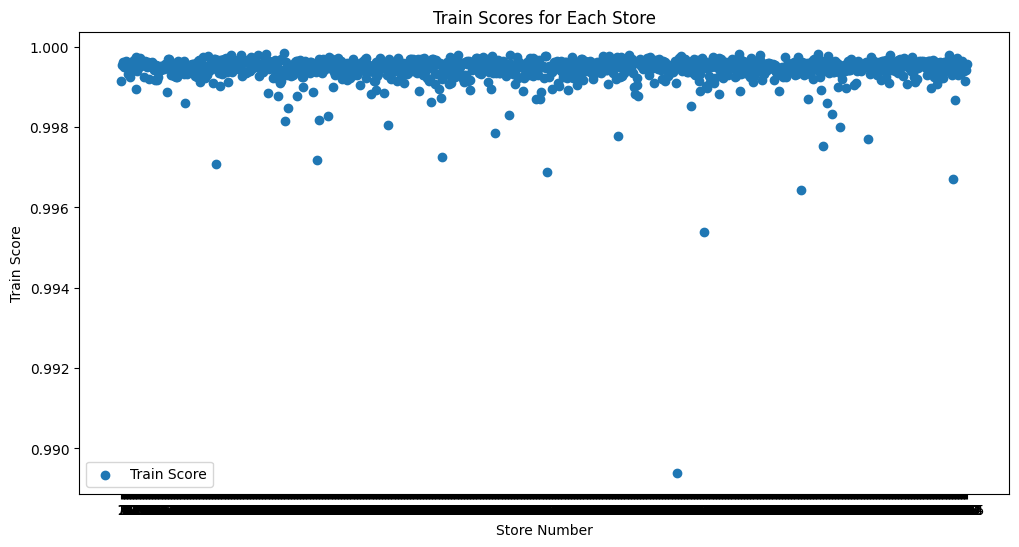

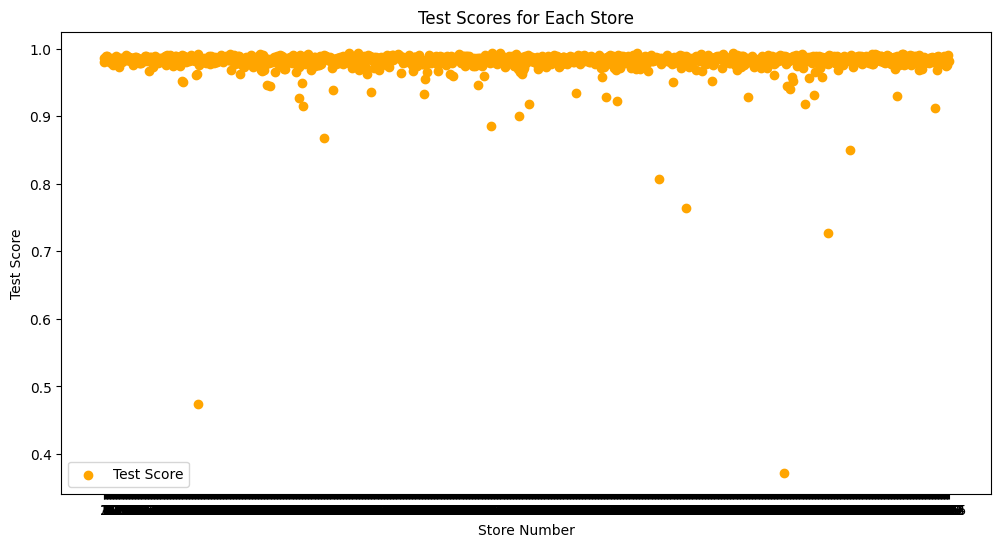

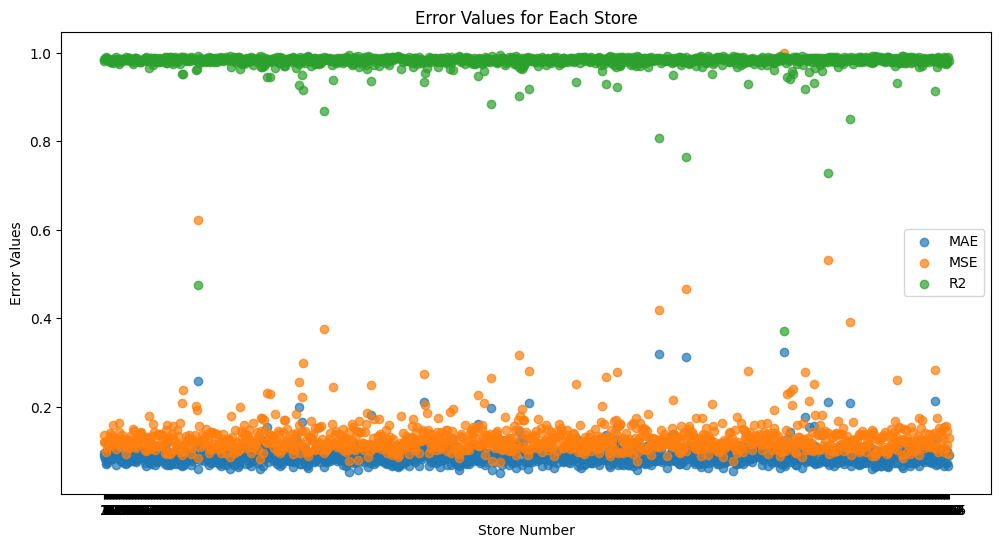

In [136]:
# Plot train scores
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, XGB_train_score_list, label='Train Score')
plt.xlabel('Store Number')
plt.ylabel('Train Score')
plt.title('Train Scores for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

# Plot test scores
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, XGB_test_score_list, label='Test Score', color='orange')
plt.xlabel('Store Number')
plt.ylabel('Test Score')
plt.title('Test Scores for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

# Plot MAE, MSE, RMSE
plt.figure(figsize=(12, 6))
plt.scatter(store_numbers, XGB_mae_list, label='MAE', alpha=0.7)
plt.scatter(store_numbers, XGB_mse_list, label='MSE', alpha=0.7)
plt.scatter(store_numbers, XGB_r2_list, label='R2', alpha=0.7)
plt.xlabel('Store Number')
plt.ylabel('Error Values')
plt.title('Error Values for Each Store')
plt.xticks(store_numbers)
plt.legend()
plt.show()

In [137]:
#Hyperparamter tuning
from sklearn.model_selection import RandomizedSearchCV,KFold
params={'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.5, 1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
folds = 3
param_comb = 10
kf = KFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=kf.split(X_train_full,y_train_full), verbose=3, random_state=1001 )
random_search.fit(X_train_full, y_train_full)
best_model=random_search.best_estimator_
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:46:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



 All results:
{'mean_fit_time': array([10.115731  , 32.81280406,  8.29343883, 32.64866726, 20.64680759,
        9.94479354, 13.70799343, 18.96032143, 15.80192995,  7.55543176]), 'std_fit_time': array([0.1772367 , 0.9182751 , 0.17764292, 0.14885716, 0.29350004,
       1.0108051 , 0.37997277, 0.48197679, 2.13957908, 1.81551376]), 'mean_score_time': array([0.01691985, 0.01076412, 0.01046872, 0.01059731, 0.00809916,
       0.01142057, 0.01044035, 0.01127752, 0.00825787, 0.00602762]), 'std_score_time': array([0.00364071, 0.00390165, 0.00545653, 0.00285403, 0.00571588,
       0.00360361, 0.00662649, 0.00197631, 0.00322806, 0.00361102]), 'param_subsample': masked_array(data=[0.8, 0.8, 1.0, 0.8, 0.8, 0.6, 0.6, 0.6, 1.0, 0.6],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[50, 200, 50, 200, 200, 50, 100, 100, 200, 50],
             mask=[False

In [140]:
#Using best parameters

xgb_reg_hp=xgb.XGBRegressor(learning_rate=0.01,subsample=0.8,min_child_weight=5,max_depth=4,gamma=2,colsample_bytree=0.8,objective='reg:linear',seed='123')
xgb_reg_hp.fit(X_train_full,y_train_full)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:49:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [141]:
y_pred_xgb_hp=xgb_reg_hp.predict(X_test_full)
xgb_hp=metrics(y_test_full,y_pred_xgb_hp)
print(xgb_hp)
print(xgb_reg_hp.score(X_train_full,y_train_full))
print(xgb_reg_hp.score(X_test_full,y_test_full))

MAE:0.39232775317309837
MSE:0.5238893595192259
R_squared:0.7231174113284788
[0.39232775317309837, 0.5238893595192259, 0.7231174113284788]
0.721421871541654
0.7231174113284788


In [ ]:
y_target.shape

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca_reg=PCA(n_components=2)
principal=pca_reg.fit_transform(train_data_upd)
principal_df=pd.DataFrame(principal,columns=['PC1','PC2'])
prin_df_scaled = StdScaling(principal_df)
y_target_scaled = StdScaling(y_target)
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(prin_df_scaled,y_target_scaled,test_size=0.2,random_state=30)



In [ ]:
pca_reg.components_

In [ ]:
pca_reg.explained_variance_ratio_

In [ ]:
lin_reg_pca= LinearRegression()
lin_reg_pca.fit(X_train_pca,y_train_pca)
y_pred_pca=lin_reg_pca.predict(X_test_pca)
metrics(y_pred_pca,y_test_pca)
print(lin_reg_pca.score(X_train_pca,y_train_pca))
print(lin_reg_pca.score(X_test_pca,y_test_pca))